<a href="https://colab.research.google.com/github/TanayKashyap/Credit-Card-Fraud-EDA/blob/main/CreditCardEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
# Filtering Warnings
import warnings
warnings.filterwarnings('ignore')

In [155]:
# Other Startup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.set_option('display.max_columns',300) # Setting column display list
plt.style.use('ggplot') # applying style to graphs

In [156]:
# Read in first dataframe
application_data = pd.read_csv('application_data.csv')
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [157]:
# Data Inspection
application_data.shape

(307511, 122)

In [158]:
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [159]:
application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [160]:
# Checking for NUll Values
# Sorting Percentage of Null Values in each column by descending order
(application_data.isnull().sum()/len(application_data)*100).sort_values(ascending=False).head(50)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [161]:
# Let's look more into huge amount of null values
null_col = application_data.isnull().sum().sort_values(ascending=False)
null_col = null_col[null_col.values >(0.35*len(application_data))]

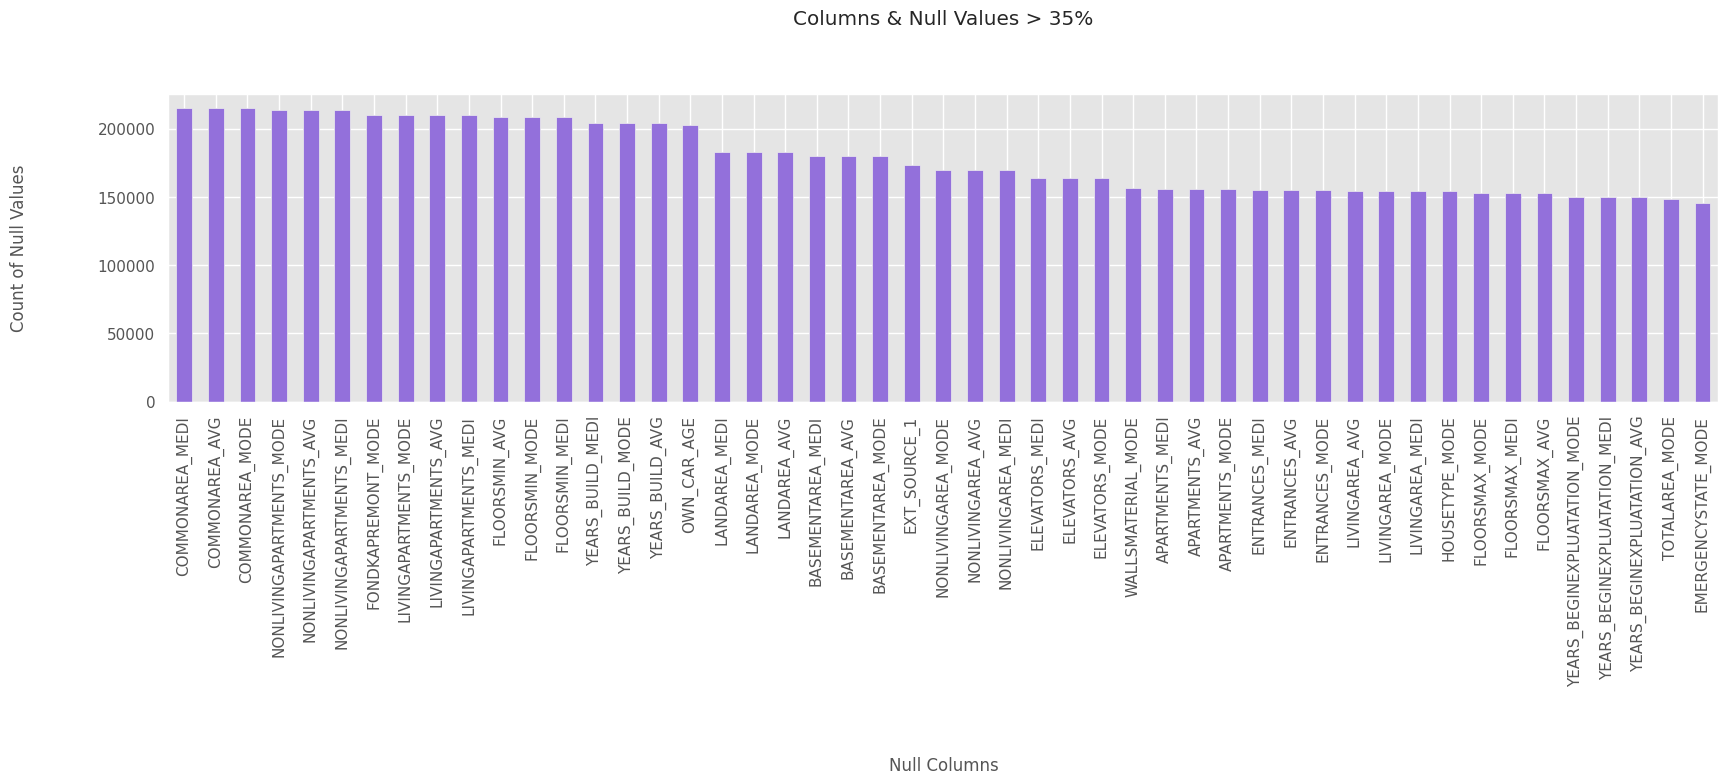

In [162]:
# Plotting bar graph for null values > 35%
plt.figure(figsize=(20,4))
null_col.plot(kind='bar',color='mediumpurple')
plt.title("Columns & Null Values > 35%")
plt.xlabel("Null Columns",fontdict={"fontsize":12,"fontweight":5})
plt.ylabel("Count of Null Values",fontdict={"fontsize":12,"fontweight":5})
plt.show()

In [163]:
# We will remove columns where > 35% of column is null
len(null_col)
label=list(null_col.index.values) # list of column names to drop
application_data.drop(labels=label,axis=1,inplace=True)

In [164]:
# Checking how it looks now
application_data.shape

(307511, 73)

As you can see we have dropped from 122 to 73 columns

In [165]:
# Checking % of null vaues in each column
# Sorting Percentage of Null Values in each column by descending order
(application_data.isnull().sum()/len(application_data)*100).sort_values(ascending=False).head(50)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


In [166]:
application_data.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(application_data.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_YEAR

application_data.AMT_REQ_CREDIT_BUREAU_MON.fillna(application_data.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_MON

application_data.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(application_data.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_WEEK

application_data.AMT_REQ_CREDIT_BUREAU_DAY.fillna(application_data.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_DAY

application_data.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(application_data.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_HOUR

application_data.AMT_REQ_CREDIT_BUREAU_QRT.fillna(application_data.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_QRT

application_data.NAME_TYPE_SUITE.fillna(application_data.NAME_TYPE_SUITE.mode()[0],inplace = True) #NAME_TYPE_SUITE

application_data.OBS_30_CNT_SOCIAL_CIRCLE.fillna( application_data.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_30_CNT_SOCIAL_CIRCLE

application_data.DEF_30_CNT_SOCIAL_CIRCLE.fillna( application_data.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_30_CNT_SOCIAL_CIRCLE

application_data.OBS_60_CNT_SOCIAL_CIRCLE.fillna( application_data.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_60_CNT_SOCIAL_CIRCLE

application_data.DEF_60_CNT_SOCIAL_CIRCLE.fillna( application_data.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_60_CNT_SOCIAL_CIRCLE

application_data.CNT_FAM_MEMBERS.fillna(application_data.CNT_FAM_MEMBERS.mode() , inplace = True) #CNT_FAM_MEMBERS

application_data.DAYS_LAST_PHONE_CHANGE.fillna(application_data.DAYS_LAST_PHONE_CHANGE.mode()[0],inplace = True) #DAYS_LAST_PHONE_CHANGE

application_data.EXT_SOURCE_2.fillna(application_data.EXT_SOURCE_2.median() , inplace = True) #EXT_SOURCE_2

application_data.EXT_SOURCE_3.fillna(application_data.EXT_SOURCE_3.median() , inplace = True) #EXT_SOURCE_3

In [167]:
(application_data.isnull().sum()/len(application_data)*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
FLAG_DOCUMENT_3                 0.000000
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
AMT_REQ_CREDIT_BUREAU_YEAR      0.000000
Length: 73, dtype: float64

We won't touch occupation_type as it has useful info so inputting it with mean or median wouldn't make any sense

In [168]:
application_data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

Let us observe the columns as they contain some errors

In [169]:
application_data[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]
application_data.drop(index=application_data.index[-1],axis=0,inplace=True)

As we can see, we have negative values? that obviously doesn't make sense

In [170]:
days_cols = [i for i in application_data if i.startswith("DAYS")]
days_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [171]:
application_data[days_cols] = abs(application_data[days_cols])

In [172]:
application_data[days_cols]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0             9461            637             3648.0             2120   
1            16765           1188             1186.0              291   
2            19046            225             4260.0             2531   
3            19005           3039             9833.0             2437   
4            19932           3038             4311.0             3458   
...            ...            ...                ...              ...   
307505       24384         365243             7369.0             2357   
307506        9327            236             8456.0             1982   
307507       20775         365243             4388.0             4090   
307508       14966           7921             6737.0             5150   
307509       11961           4786             2562.0              931   

        DAYS_LAST_PHONE_CHANGE  
0                       1134.0  
1                        828.0  
2                        815.0  
3                        617.0  
4                       1106.0  
...                        ...  
307505                     0.0  
307506                   273.0  
307507                     0.0  
307508                  1909.0  
307509                   322.0  

[307510 rows x 5 columns]

Some columns contain Y/N type of values

In [173]:
application_data['FLAG_OWN_CAR'] = np.where(application_data['FLAG_OWN_CAR']=='Y',1,0)
application_data['FLAG_OWN_REALTY'] = np.where(application_data['FLAG_OWN_REALTY']=='Y',1,0)

In [174]:
application_data[['FLAG_OWN_CAR','FLAG_OWN_REALTY']]

FLAG_OWN_CAR  FLAG_OWN_REALTY
0                  0                1
1                  0                0
2                  1                1
3                  0                1
4                  0                1
...              ...              ...
307505             0                1
307506             0                0
307507             0                1
307508             0                1
307509             0                1

[307510 rows x 2 columns]

Some of the columns with categorical values have 'XNA' values which are just null

In [175]:
application_data.CODE_GENDER.value_counts()

F      202447
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

We can impute the value 'XNA' to "F" in the column `CODE_GENDER` as the most frequent value is "F"

In [176]:
application_data.loc[application_data.CODE_GENDER=="XNA",'CODE_GENDER'] = 'F'
application_data.CODE_GENDER.value_counts()

F    202451
M    105059
Name: CODE_GENDER, dtype: int64

In [177]:
application_data['CODE_GENDER']

0         M
1         F
2         M
3         F
4         M
         ..
307505    F
307506    M
307507    F
307508    F
307509    F
Name: CODE_GENDER, Length: 307510, dtype: object

We will do similar for `ORGANIZATION_TYPE`

In [178]:
application_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67991
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

Let's first see if these values are missing at random or if there is a pattern

In [179]:
application_data[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']].head(50)

ORGANIZATION_TYPE      NAME_INCOME_TYPE
0   Business Entity Type 3               Working
1                   School         State servant
2               Government               Working
3   Business Entity Type 3               Working
4                 Religion               Working
5                    Other         State servant
6   Business Entity Type 3  Commercial associate
7                    Other         State servant
8                      XNA             Pensioner
9              Electricity               Working
10                Medicine               Working
11                     XNA             Pensioner
12  Business Entity Type 2               Working
13           Self-employed               Working
14       Transport: type 2               Working
15  Business Entity Type 2               Working
16              Government               Working
17            Construction               Working
18                 Housing               Working
19            Kindergarten         State servant
20           Self-employed               Working
21           Trade: type 7  Commercial associate
22           Self-employed               Working
23                     XNA             Pensioner
24  Business Entity Type 3               Working
25  Business Entity Type 3               Working
26  Business Entity Type 3               Working
27       Industry: type 11               Working
28                Military         State servant
29  Business Entity Type 3               Working
30  Business Entity Type 3  Commercial associate
31                Services               Working
32  Business Entity Type 2               Working
33           Self-employed  Commercial associate
34     Security Ministries         State servant
35           Self-employed               Working
36                   Other  Commercial associate
37       Transport: type 4               Working
38                     XNA             Pensioner
39  Business Entity Type 3               Working
40  Business Entity Type 3  Commercial associate
41        Industry: type 1               Working
42           Self-employed               Working
43                     XNA             Pensioner
44  Business Entity Type 3               Working
45           Self-employed               Working
46                     XNA             Pensioner
47  Business Entity Type 3               Working
48              Government         State servant
49       Transport: type 2               Working

So we can see that **XNA** appears whenever the `NAME_INCOME_TYPE` is **Pensioner**

In [180]:
application_data.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71616
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

So from this data, we can conclude that **Pensioner** value is ~ to the
null values in the `ORGANIZATION_TYPE` column

Similarly imputing null values of `OCCUPATION_TYPE` with **Pensioner** as most of the null values for `OCCUPATION_TYPE` compared to other Income type variable values, we found that **Pensioner** is the most frequent value almost 80% of the null values of `OCCUPATION_TYPE`





In [181]:
application_data['ORGANIZATION_TYPE'] = application_data['ORGANIZATION_TYPE'].replace('XNA','Pensioner')
application_data['OCCUPATION_TYPE'].fillna('Pensioner',inplace=True)

In [182]:
application_data['AMT_INCOME_TYPE'] = pd.qcut(application_data.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
application_data['AMT_INCOME_TYPE'].head(11)

0        MEDIUM
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5      VERY_LOW
6        MEDIUM
7     VERY_HIGH
8           LOW
9           LOW
10          LOW
Name: AMT_INCOME_TYPE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

We have some columns with nominal categorical values

In [183]:
application_data['AMT_CREDIT_TYPE'] = pd.qcut(application_data.AMT_CREDIT,q=[0,0.2,0.5,0.8,0.95,1],labels=['VERY LOW','LOW','MEDIUM','HIGH','VERY_HIGH'])
application_data['AMT_CREDIT_TYPE'].head(10)

0          LOW
1         HIGH
2     VERY LOW
3          LOW
4          LOW
5          LOW
6    VERY_HIGH
7    VERY_HIGH
8         HIGH
9          LOW
Name: AMT_CREDIT_TYPE, dtype: category
Categories (5, object): ['VERY LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [184]:
application_data['DAYS_BIRTH']

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307505    24384
307506     9327
307507    20775
307508    14966
307509    11961
Name: DAYS_BIRTH, Length: 307510, dtype: int64

In [185]:
application_data['DAYS_BIRTH']= (application_data['DAYS_BIRTH']/365).astype(int)    # Converting
application_data['DAYS_BIRTH'].unique()
application_data['AGE_GROUP']=pd.cut(application_data['DAYS_BIRTH'],
                         bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])

In [186]:
application_data[['DAYS_BIRTH','AGE_GROUP']].head(20)

DAYS_BIRTH   AGE_GROUP
0           25  Very_Young
1           45  Middle_Age
2           52  Middle_Age
3           52  Middle_Age
4           54  Middle_Age
5           46  Middle_Age
6           37  Middle_Age
7           51  Middle_Age
8           55  Middle_Age
9           39  Middle_Age
10          27       Young
11          55  Middle_Age
12          36  Middle_Age
13          38  Middle_Age
14          39  Middle_Age
15          23  Very_Young
16          35       Young
17          26       Young
18          48  Middle_Age
19          31       Young

In [187]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307510 entries, 0 to 307509
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307510 non-null  int64   
 1   TARGET                       307510 non-null  int64   
 2   NAME_CONTRACT_TYPE           307510 non-null  object  
 3   CODE_GENDER                  307510 non-null  object  
 4   FLAG_OWN_CAR                 307510 non-null  int64   
 5   FLAG_OWN_REALTY              307510 non-null  int64   
 6   CNT_CHILDREN                 307510 non-null  int64   
 7   AMT_INCOME_TOTAL             307510 non-null  float64 
 8   AMT_CREDIT                   307510 non-null  float64 
 9   AMT_ANNUITY                  307498 non-null  float64 
 10  AMT_GOODS_PRICE              307232 non-null  float64 
 11  NAME_TYPE_SUITE              307510 non-null  object  
 12  NAME_INCOME_TYPE             307510 non-null

In [188]:
application_data['NAME_CONTRACT_TYPE'] = application_data['NAME_CONTRACT_TYPE'].astype('category')
application_data['CODE_GENDER'] = application_data['CODE_GENDER'].astype('category')
application_data['NAME_TYPE_SUITE'] = application_data['NAME_TYPE_SUITE'].astype('category')
application_data['NAME_INCOME_TYPE'] = application_data['NAME_INCOME_TYPE'].astype('category')
application_data['NAME_EDUCATION_TYPE'] = application_data['NAME_EDUCATION_TYPE'].astype('category')
application_data['NAME_FAMILY_STATUS'] = application_data['NAME_FAMILY_STATUS'].astype('category')
application_data['NAME_HOUSING_TYPE'] = application_data['NAME_HOUSING_TYPE'].astype('category')
application_data['OCCUPATION_TYPE'] = application_data['OCCUPATION_TYPE'].astype('category')
application_data['WEEKDAY_APPR_PROCESS_START'] = application_data['WEEKDAY_APPR_PROCESS_START'].astype('category')
application_data['ORGANIZATION_TYPE'] = application_data['ORGANIZATION_TYPE'].astype('category')

We have a lot of unwanted columns that won't help our analysis

In [189]:
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

application_data.drop(labels=unwanted,axis=1,inplace=True)

We will now move onto Outlier Detection
# Outlier Detection

Making a list of numeric columns and boxploting them

In [190]:
numerical_col = application_data.select_dtypes(include='number').columns
len(numerical_col)
numerical_col

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

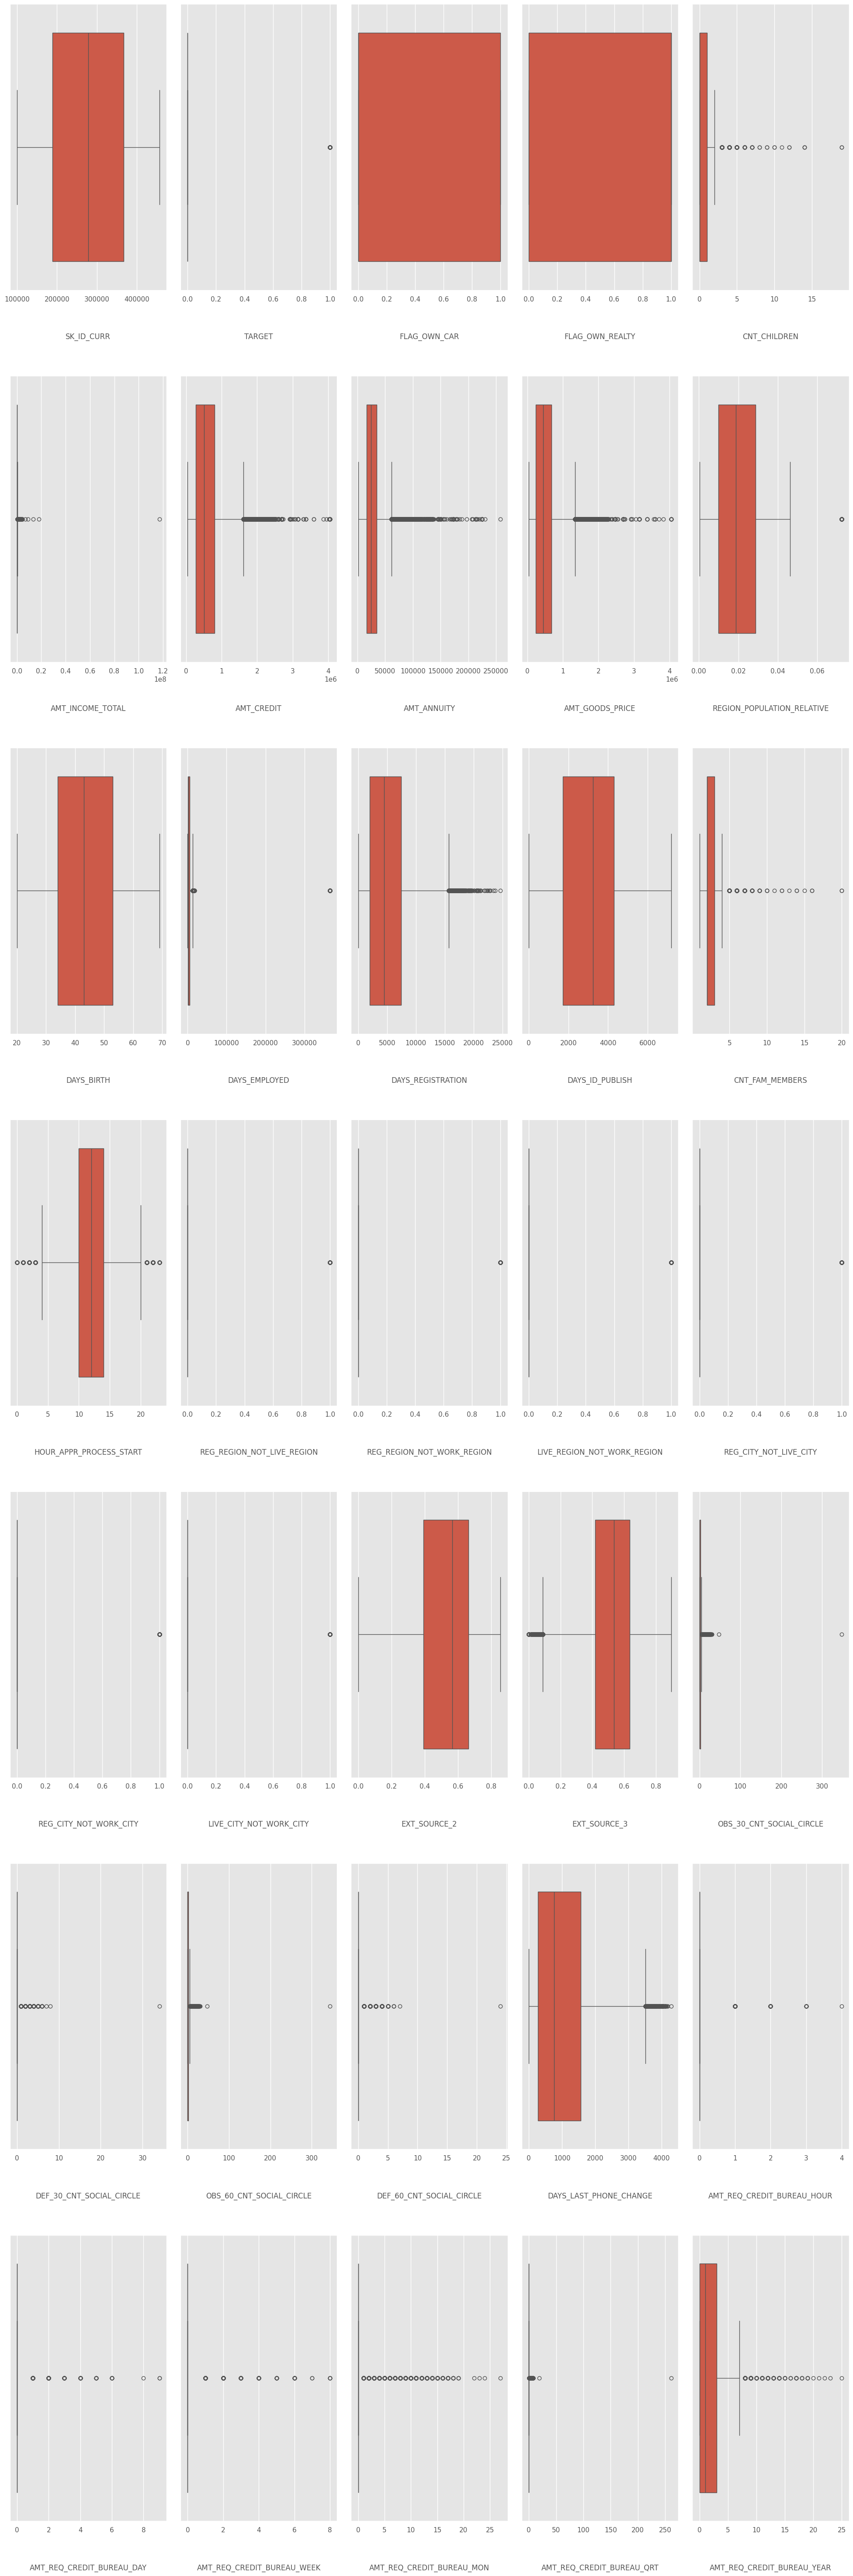

In [191]:
fig,axes = plt.subplots(nrows=7,ncols=5,constrained_layout=False)
fig.subplots_adjust(left=0,bottom=0,right=3,top=12,wspace=0.09,hspace=0.3)
for ax,column in zip(axes.flatten(),numerical_col):
  sns.boxplot(application_data[column],ax=ax,orient="h")

# Observations
`CNT_CHILDREN` have outlier values having children more than 5.

IQR for `AMT_INCOME_TOTAL` is very slim and it has a large number of outliers.

Third quartile of `AMT_CREDIT` is larger as compared to the First quartile which means that most of the Credit amount of the loan of customers are present in the third quartile. And there are a large number of outliers present in `AMT_CREDIT`.

The third quartile `AMT_ANNUITY` is slightly larger than the First quartile and there is a large number of outliers.

Third quartile of `AMT_GOODS_PRICE`,`DAYS_REGISTRATION` AND `DAYS_LAST_PHONE_CHANGE` is larger as compared to the First quartile and all have a large number of outliers.

IQR for `DAYS EMPLOYED` is very slim. Most of the outliers are present below 25000. And an outlier is present 375000.

From boxplot of `CNT_FAM_MEMBERS`, we can say that most of the clients have 4 family members. There are some outliers present.
`DAYS_BIRTH ,DAYS_ID_PUBLISH and EXT_SOURCE_2,EXT_SOURCE_3` don’t have any outliers.

Boxplot for `DAYS_EMPLOYED ,OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT and AMT_REQ_CREDIT_BUREAU_YEAR` are very slim and have a large number of outliers.

`FLAG_OWN_CAR` : It doesn’t have First and Third quantile and values lies within IQR, So we can conclude that most of the clients own a car

`FLAG_OWN_REALTY` : It doesn’t have First and Third quantile and values lies within IQR, So we can conclude that  most of the clients own a House/Flat

Before analyzing the data, we must check for data imbalance

In [192]:
target0 = application_data[application_data["TARGET"]==0]
target1 = application_data[application_data["TARGET"]==1]

In [193]:
# Calculating imbalance percentage
round(len(target0)/len(target1),2)

11.39

In [194]:
# Let's check distribution of the target variable using pie chart
frequence = application_data['TARGET'].value_counts()
count1 = (frequence[1]/len(application_data['TARGET'])) * 100
count0 = (frequence[0]/len(application_data['TARGET'])) * 100

In [195]:
x = ['Defaulted Population(TARGET=1)','Non-Defaulted Population(Target=0)']
y = [count1,count0]
explode = (0.1,0) # only "explode" the 1st slice

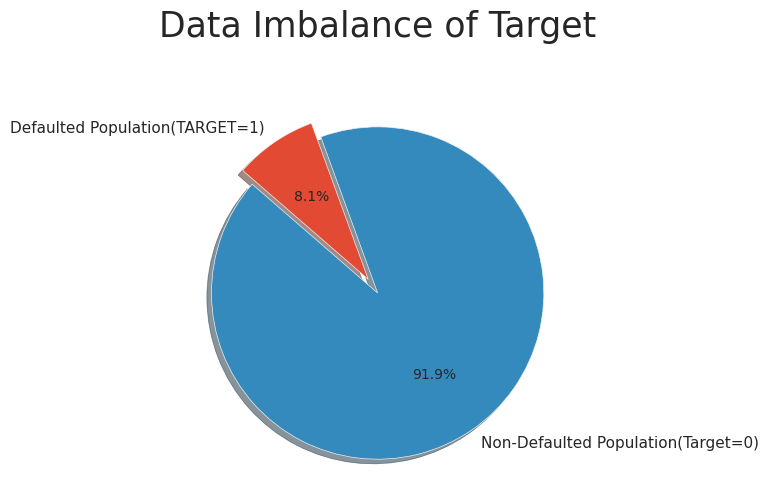

In [196]:
fig1,ax1=plt.subplots()
ax1.pie(y,explode=explode,labels=x,autopct='%1.1f%%',shadow=True,startangle=110)
ax1.axis('equal')
plt.title('Data Imbalance of Target',fontsize=25)
plt.show()

The `application_data` df is highly imbalanced
We will separately analyze the data based on the target variable for a better understanding

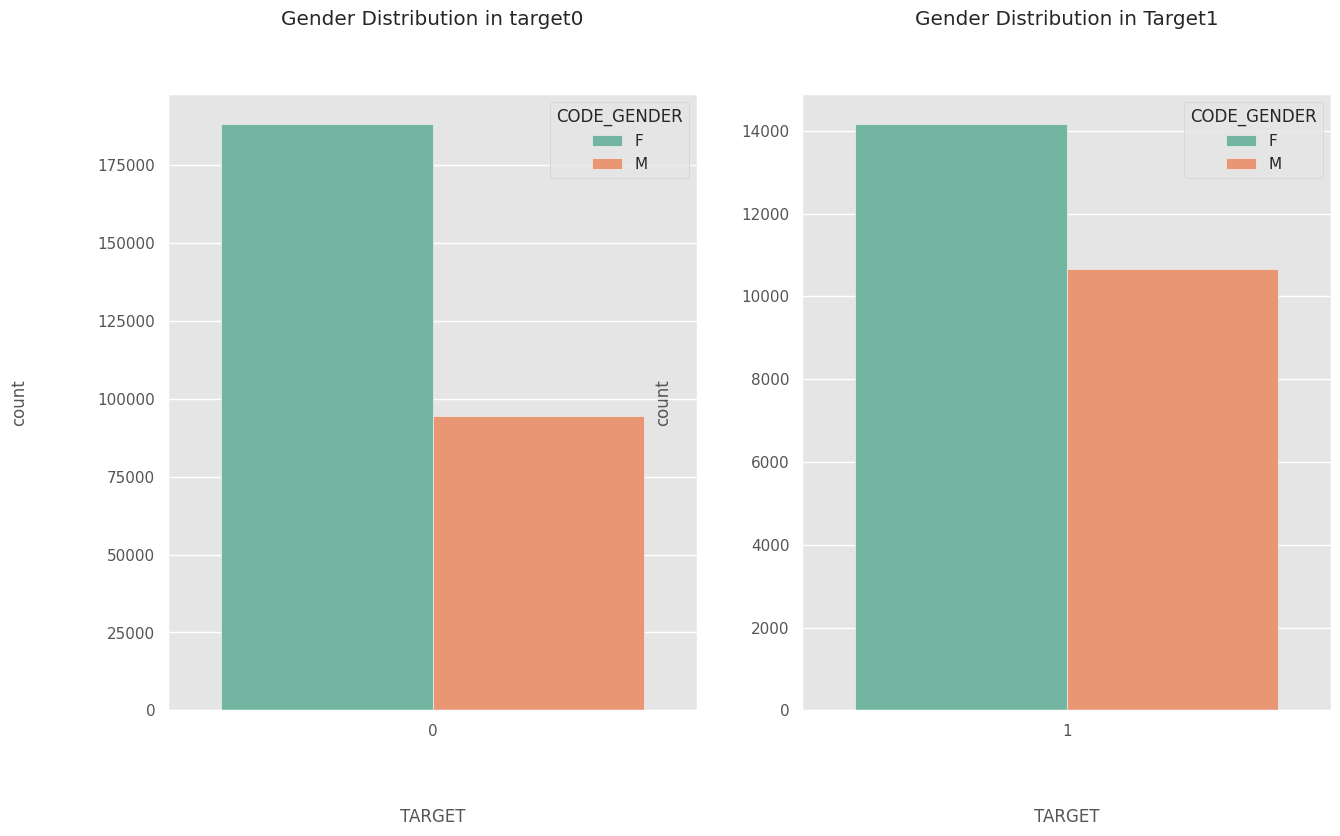

In [197]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=target0,palette='Set2')
plt.title('Gender Distribution in target0')
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=target1,palette='Set2')
plt.title('Gender Distribution in Target1')
plt.show()

In [198]:
defaulted_females = target1['CODE_GENDER'].value_counts()['F']
non_defaulted_females = target0['CODE_GENDER'].value_counts()['F']
females = defaulted_females + non_defaulted_females
defaultfemale_pct = (defaulted_females/females) * 100
non_default_female_pct = (non_defaulted_females/females) * 100

In [199]:
defaulted_males = target1['CODE_GENDER'].value_counts()['M']
non_defaulted_males = target0['CODE_GENDER'].value_counts()['M']
males = defaulted_males + non_defaulted_males
defaultmale_pct = (defaulted_males/males) * 100
non_default_male_pct = (non_defaulted_males/males) * 100

In [200]:
overall_default = ((defaulted_males)/(females+males)) * 100
overall_default

3.4649279698221194



*   Overall, females have applied for more loans then males
*   Respectively, less woman **(6.93%)** have defaulted than their male **(10.14%)** counterpart


*   Overall, **8.03%** of both Male & Female population default on loans
*   Respectively, defaulted females make up **4.55%** of all defaulters while males make up **3.48%** of all defaulters





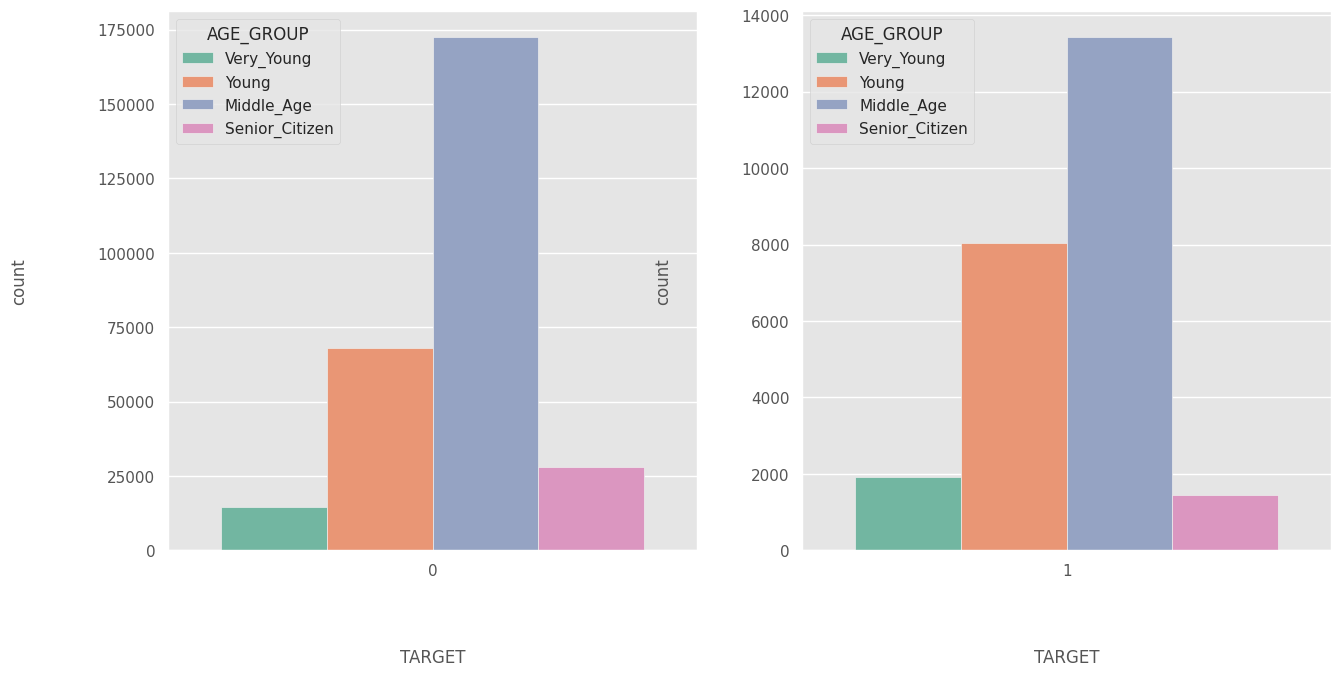

In [201]:
# Age distribution based on Target 0 and Target 1
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=target0,palette='Set2')
plt.subplot(122)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=target1,palette='Set2')
plt.show()

### Insights

*   Middle Age(35-60) the group seems to applied higher than any other age group for loans in the case of Defaulters as well as Non-defaulters.
*   Also, Middle Age group facing paying difficulties the most.


*   While Senior Citizens(60-100) and Very young(19-25) age group facing paying difficulties less as compared to other age groups.






<Figure size 4000x500 with 0 Axes>

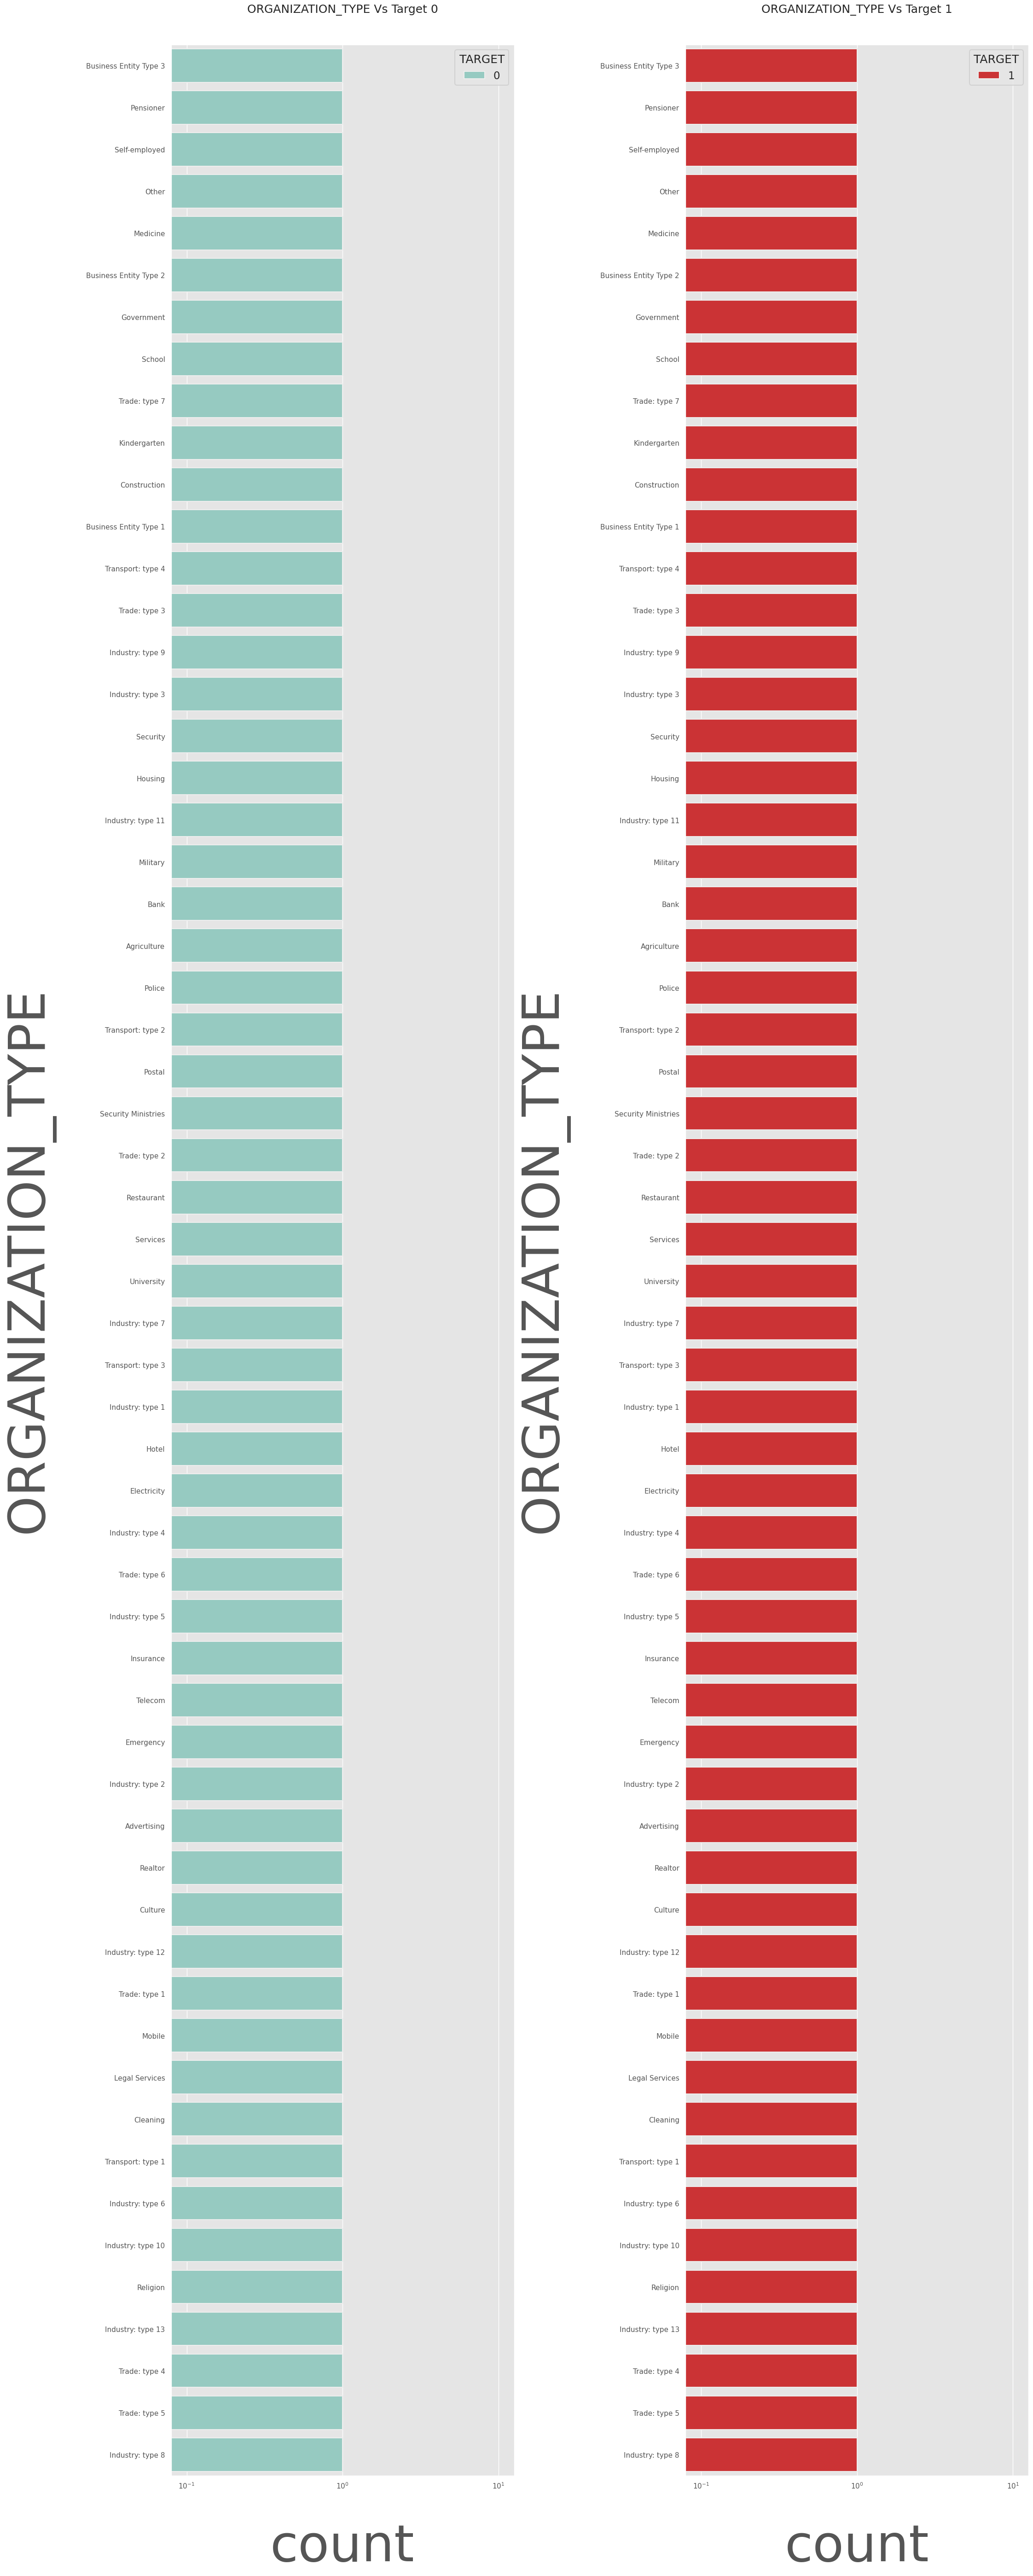

In [202]:
# Org Distribution for Target 0 (non-default) and Target 1 (default)
plt.figure(figsize=(40,5))
plt.rcParams["axes.labelsize"] = 80
plt.rcParams['axes.titlesize'] = 80                                                           # Plot Configuration
plt.rcParams['axes.titlepad'] = 50
fig, axes = plt.subplots(nrows=1,ncols=2)
sns.set_context('talk')
fig.subplots_adjust(left= 0.09,bottom=1,right=3,top= 12,wspace=0.5,hspace=0.3)


plt.subplot(121)
plt.xscale('log')                                                                             # For Target0
sns.countplot(data=target0,y='ORGANIZATION_TYPE',
              order=application_data['ORGANIZATION_TYPE'].value_counts().index,palette='Set3',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 0")



plt.subplot(122)
plt.xscale('log')                                                                              # For Target1
sns.countplot(data=target1,y='ORGANIZATION_TYPE',
              order=application_data['ORGANIZATION_TYPE'].value_counts().index,palette='Set1',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 1")
plt.show()

#### Insights


*   (Defaulters as well as Non-defaulters) Clients with ORGANIZATION_TYPE Business Entity Type 3, Self-employed, Other ,Medicine, Government,Business Entity Type 2 applied the most for the loan as compared to others
*   (Defaulters as well as Non-defaulters) Clients having ORGANIZATION_TYPE Industry: type 13, Trade: type 4, Trade: type 5, Industry: type 8 applied lower for the loan as compared to others.



In [203]:
# Creating a function to plot graphs for all the categorical columns with respect to Target 0 and Target 1
def categorical_plot(var):
    plt.figure(figsize=(40,20))

    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(121)
    sns.countplot(x=var,data=target0, palette = 'Set3', hue='TARGET')
    plt.xlabel(var, fontsize= 30, fontweight="bold")                                                         #Target 0
    plt.ylabel('Non Payment Difficulties', fontsize= 30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)


    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(122)
    sns.countplot(x=var,data=target1, palette = 'Set1', hue='TARGET')                                           # Target 1
    plt.xlabel(var, fontsize= 30, fontweight="bold")
    plt.ylabel('Payments Difficulties', fontsize= 30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    plt.show()

In [204]:
# A list of all the categorical columns
categorical_col = list(application_data.select_dtypes(include='category').columns)

In [205]:
# Remove org_type,code_gender,age_group since we already visualzied them
categorical_col.remove('ORGANIZATION_TYPE')
categorical_col.remove('CODE_GENDER')
categorical_col.remove('AGE_GROUP')

In [206]:
categorical_col

['NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'AMT_INCOME_TYPE',
 'AMT_CREDIT_TYPE']

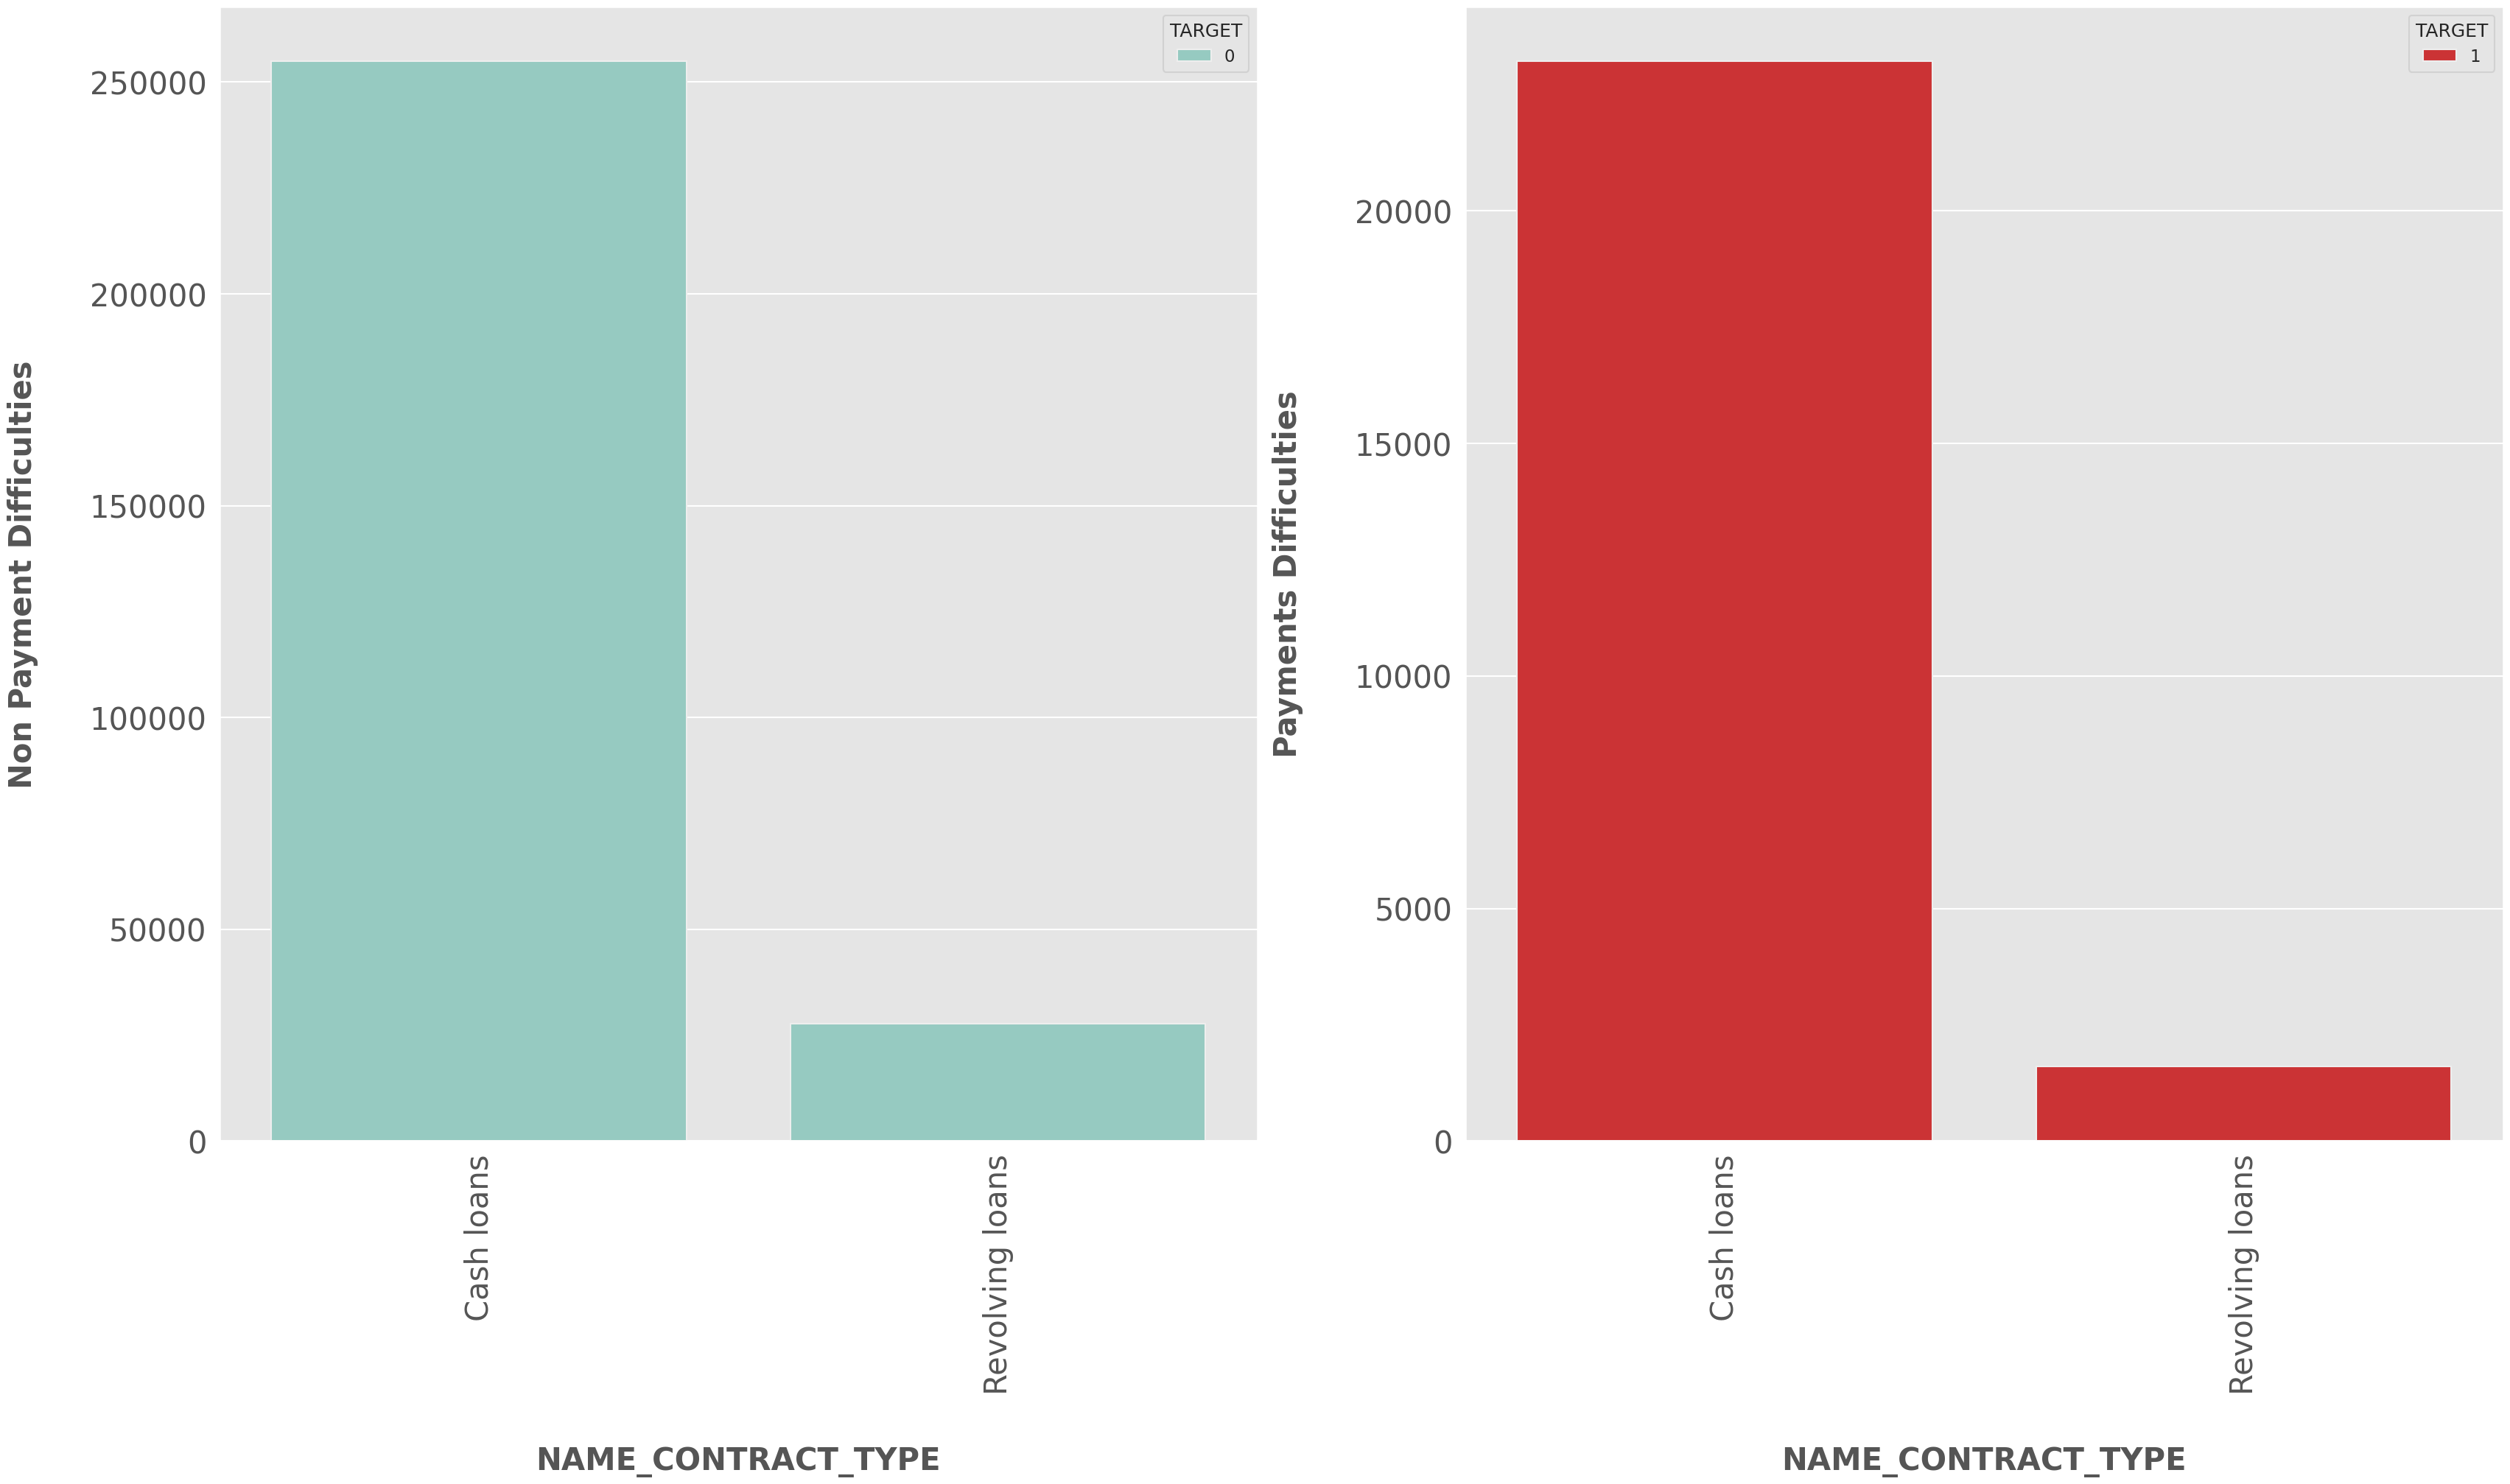

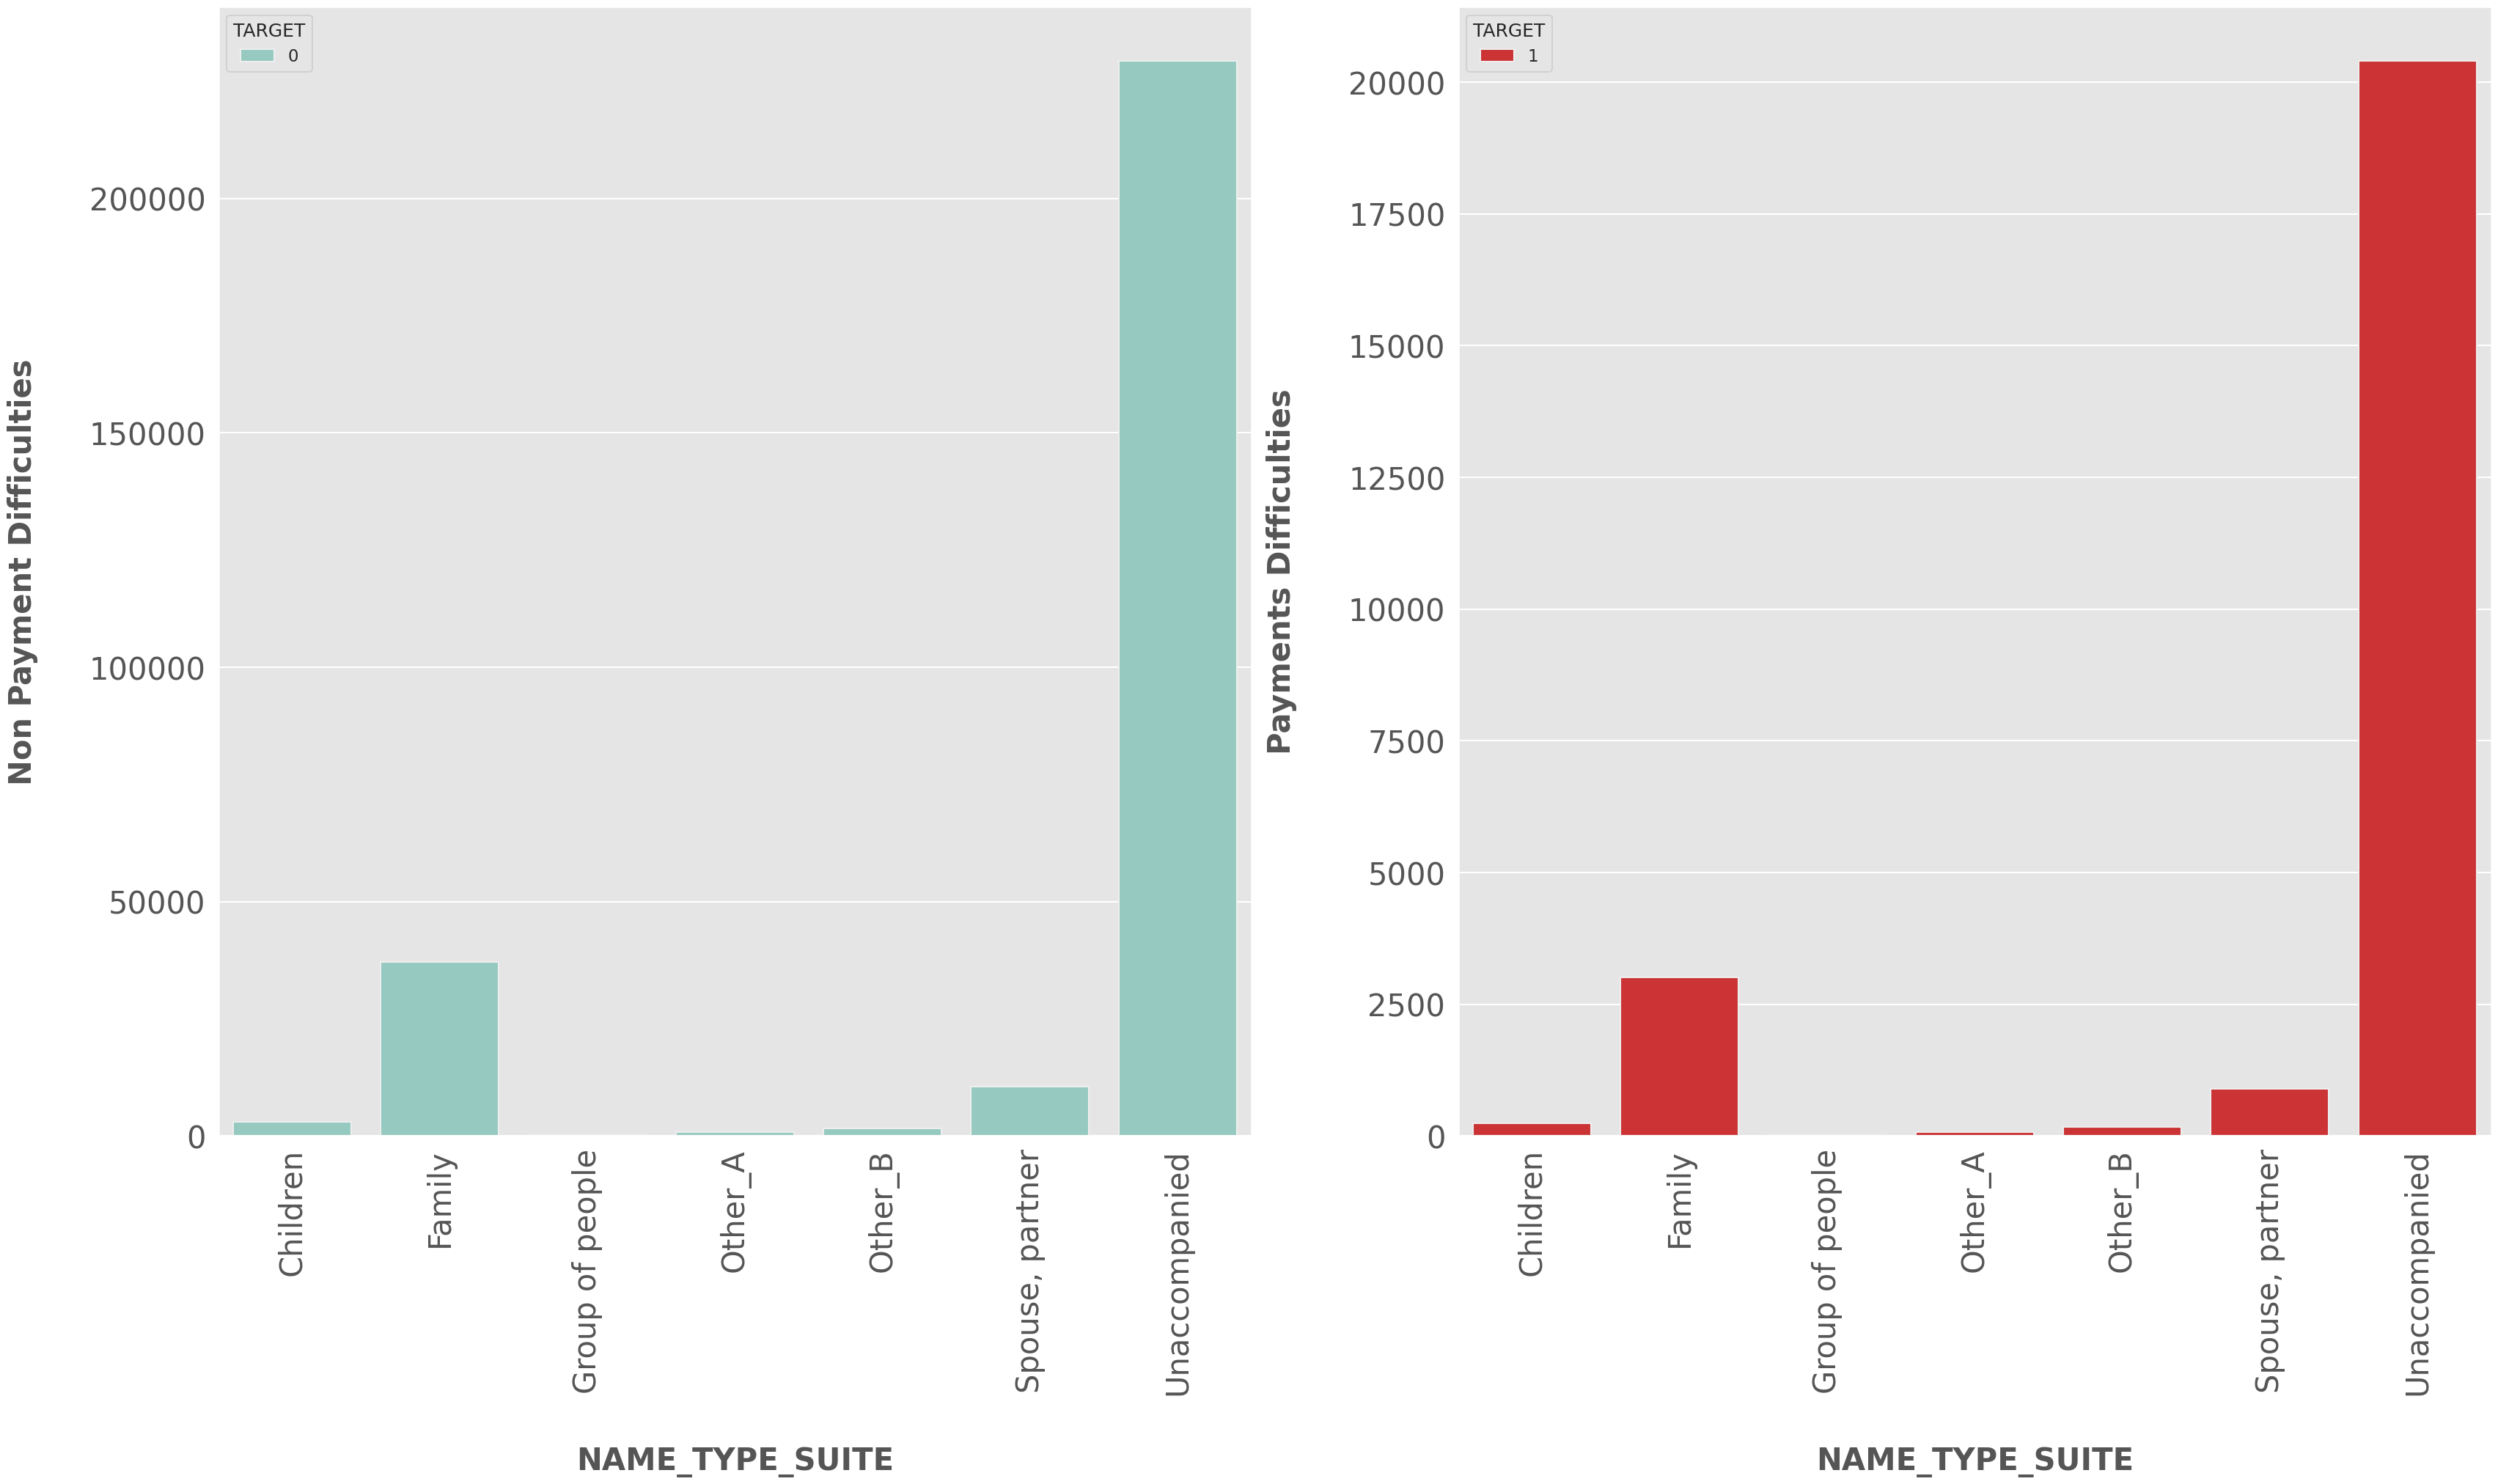

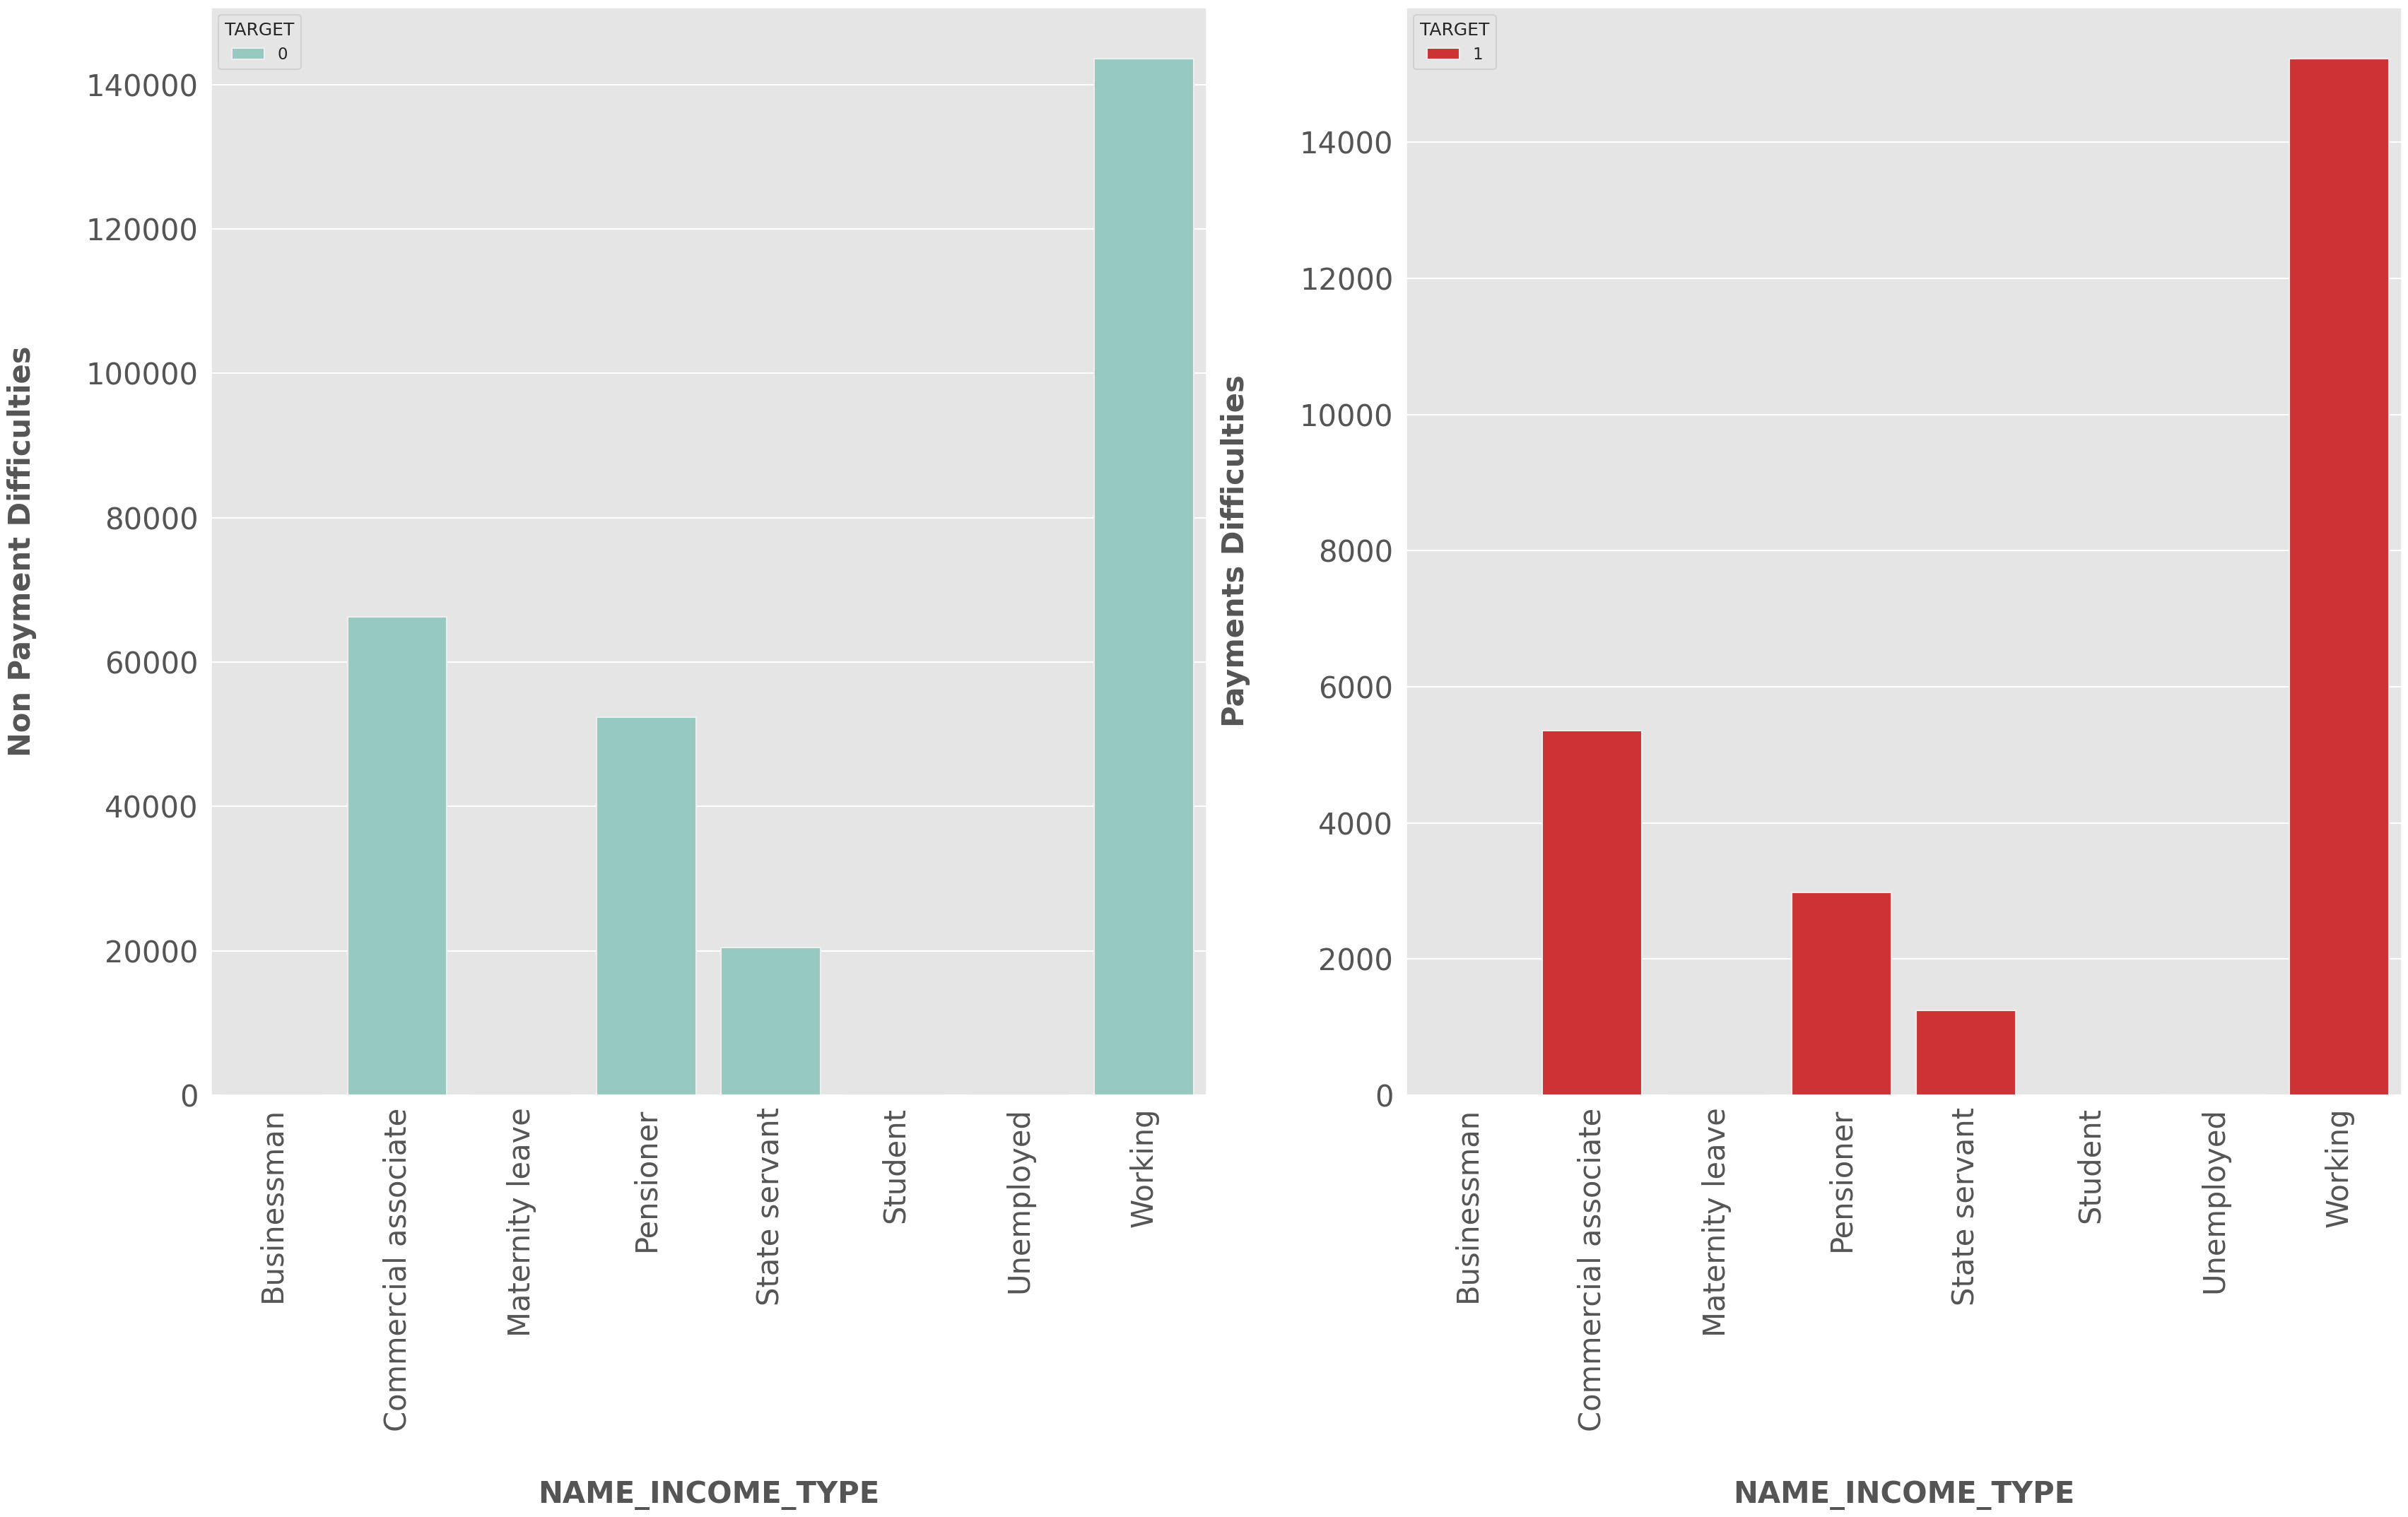

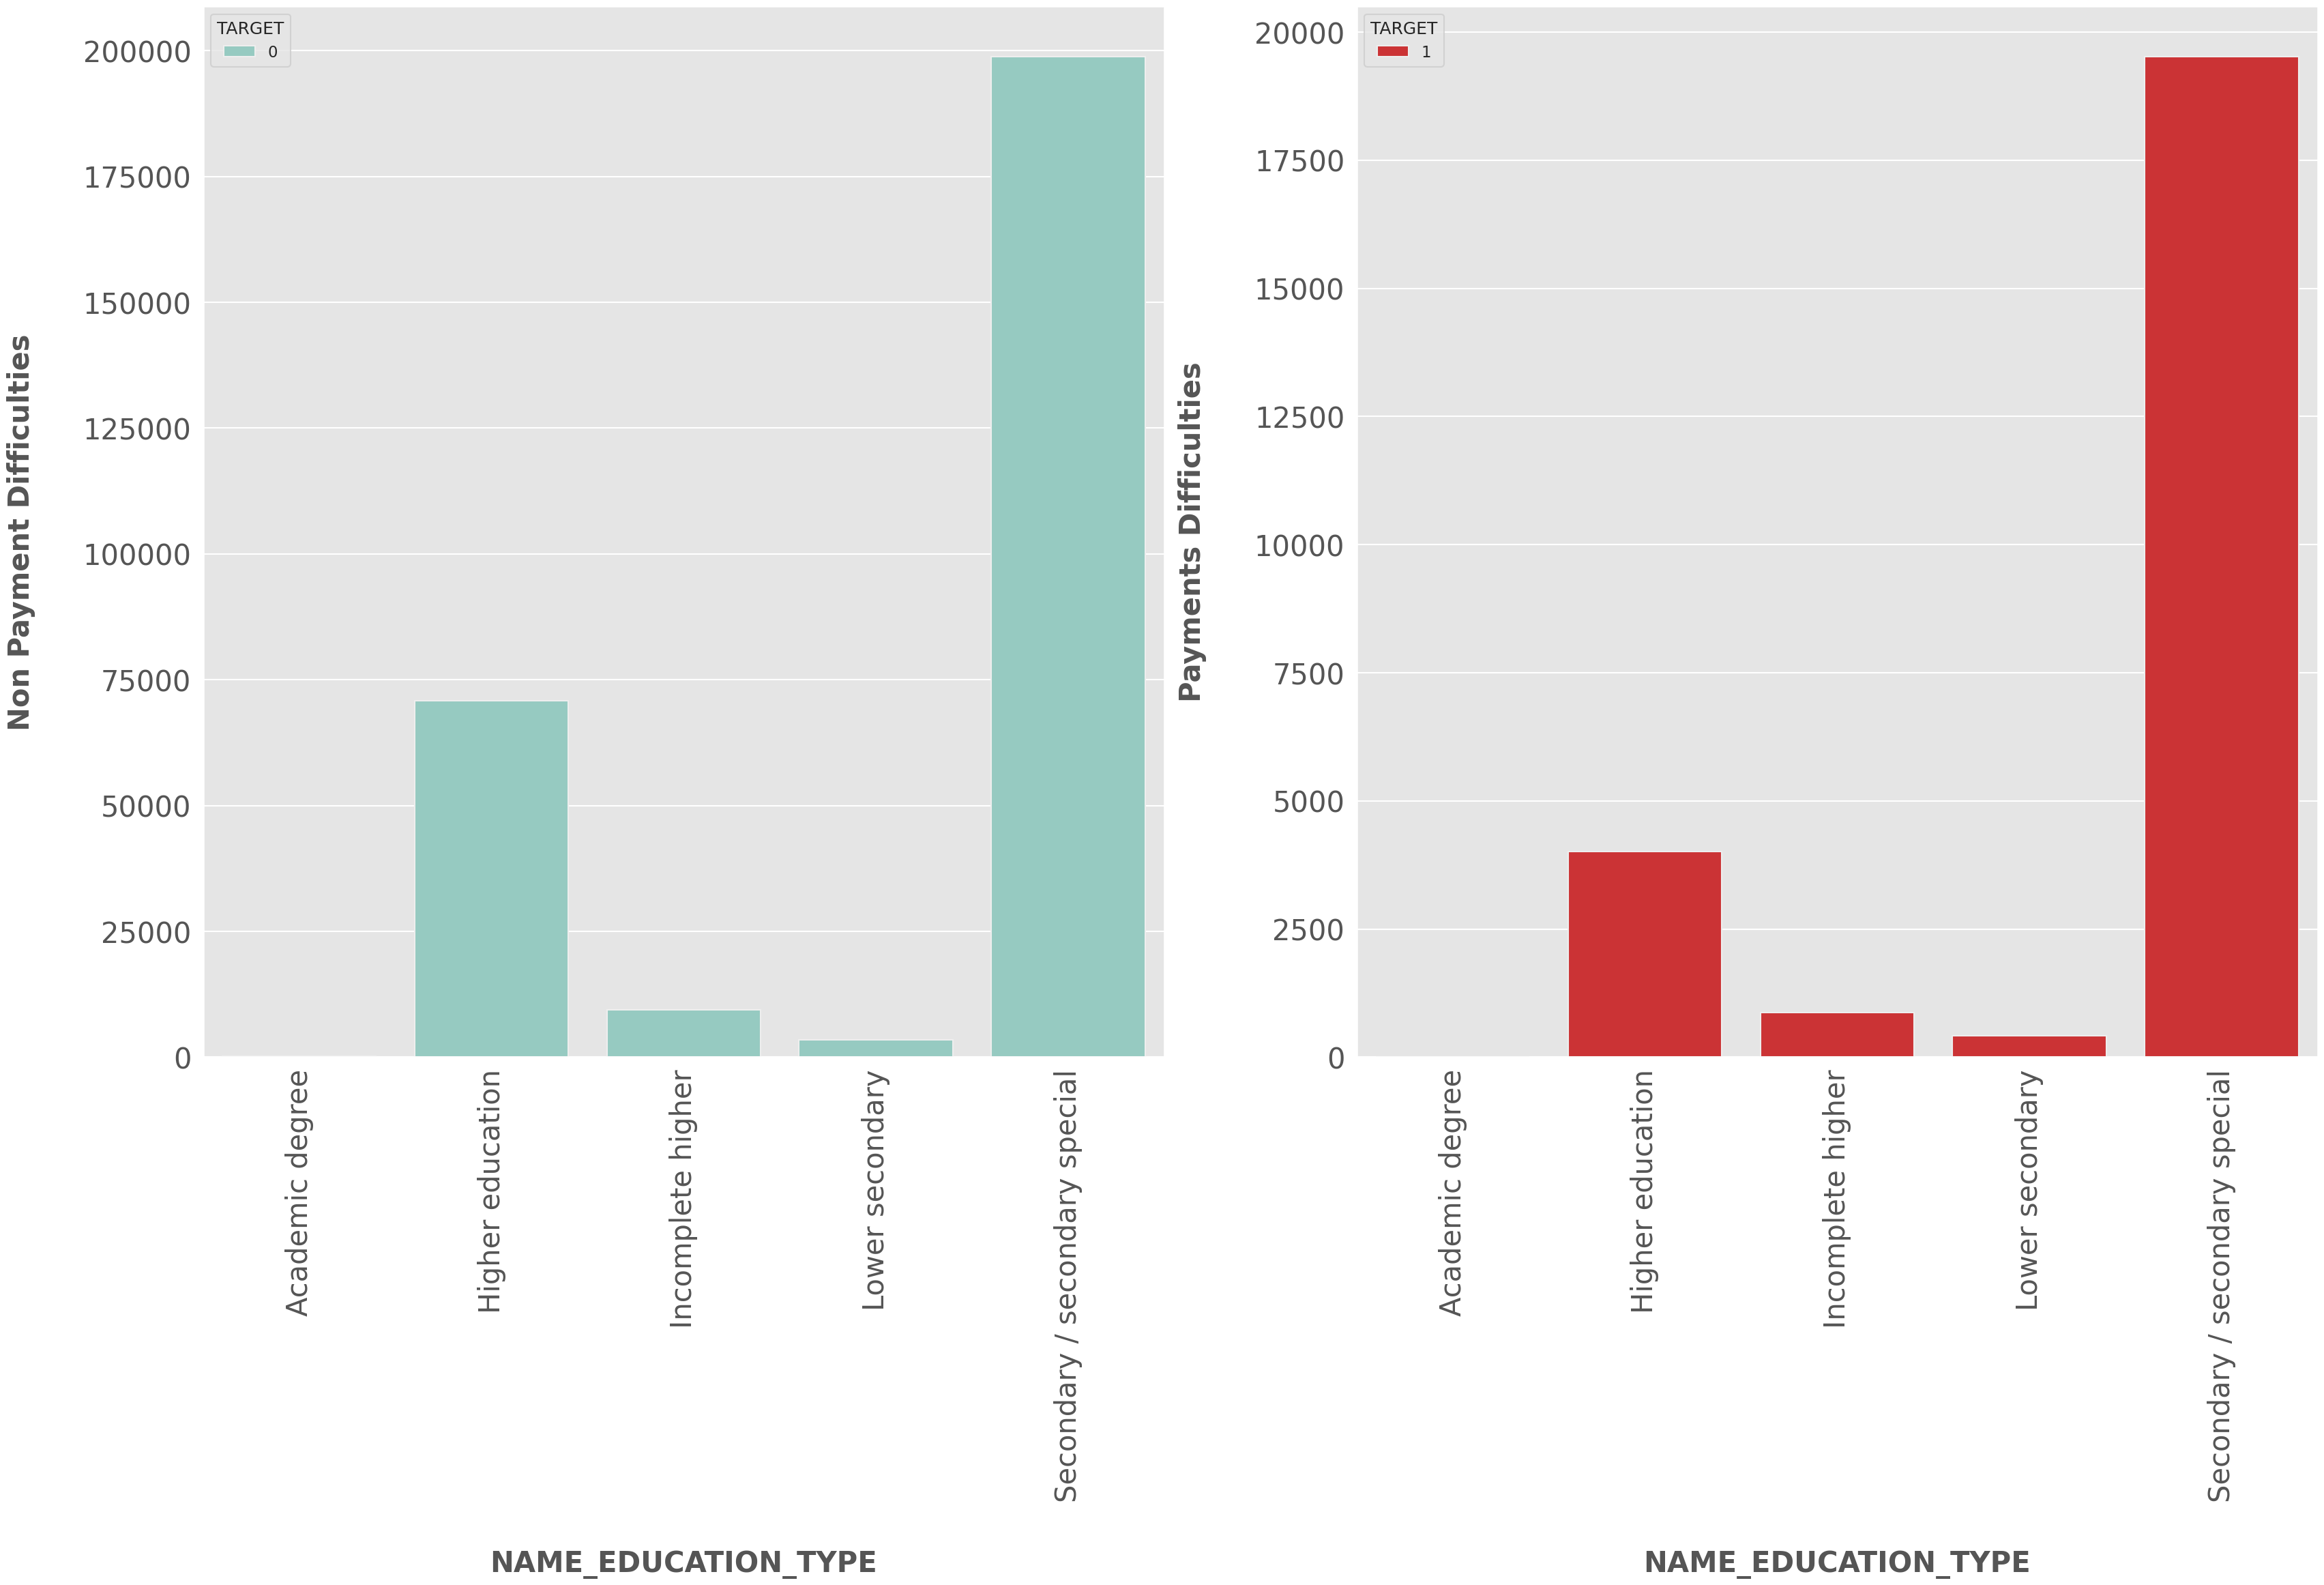

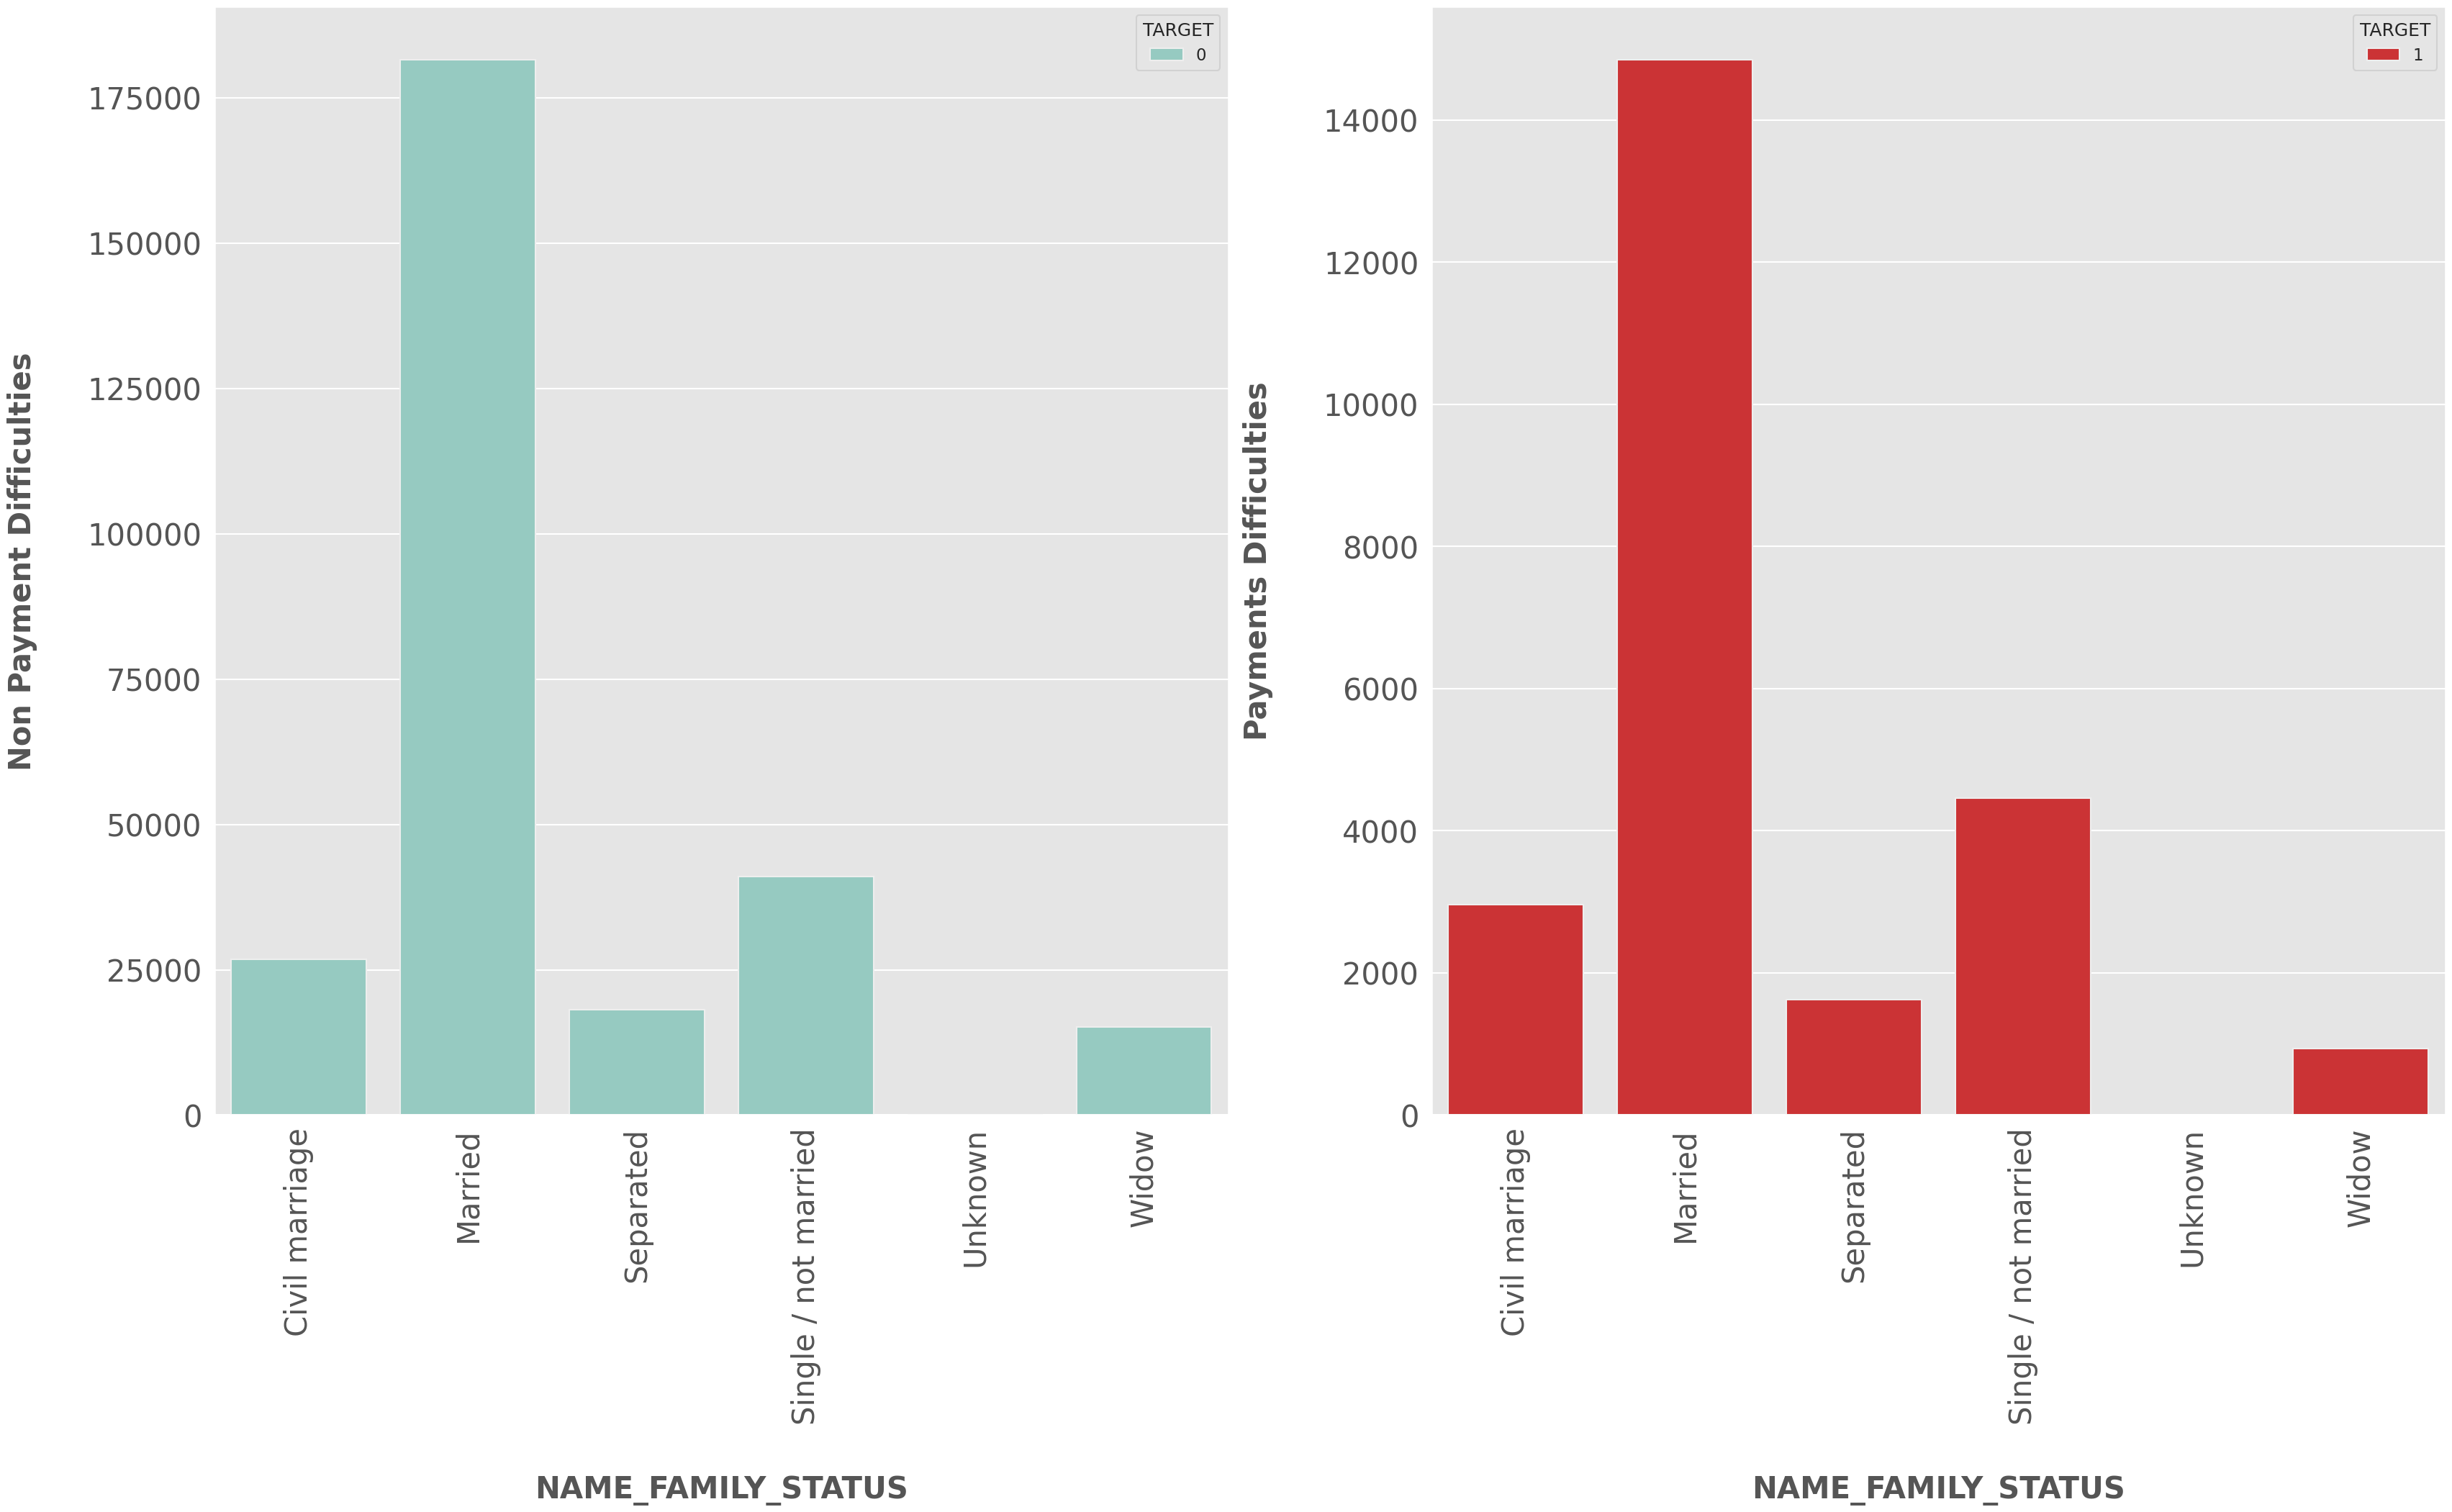

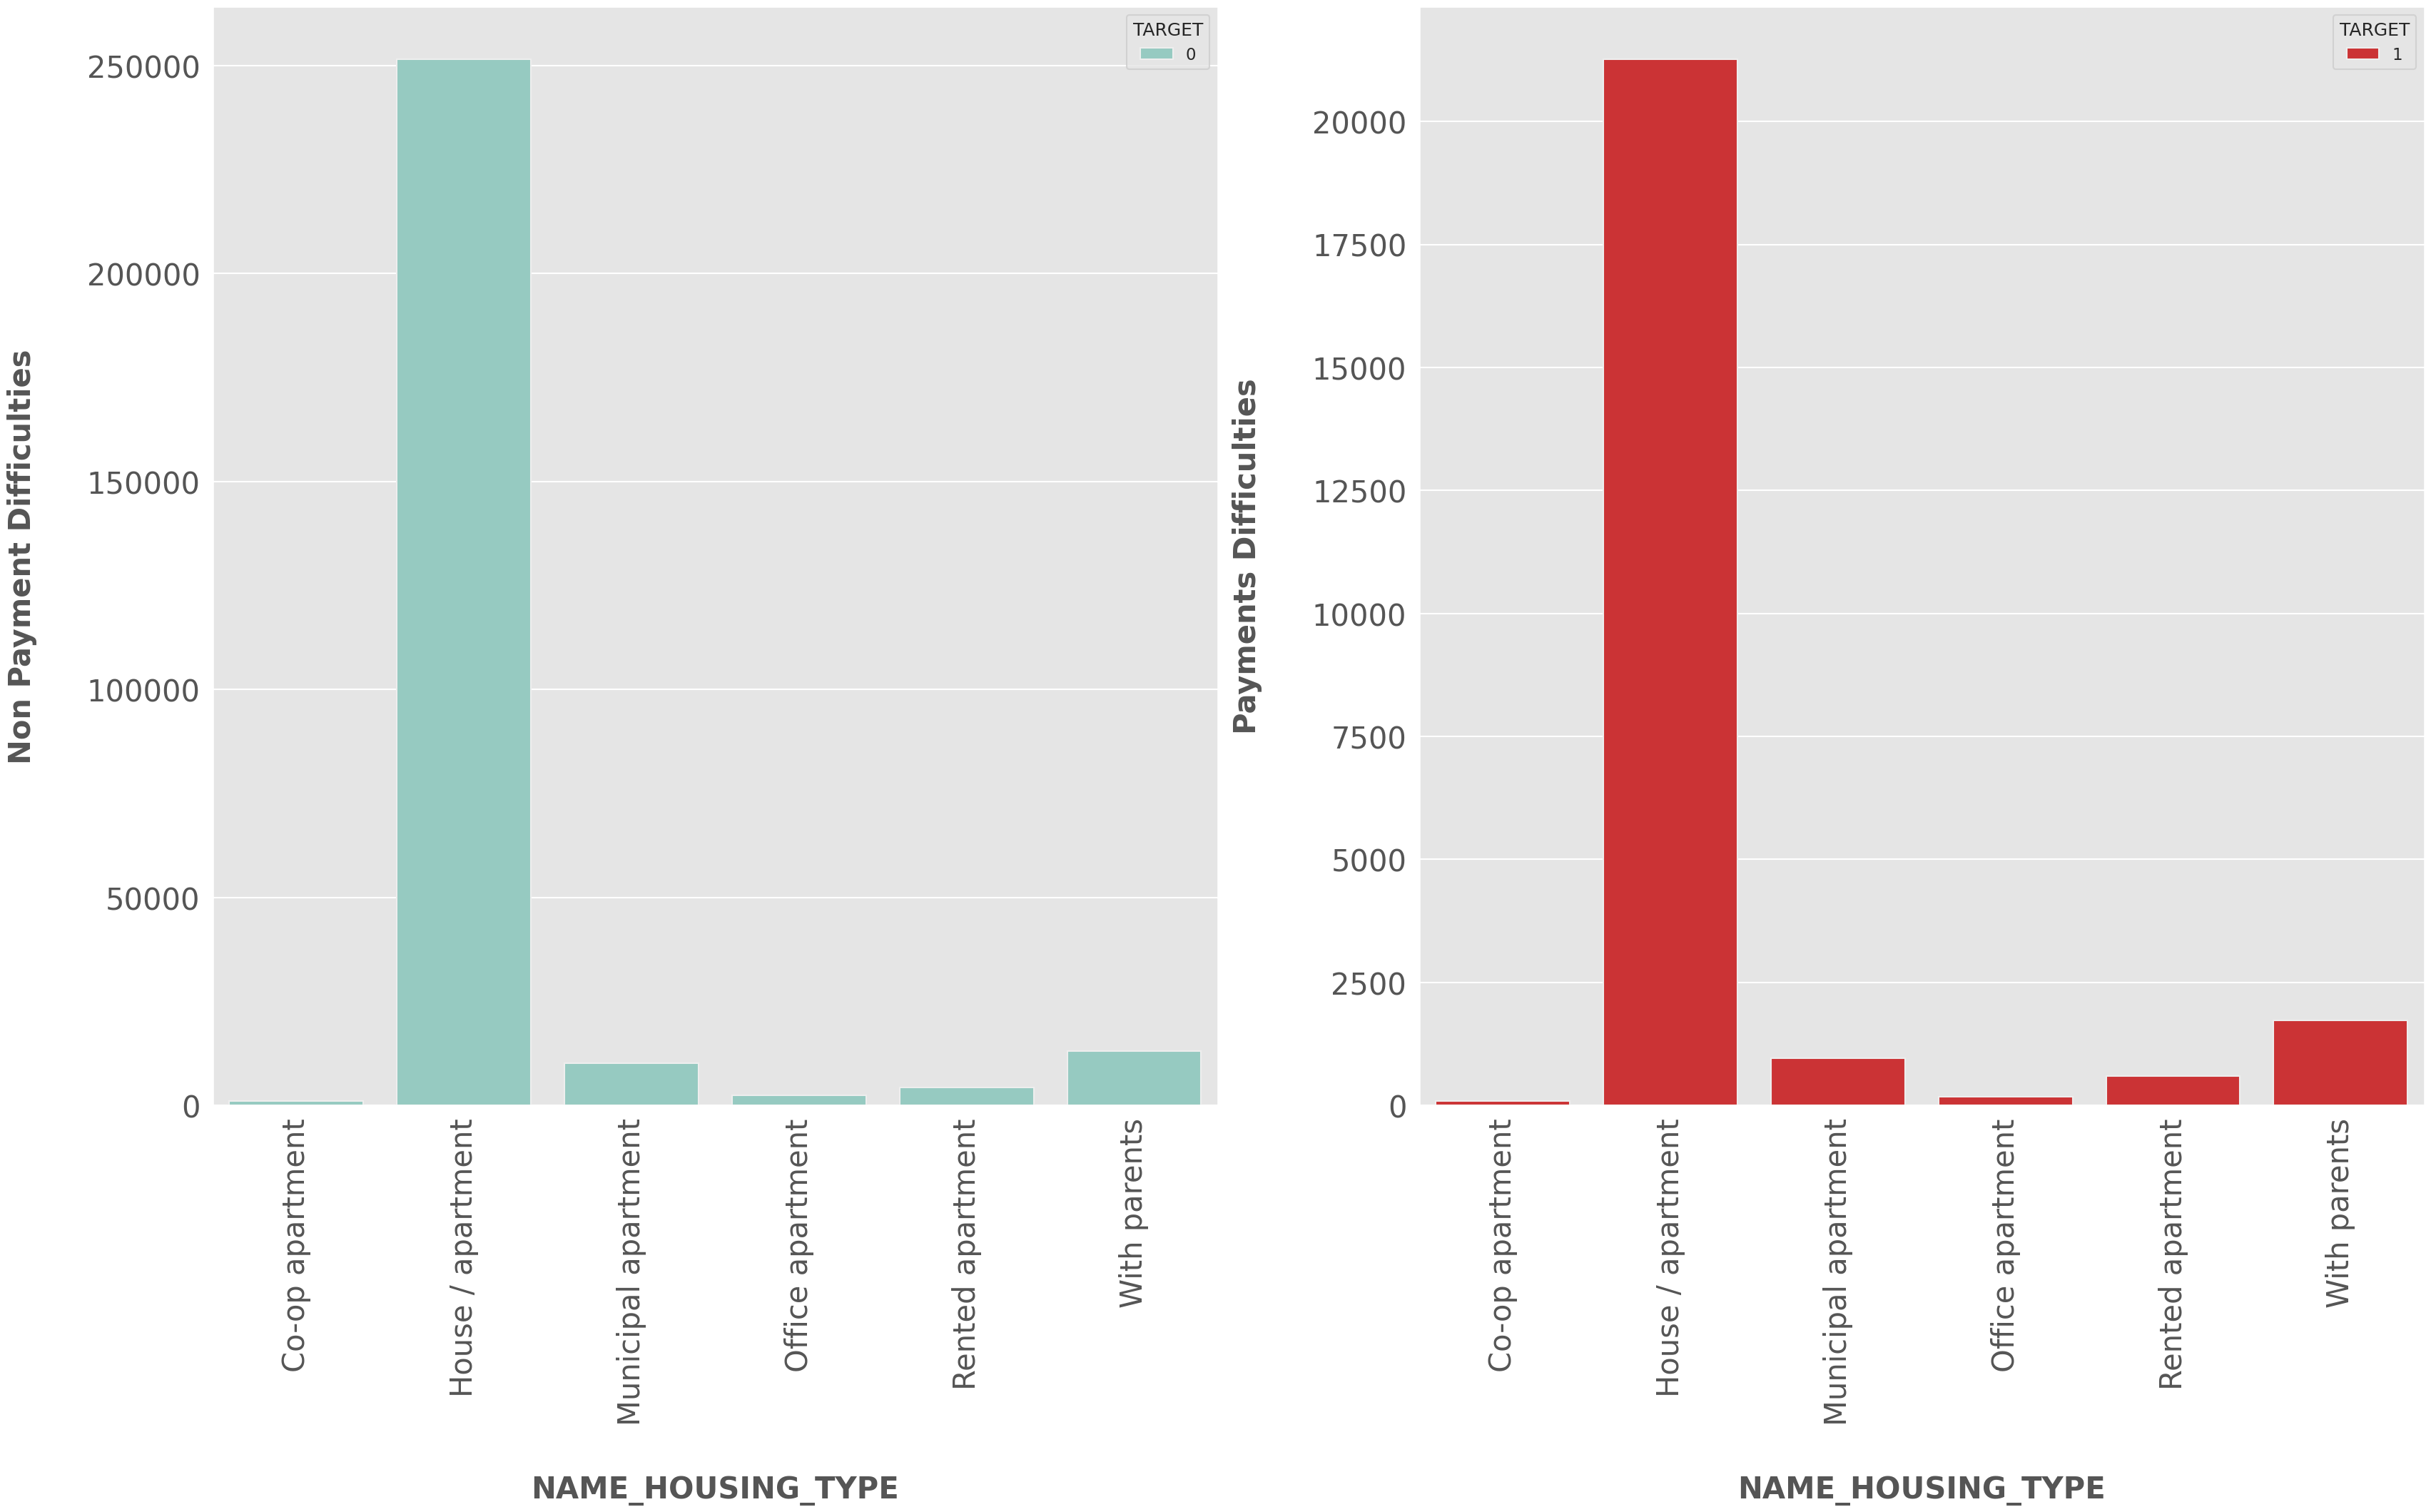

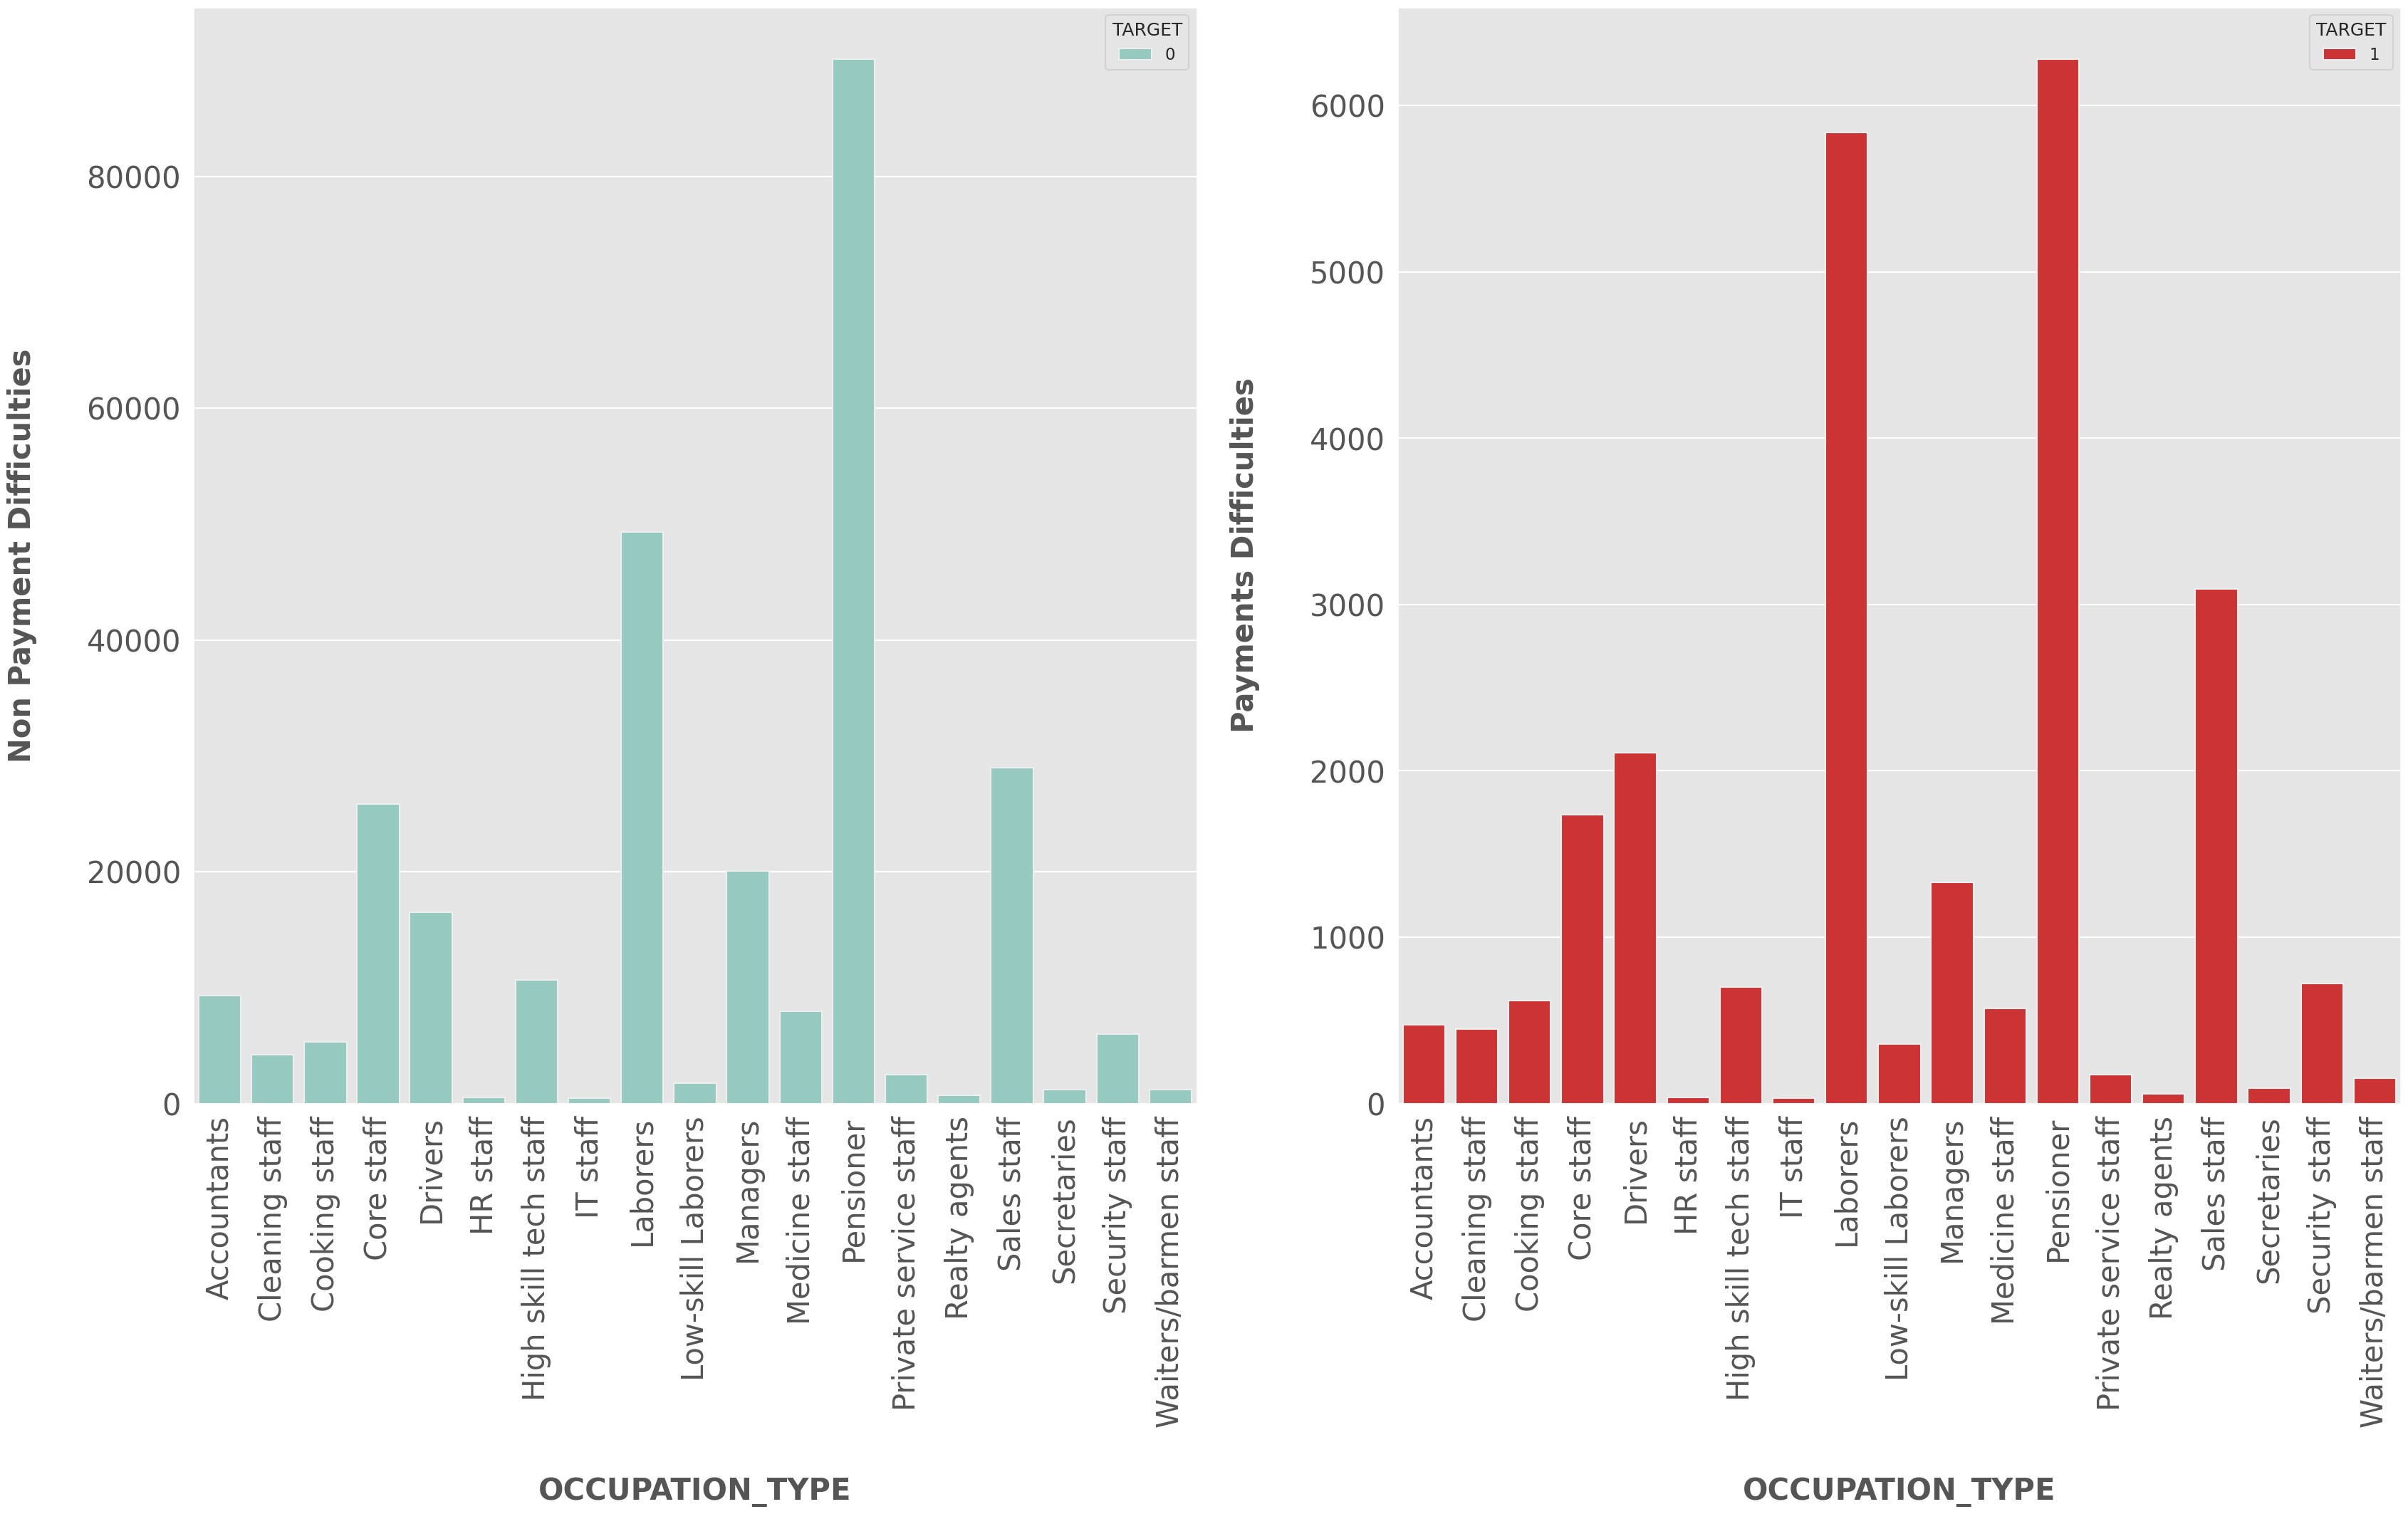

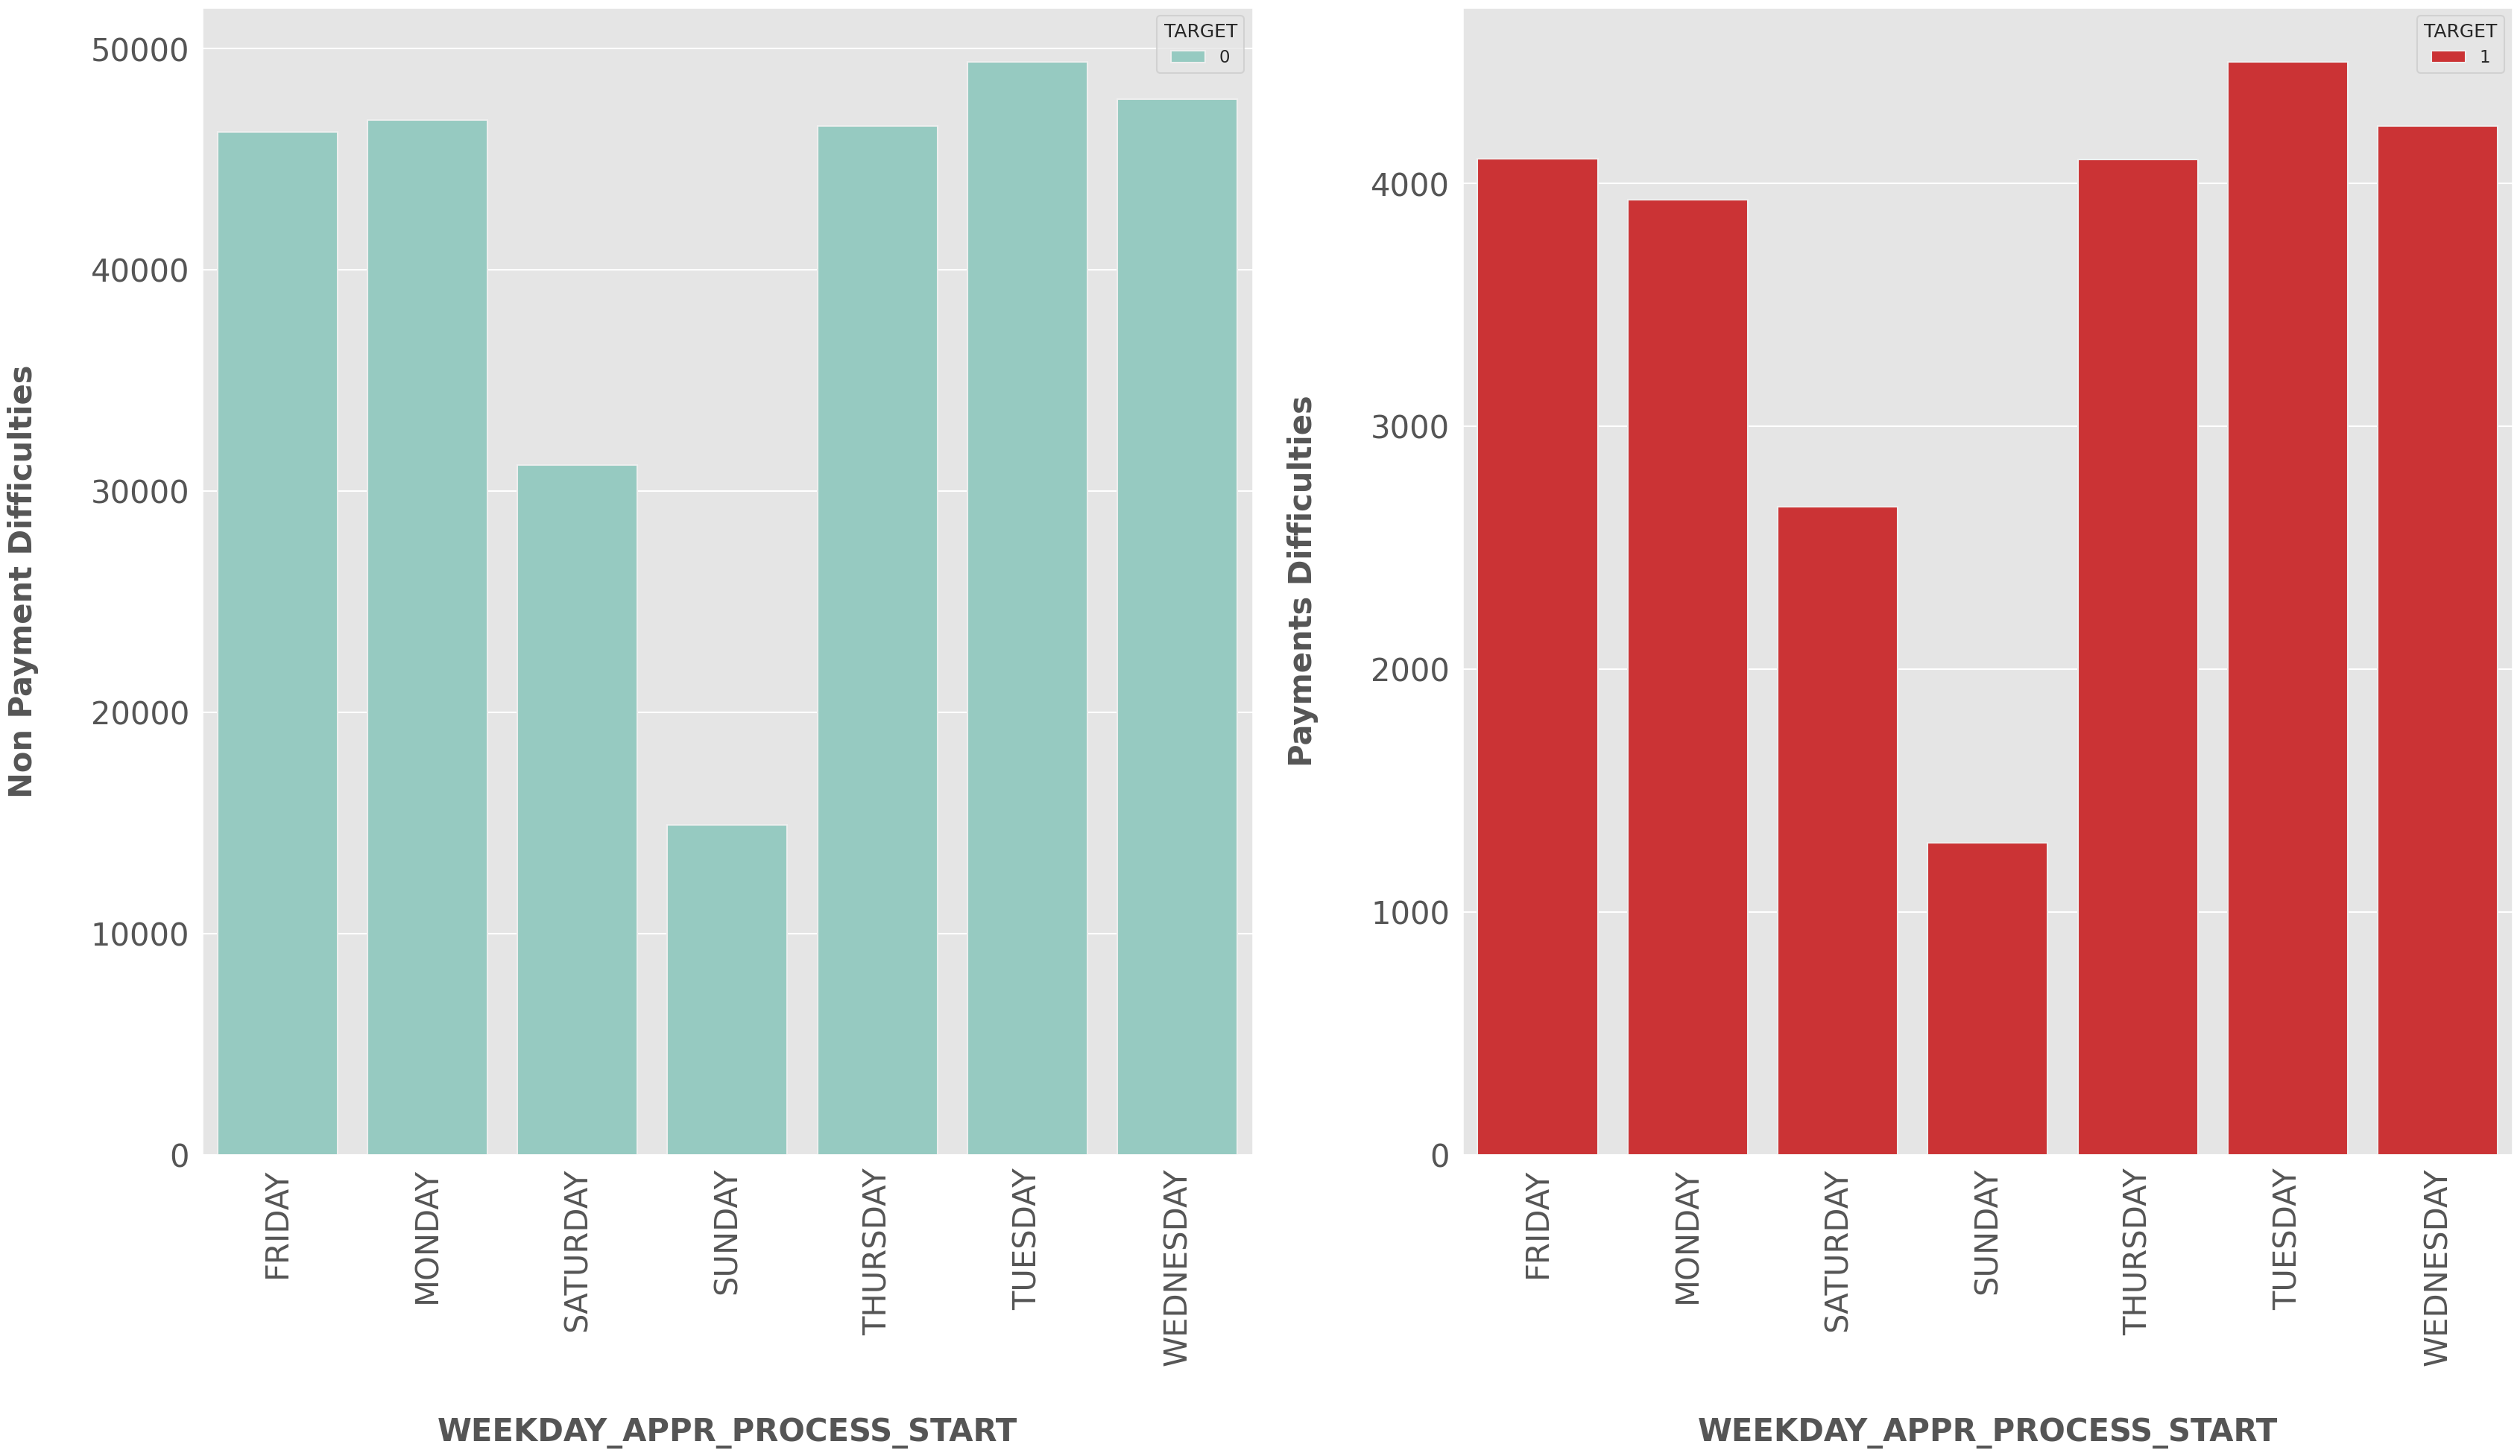

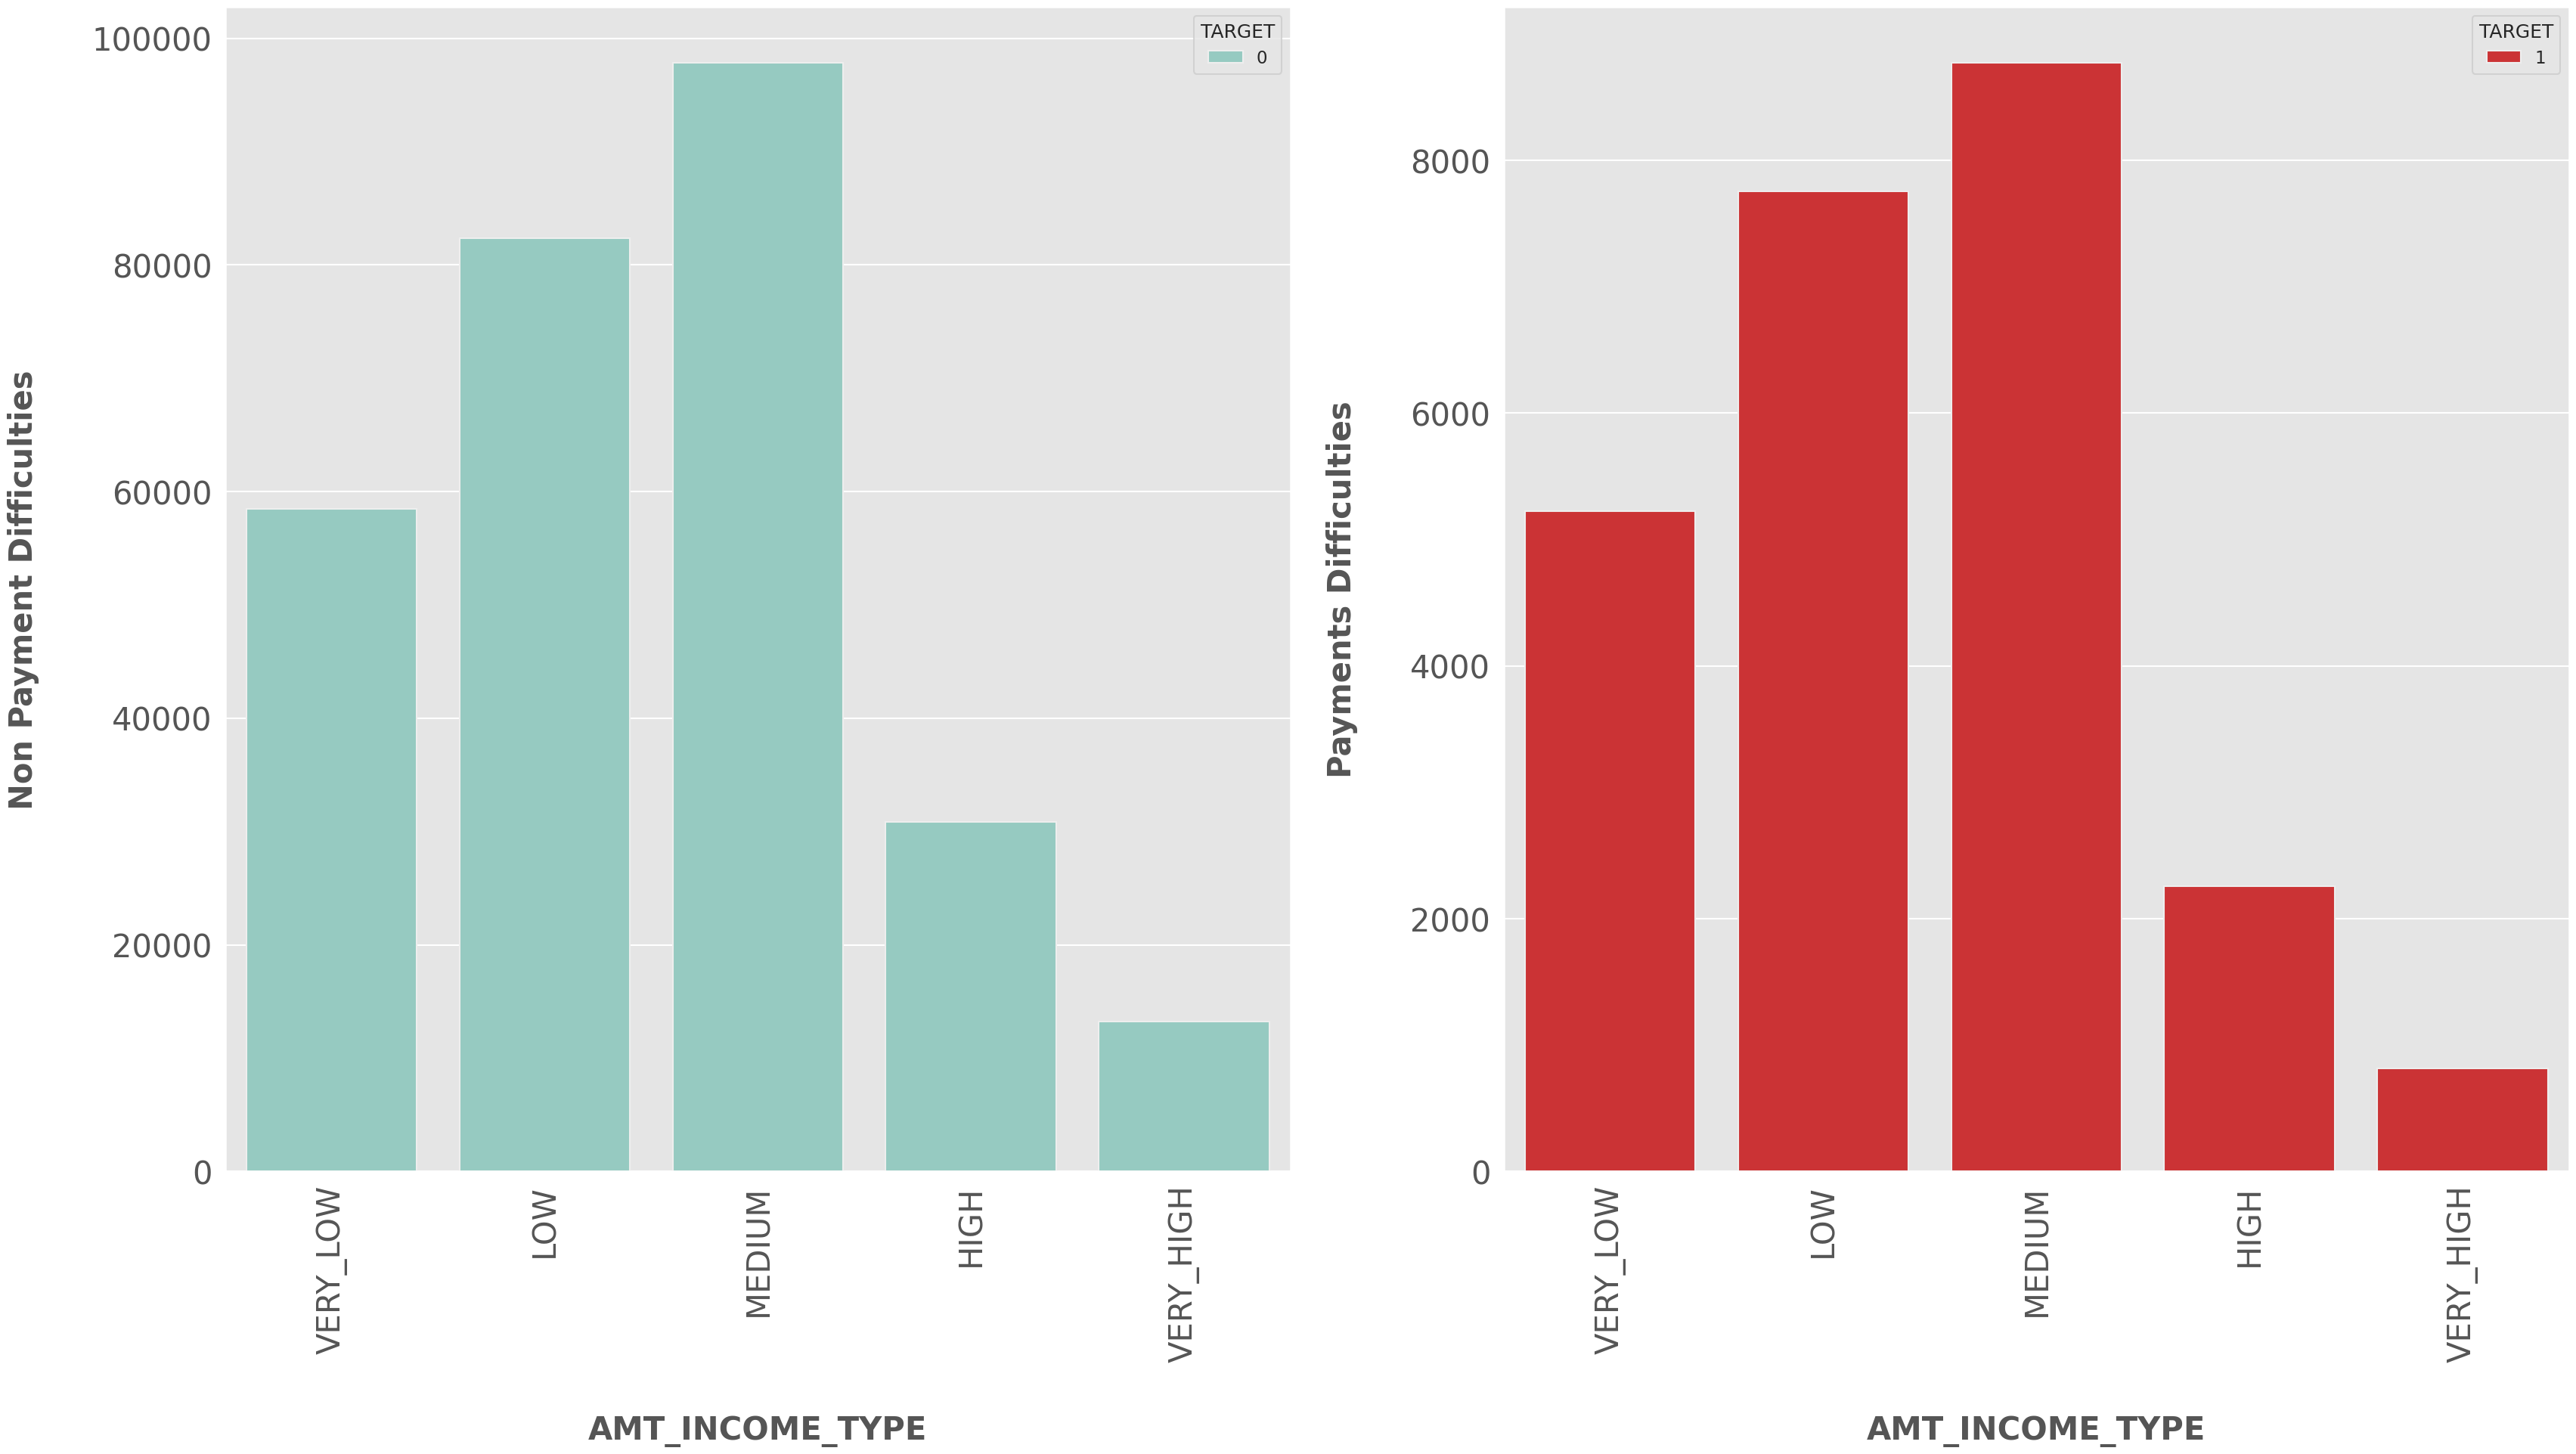

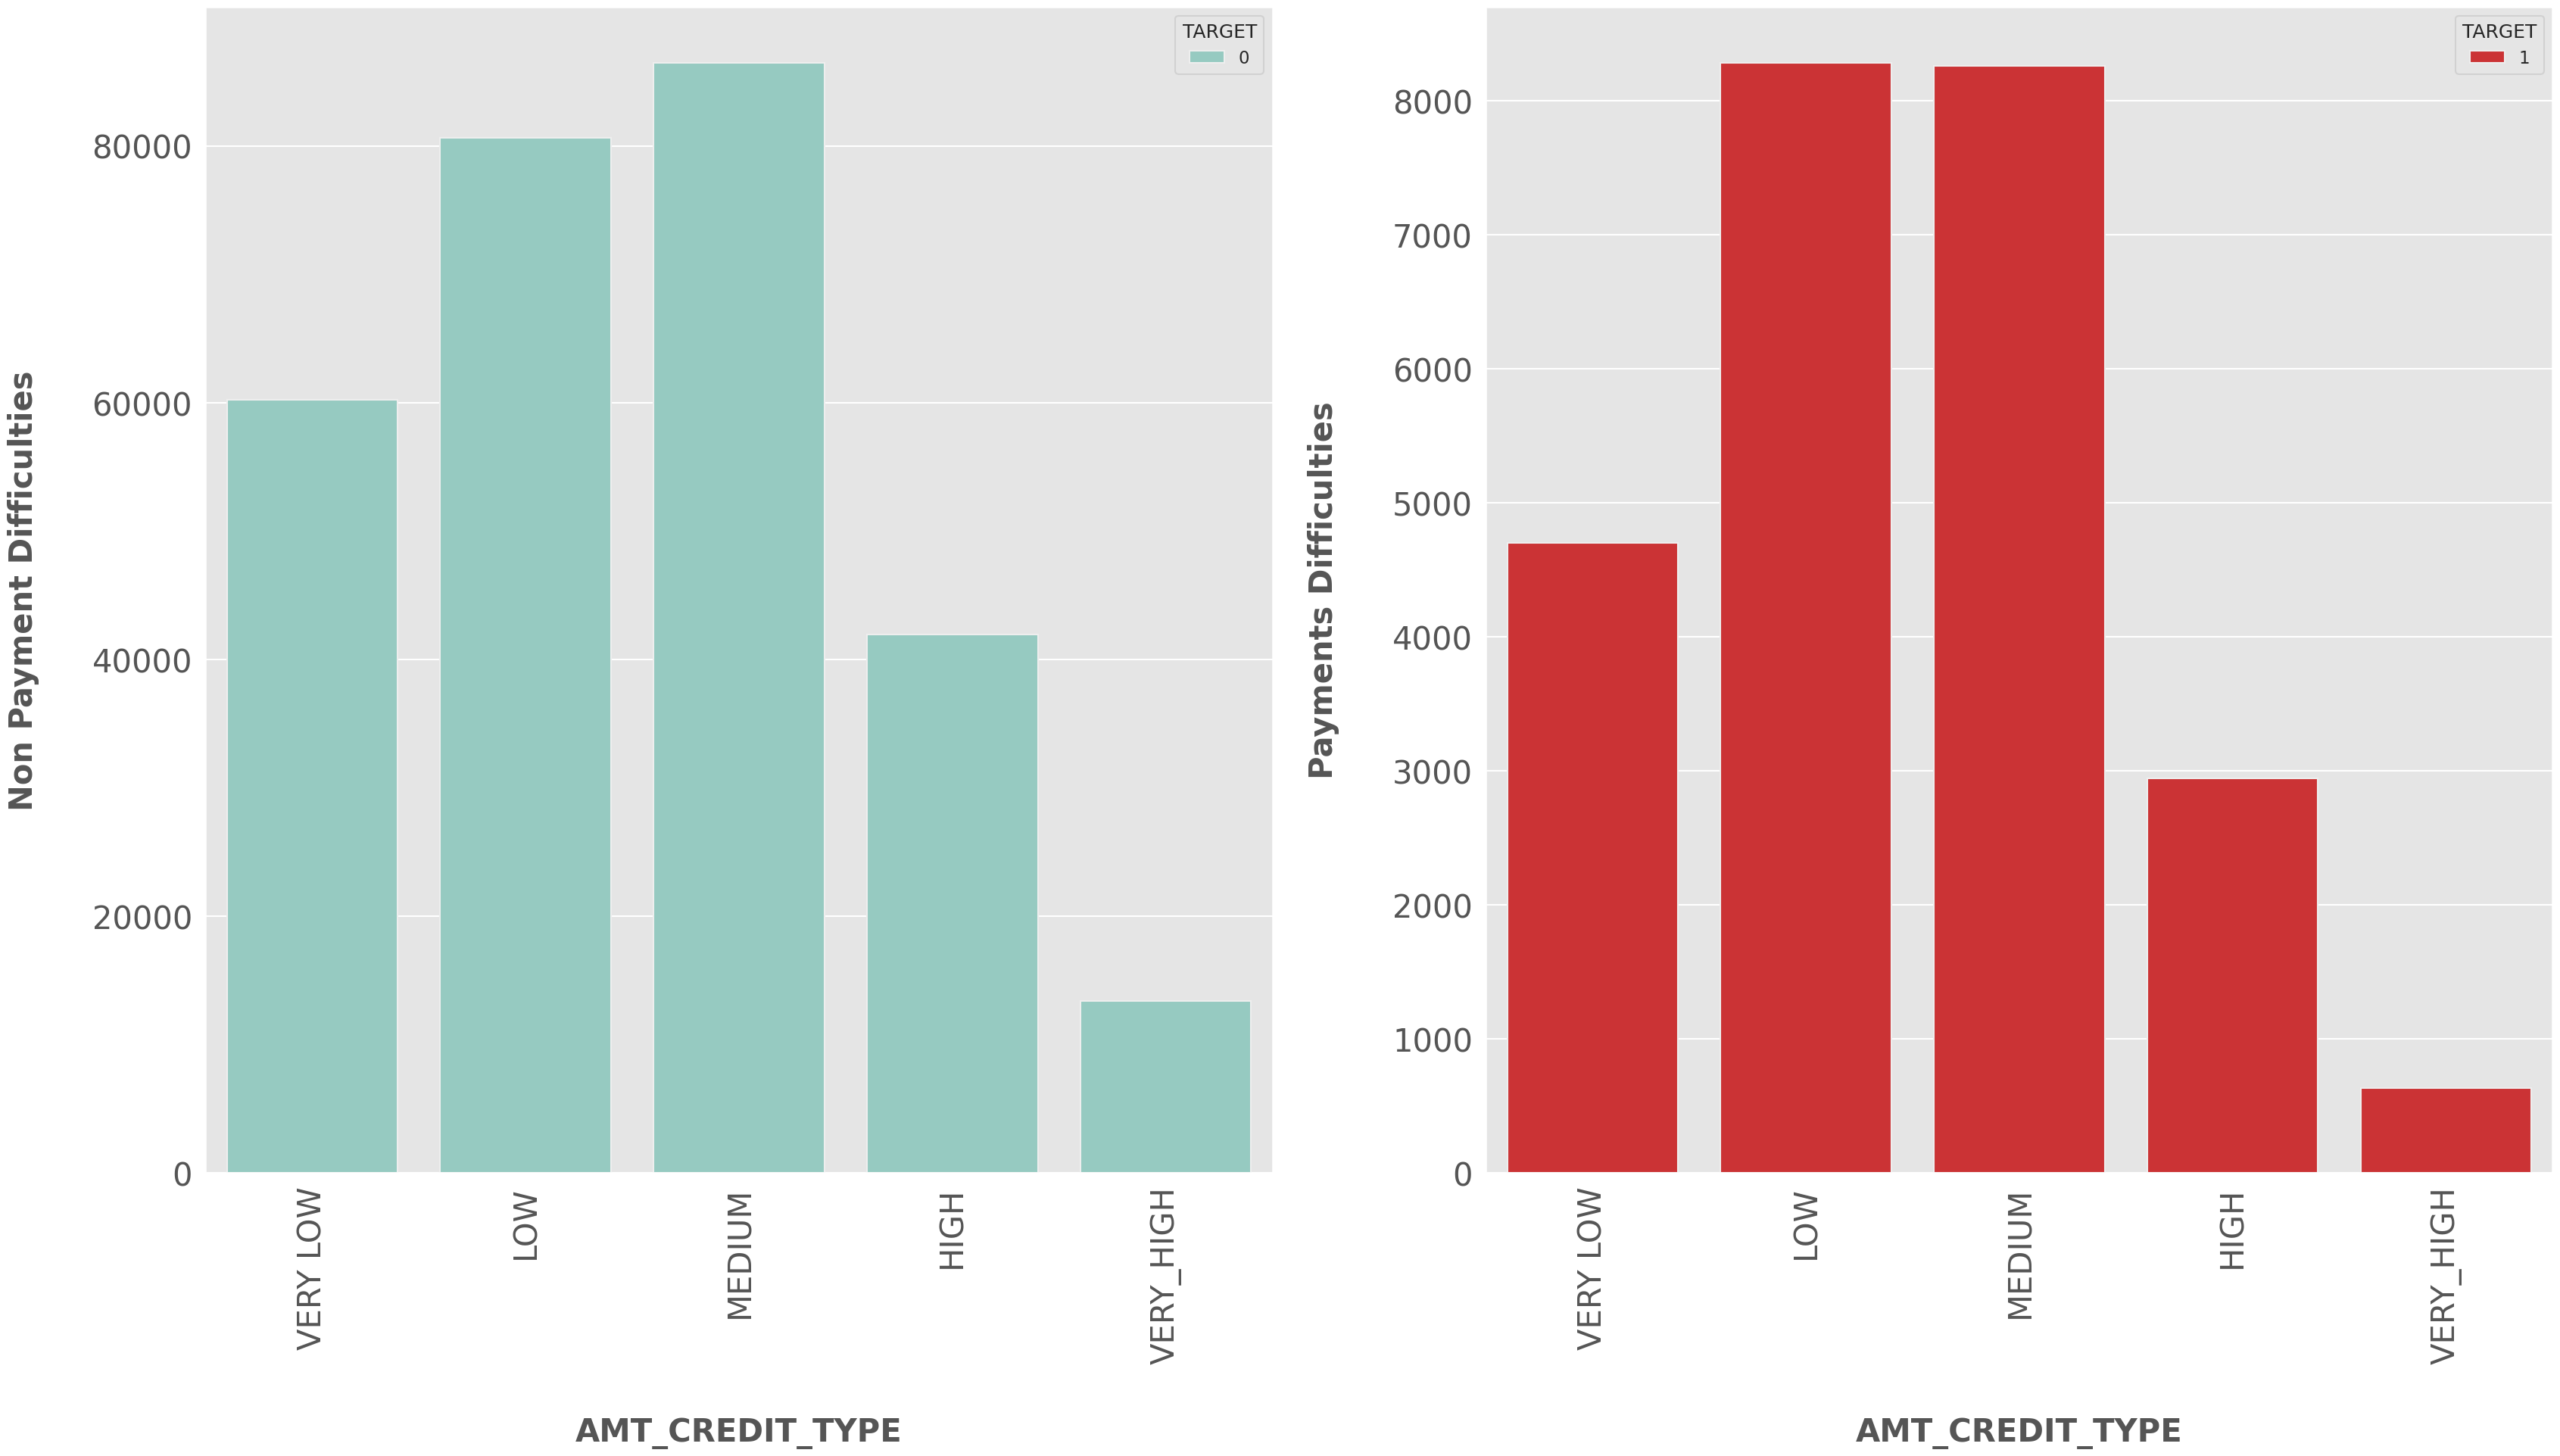

In [207]:
# Plot categorical columns
for cat in categorical_col:
  categorical_plot(cat)

#### NAME_CONTRACT_TYPE
Most of the clients have applied for Cash Loans while a very small proportion have applied for Revolving Loans for both defaulters and non-defaulters

#### NAME_TYPE_SUIT
Most of the clients were accompanied while applying for the loan. And for a few clients a family member was accompanying for both defaulters and non-defaulters

#### NAME_INCOME_TYPE
Clients who applied for loans were getting income by Working,Commercial associate and Pensioner are more likely to apply for the loan, highest being the Working class category .
Businessman, students and Unemployedless likely to apply for loan .
Working category have high risk to default.
State Servant is at Minimal risk to default.

#### NAME_EDUCATION_TYPE
Clients having education Secondary or Secondary Special are more likey to apply for the loan.
Clients having education Secondary or Secondary Special have higher risk to default.
Other education types have minimal risk.

#### NAME_FAMILY_STATUS
Married Clients seems to be applied most for the loan compared to others for both Defaulters and Non-Defaulters.
In case of Defaulters,Clients having single relationship are less risky
In case of Defaulters, Widows shows Minimal risk.

#### NAME_HOUSING_TYPE
From the bar chart, it is clear that Most of the clients own a house or living in a apartment for both Defaulters and Non-Defaulters.

#### OCCUPATION_TYPE
Pensioners have applied the most for the loan in case of Defaulters and Non-Defaulters.
Pensioner being highest followed by laborers have high risk to default.

#### AMT_INCOME_TYPE
Clients having Medium salary range are more likely to apply for the loan for both Defaulters and Non-defaulters.
Clients having low and medium income are at high risk to default.

#### AMT_CREDIT_TYPE
Most of the clients applied for Medium Credit Amount of the loan for both Defaulters and Non-defaulters.
Clients applying for high and low credit are at high risk of default.






In [208]:
#### Univariate Analysis of Numerical Columns WRT target variable
def uni(col):
    sns.set(style="darkgrid")
    plt.figure(figsize=(40,20))


    plt.subplot(1,2,1)
    sns.distplot(target0[col], color="g" )
    plt.yscale('linear')
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('Non Payment Difficulties', fontsize= 30, fontweight="bold")                    #Target 0
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)




    plt.subplot(1,2,2)
    sns.distplot(target1[col], color="r")
    plt.yscale('linear')
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('Payment Difficulties', fontsize= 30, fontweight="bold")                       # Target 1
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)

    plt.show();

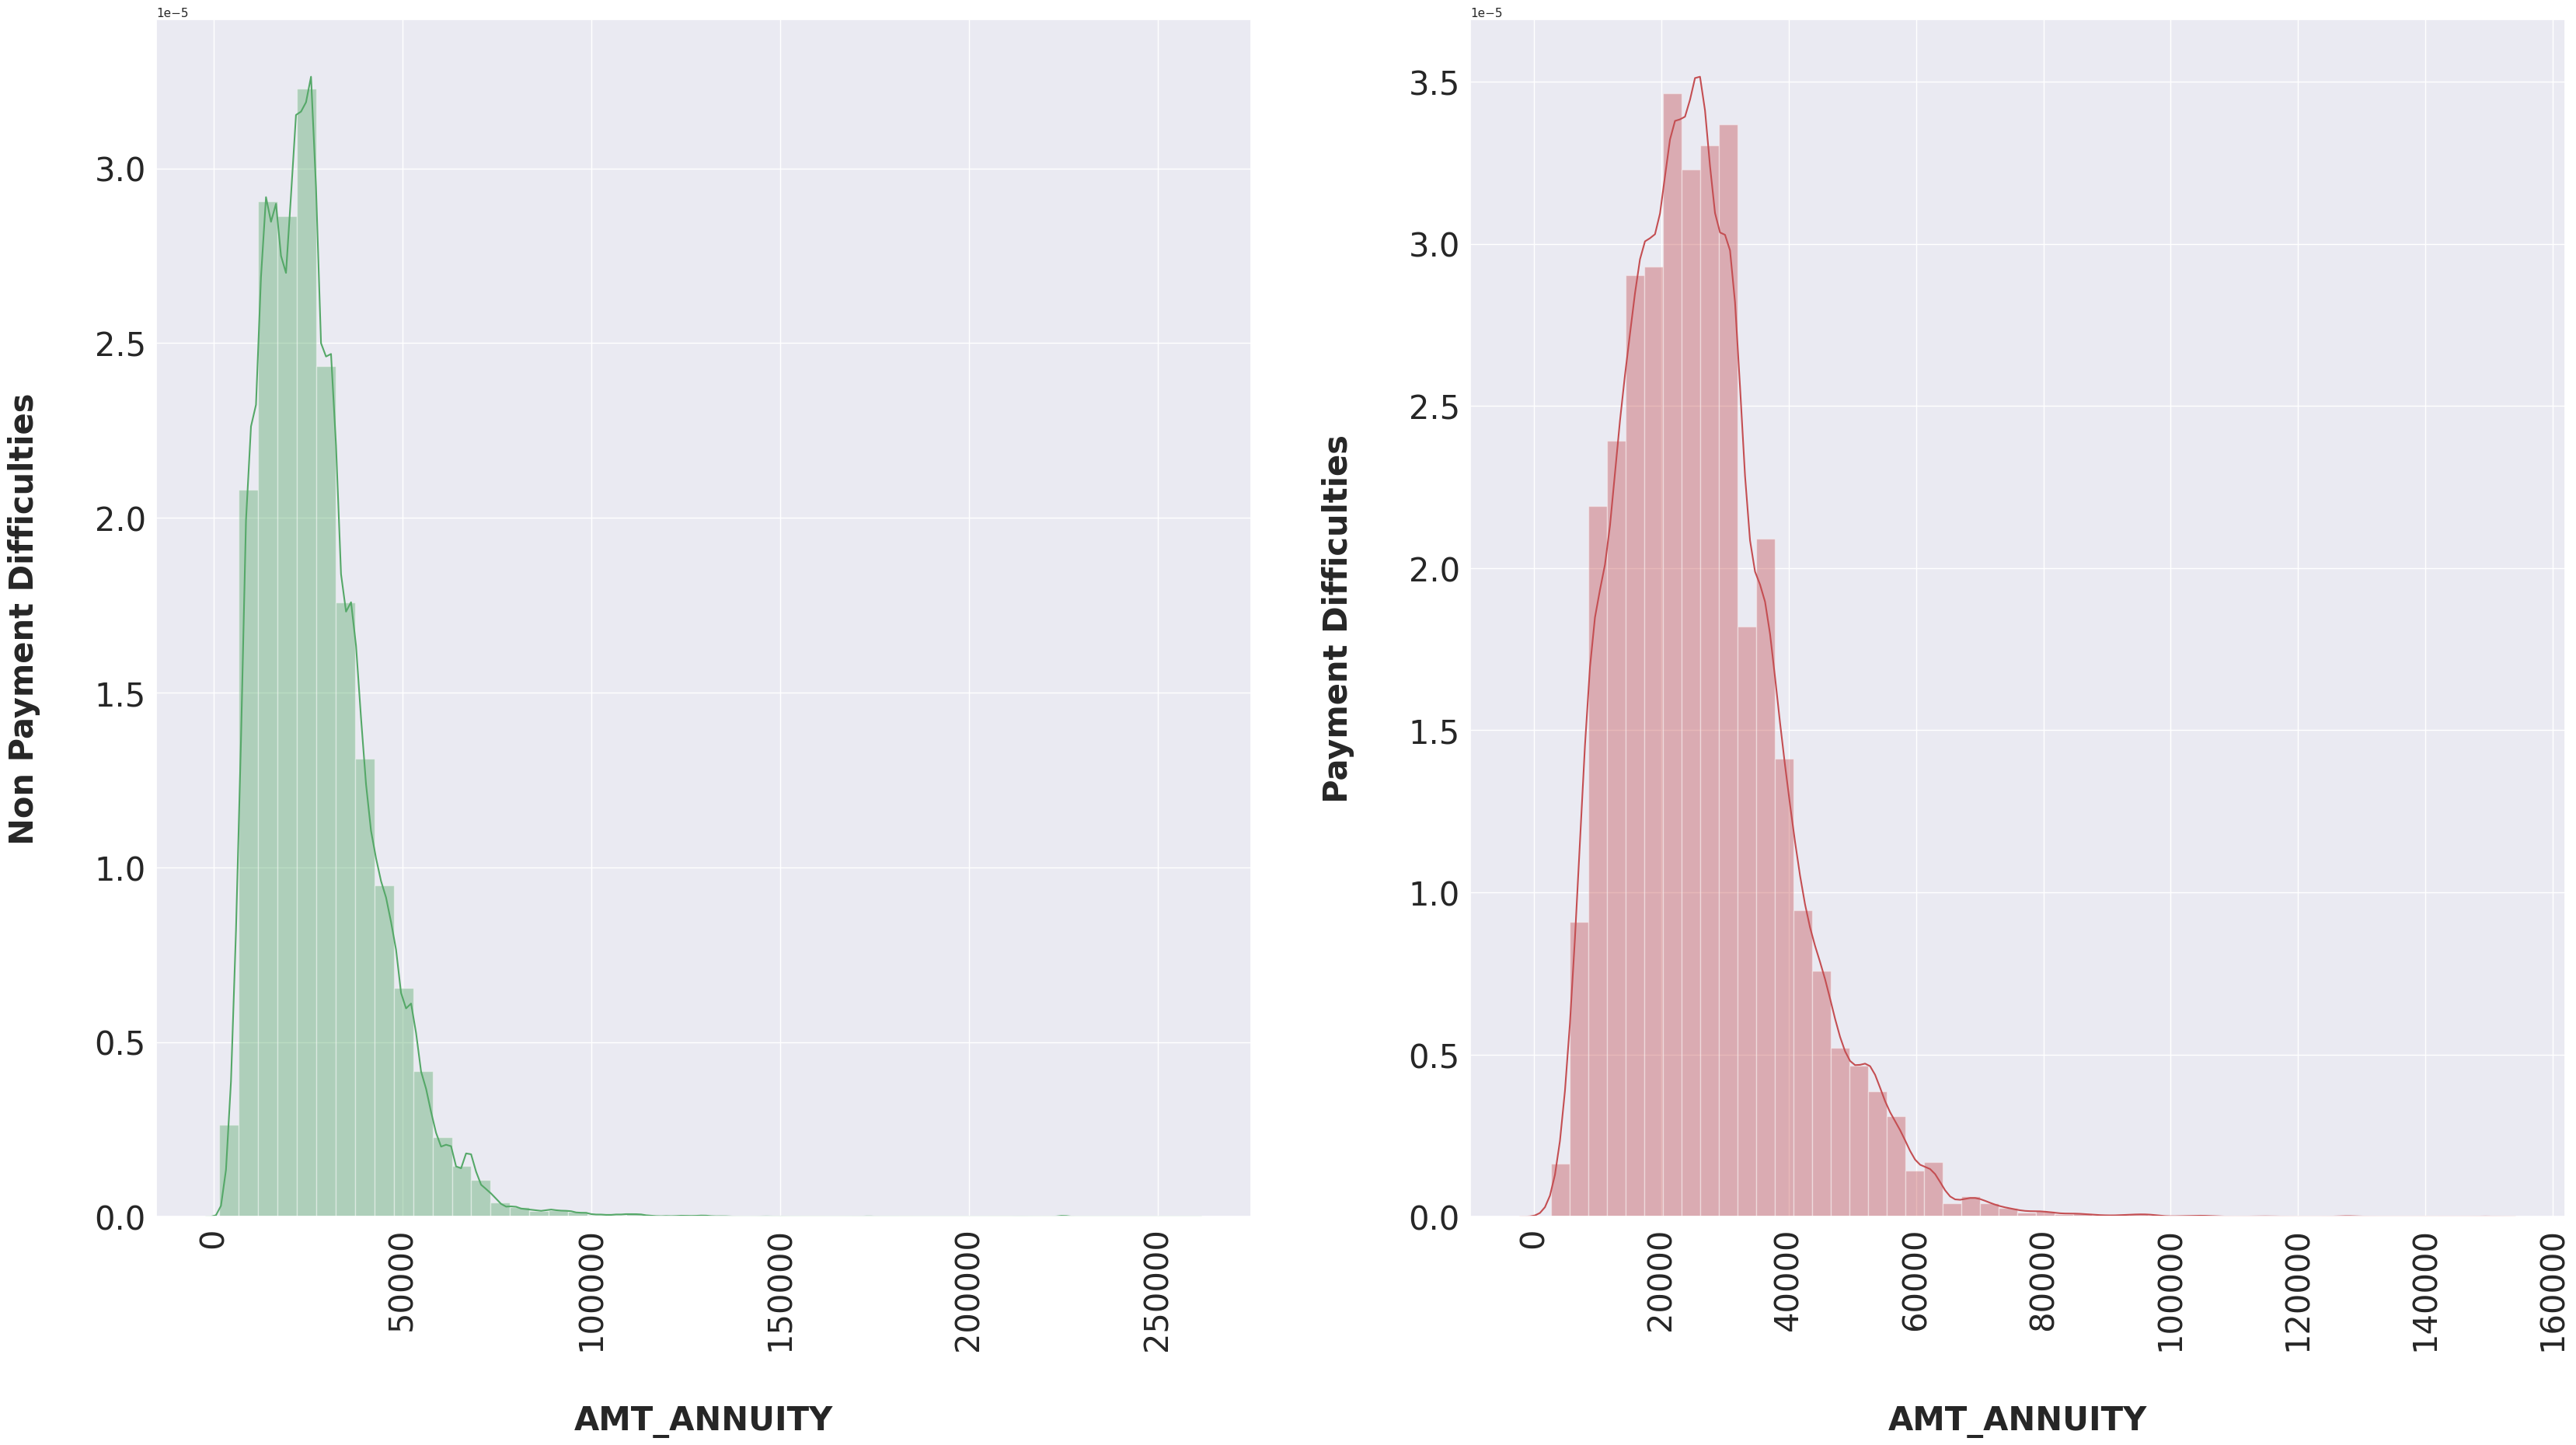

In [209]:
uni(col="AMT_ANNUITY")

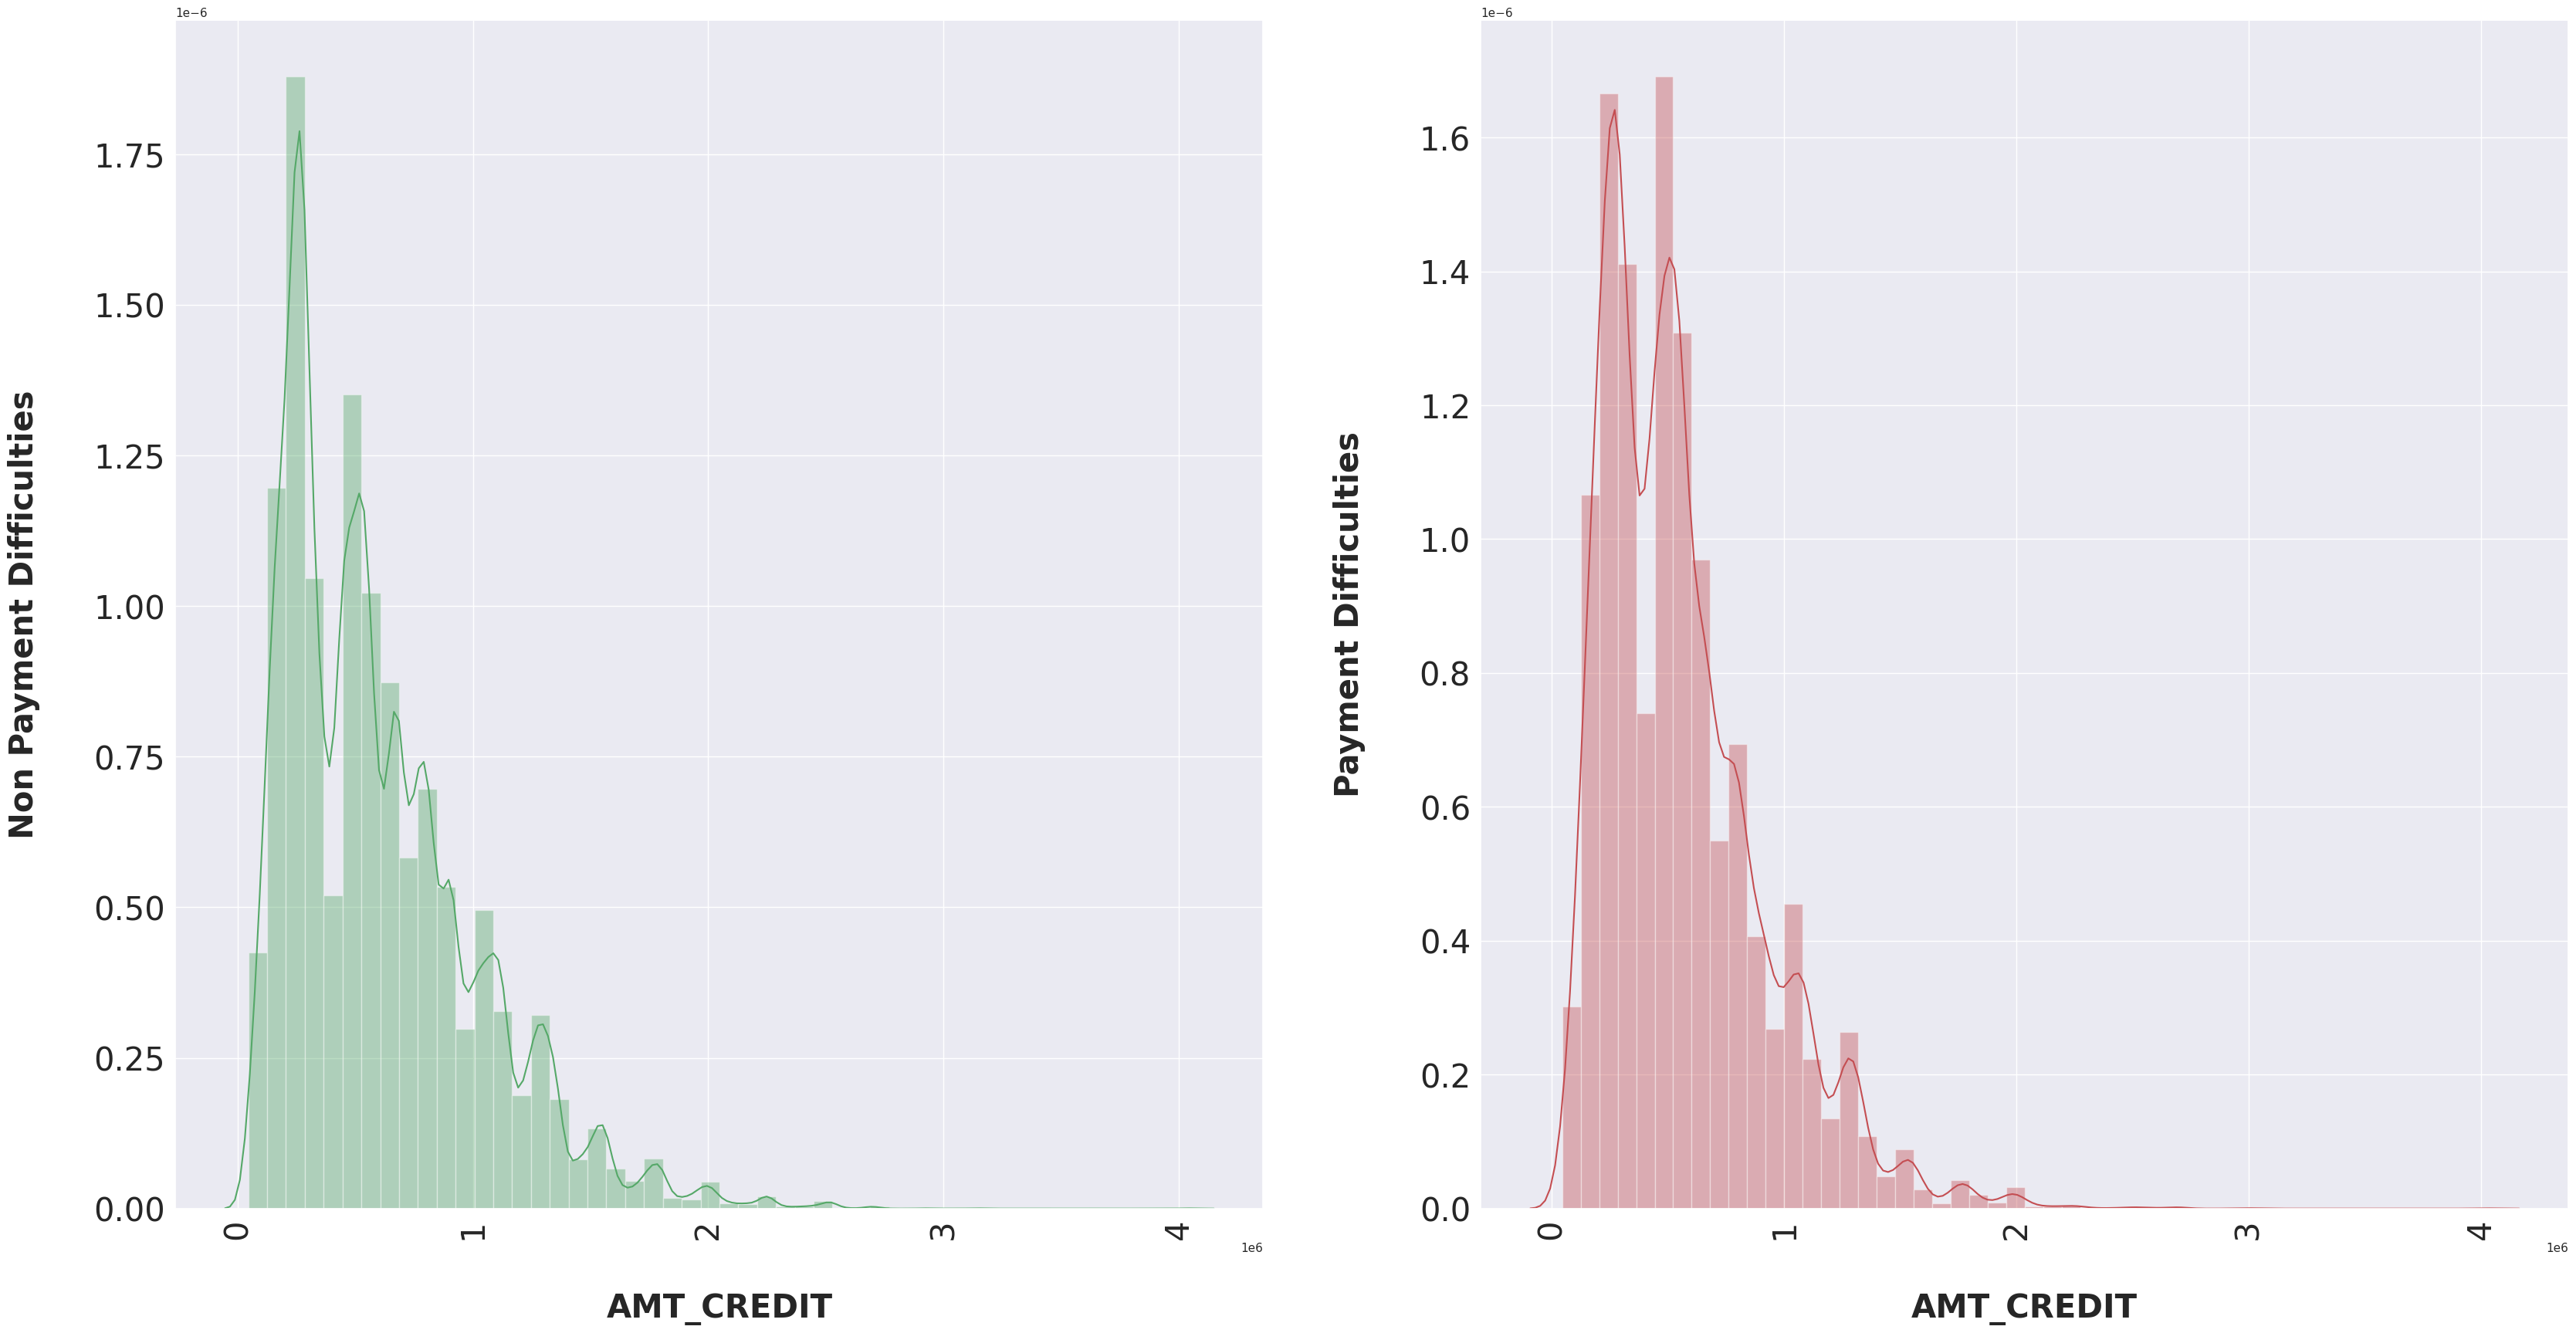

In [210]:
uni(col='AMT_CREDIT')

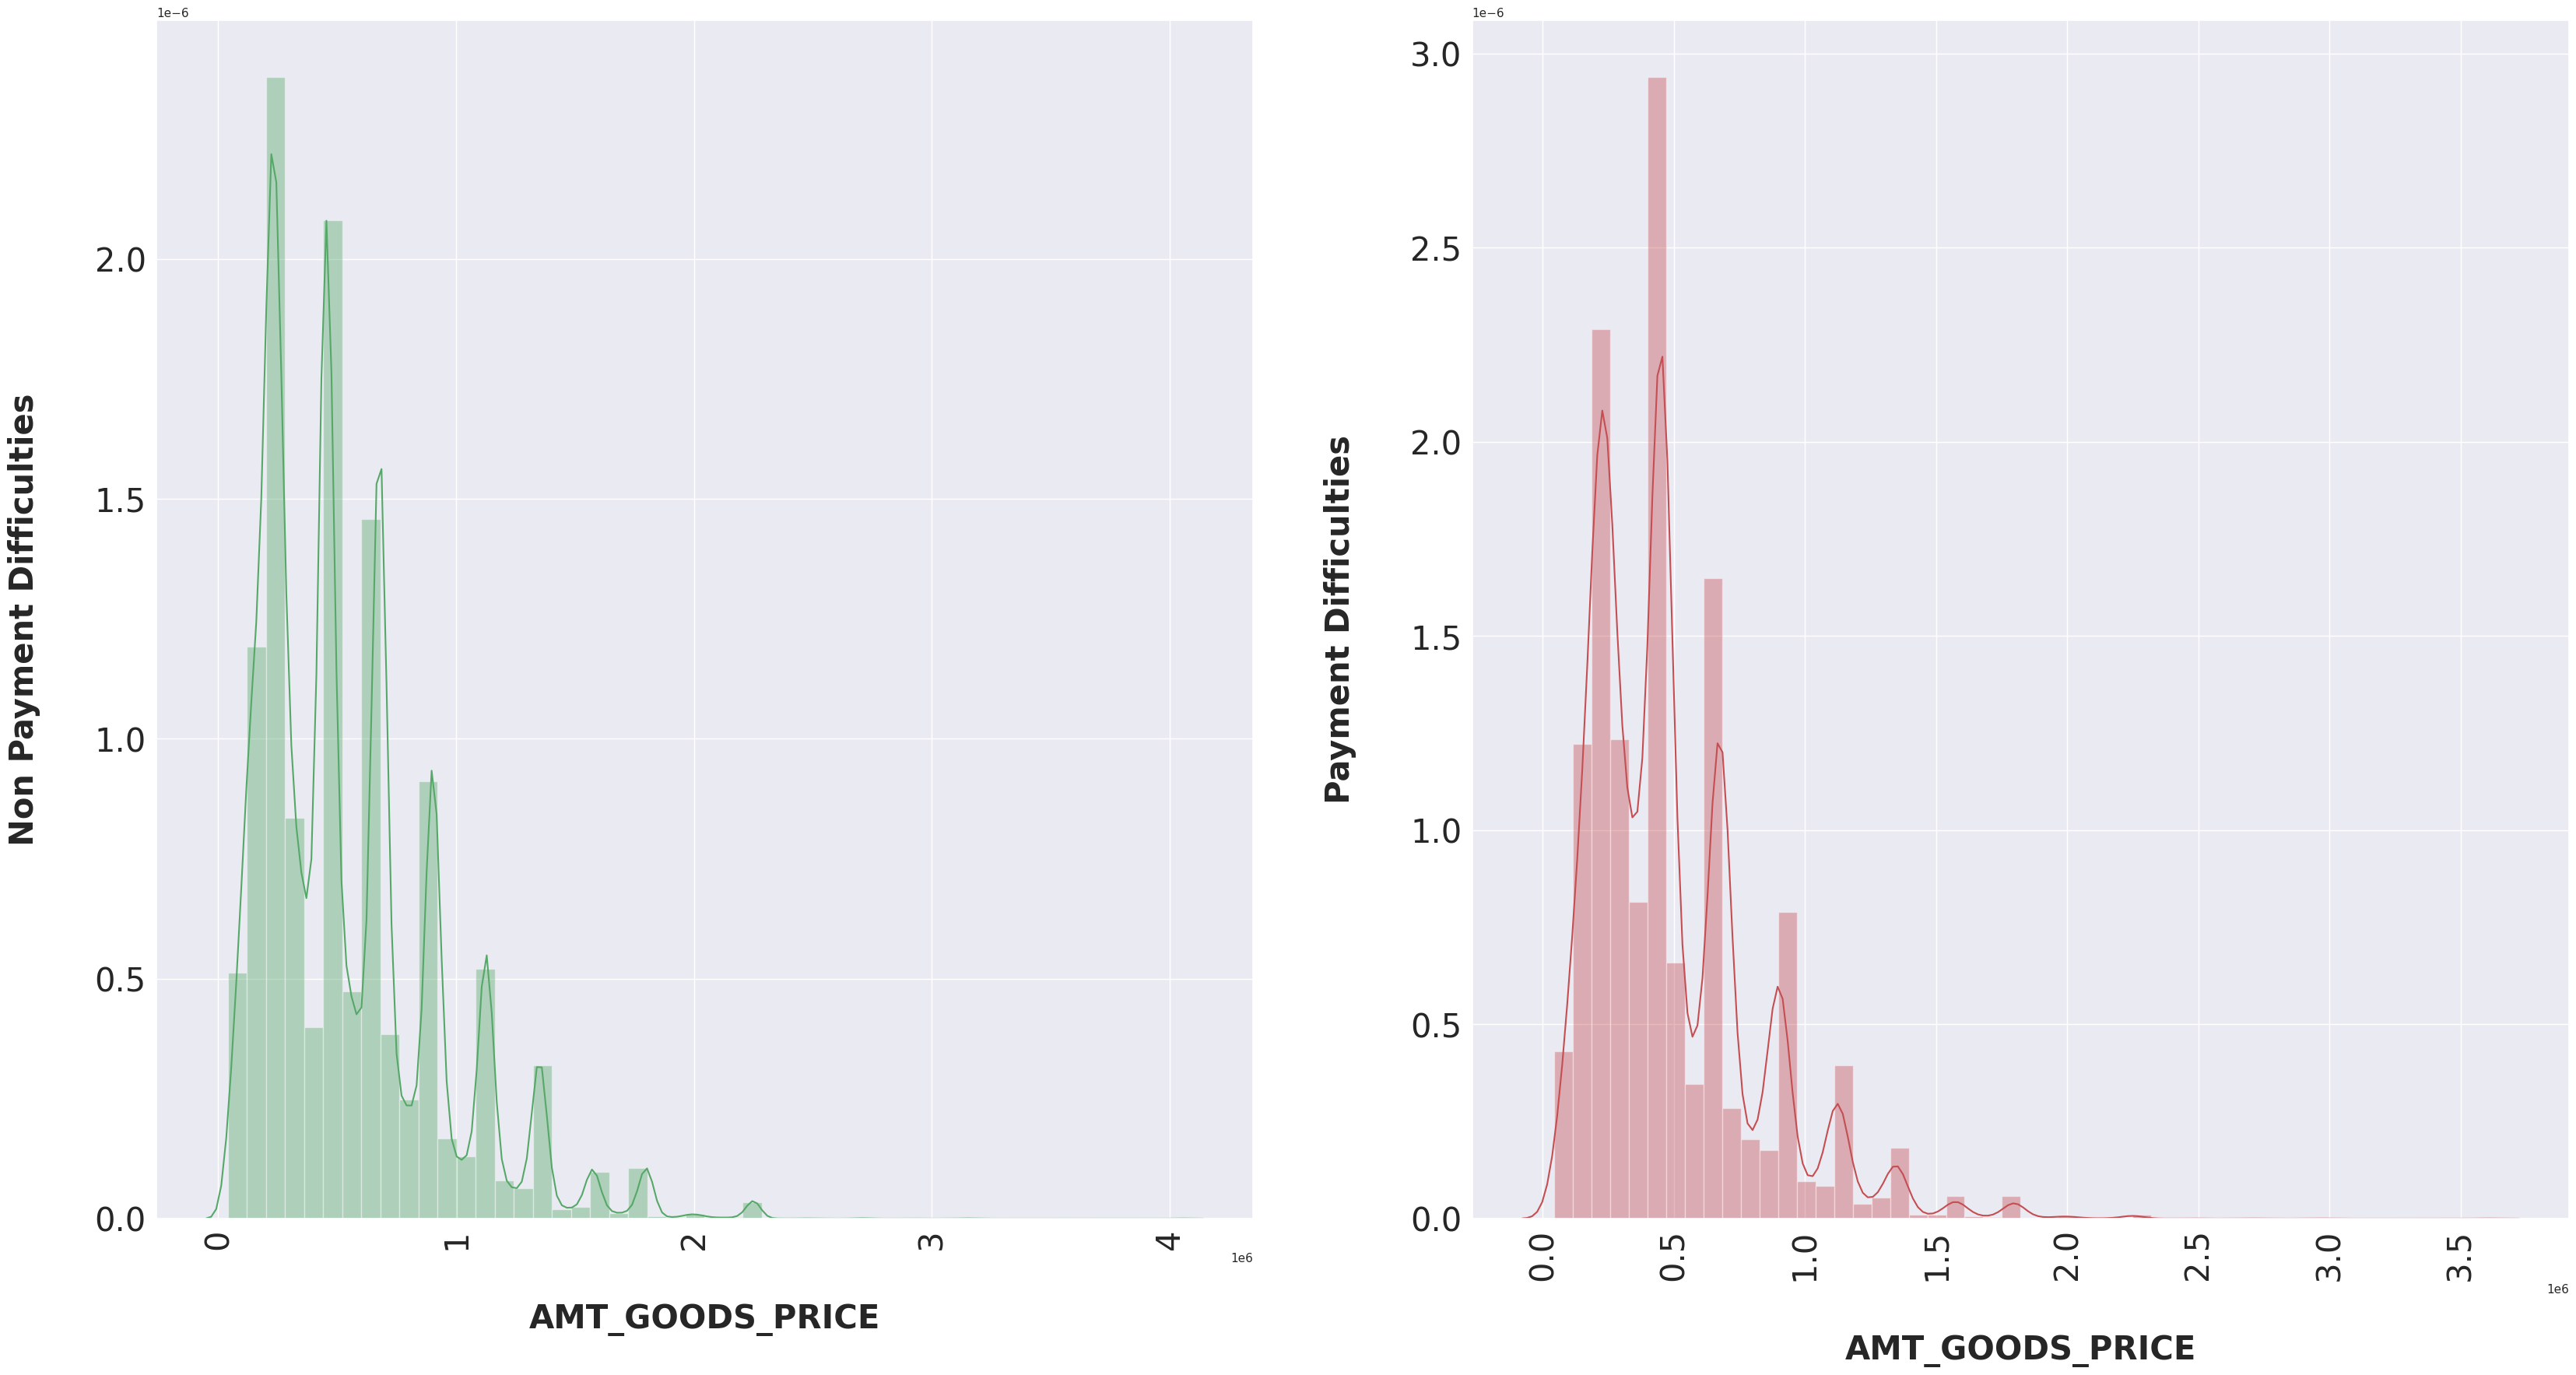

In [211]:
uni(col='AMT_GOODS_PRICE')

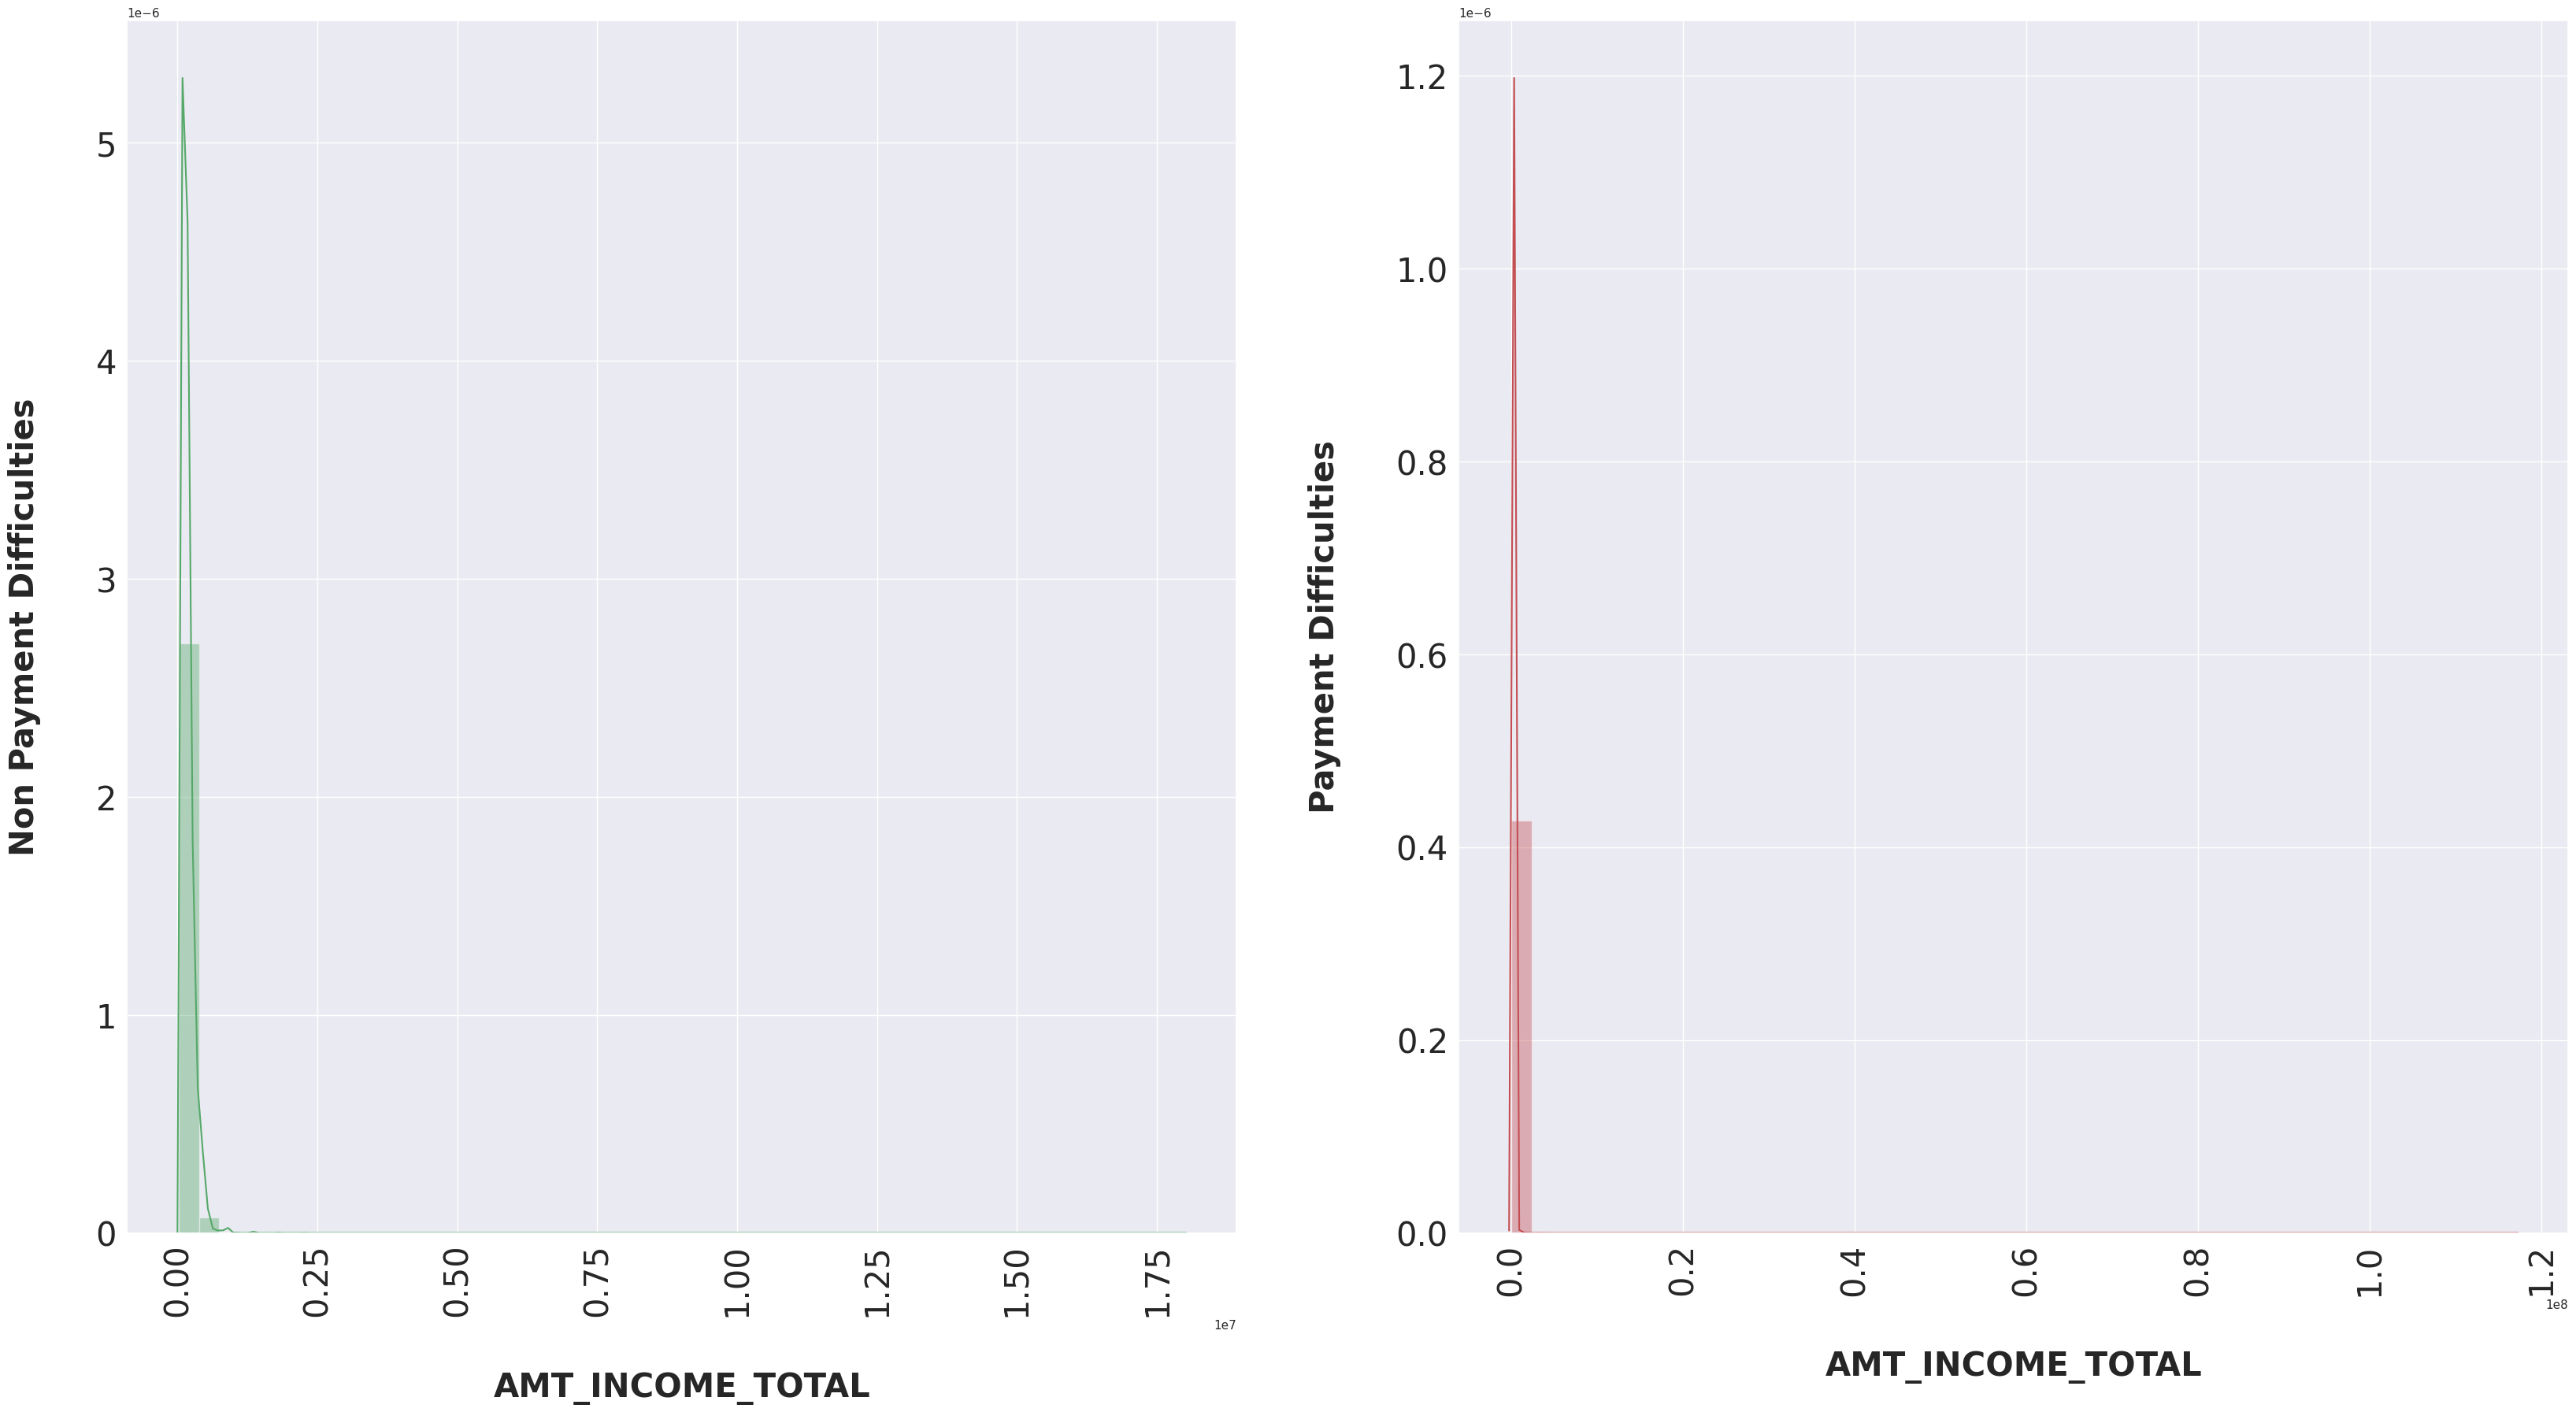

In [212]:
uni(col='AMT_INCOME_TOTAL')

#### Insights
People with **target one** has largely staggered income as compared to target zero. **Dist. Plot** clearly shows that the shape in Income total, Annuity, Credit and Good Price is similar for **Target 0** and similar for **Target 1**.
The plots are also highlighting that people who have difficulty in paying back loans with respect to their income, loan amount, price of goods against which loan is **Procured** and **Annuity**.


Dist. plot highlights the curve shape which is wider for Target 1 in comparison to **Target 0** which is narrower with well-defined edges.

In [213]:
#### Bivariate analysis: Numerical & Categorical wrt Target Variables
application_data[["TARGET","AMT_INCOME_TOTAL","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS"]]

TARGET  AMT_INCOME_TOTAL            NAME_EDUCATION_TYPE  \
0            1          202500.0  Secondary / secondary special   
1            0          270000.0               Higher education   
2            0           67500.0  Secondary / secondary special   
3            0          135000.0  Secondary / secondary special   
4            0          121500.0  Secondary / secondary special   
...        ...               ...                            ...   
307505       0          112500.0  Secondary / secondary special   
307506       0          157500.0  Secondary / secondary special   
307507       0           72000.0  Secondary / secondary special   
307508       0          153000.0               Higher education   
307509       1          171000.0  Secondary / secondary special   

          NAME_FAMILY_STATUS  
0       Single / not married  
1                    Married  
2       Single / not married  
3             Civil marriage  
4       Single / not married  
...                      ...  
307505  Single / not married  
307506             Separated  
307507                 Widow  
307508             Separated  
307509               Married  

[307510 rows x 4 columns]

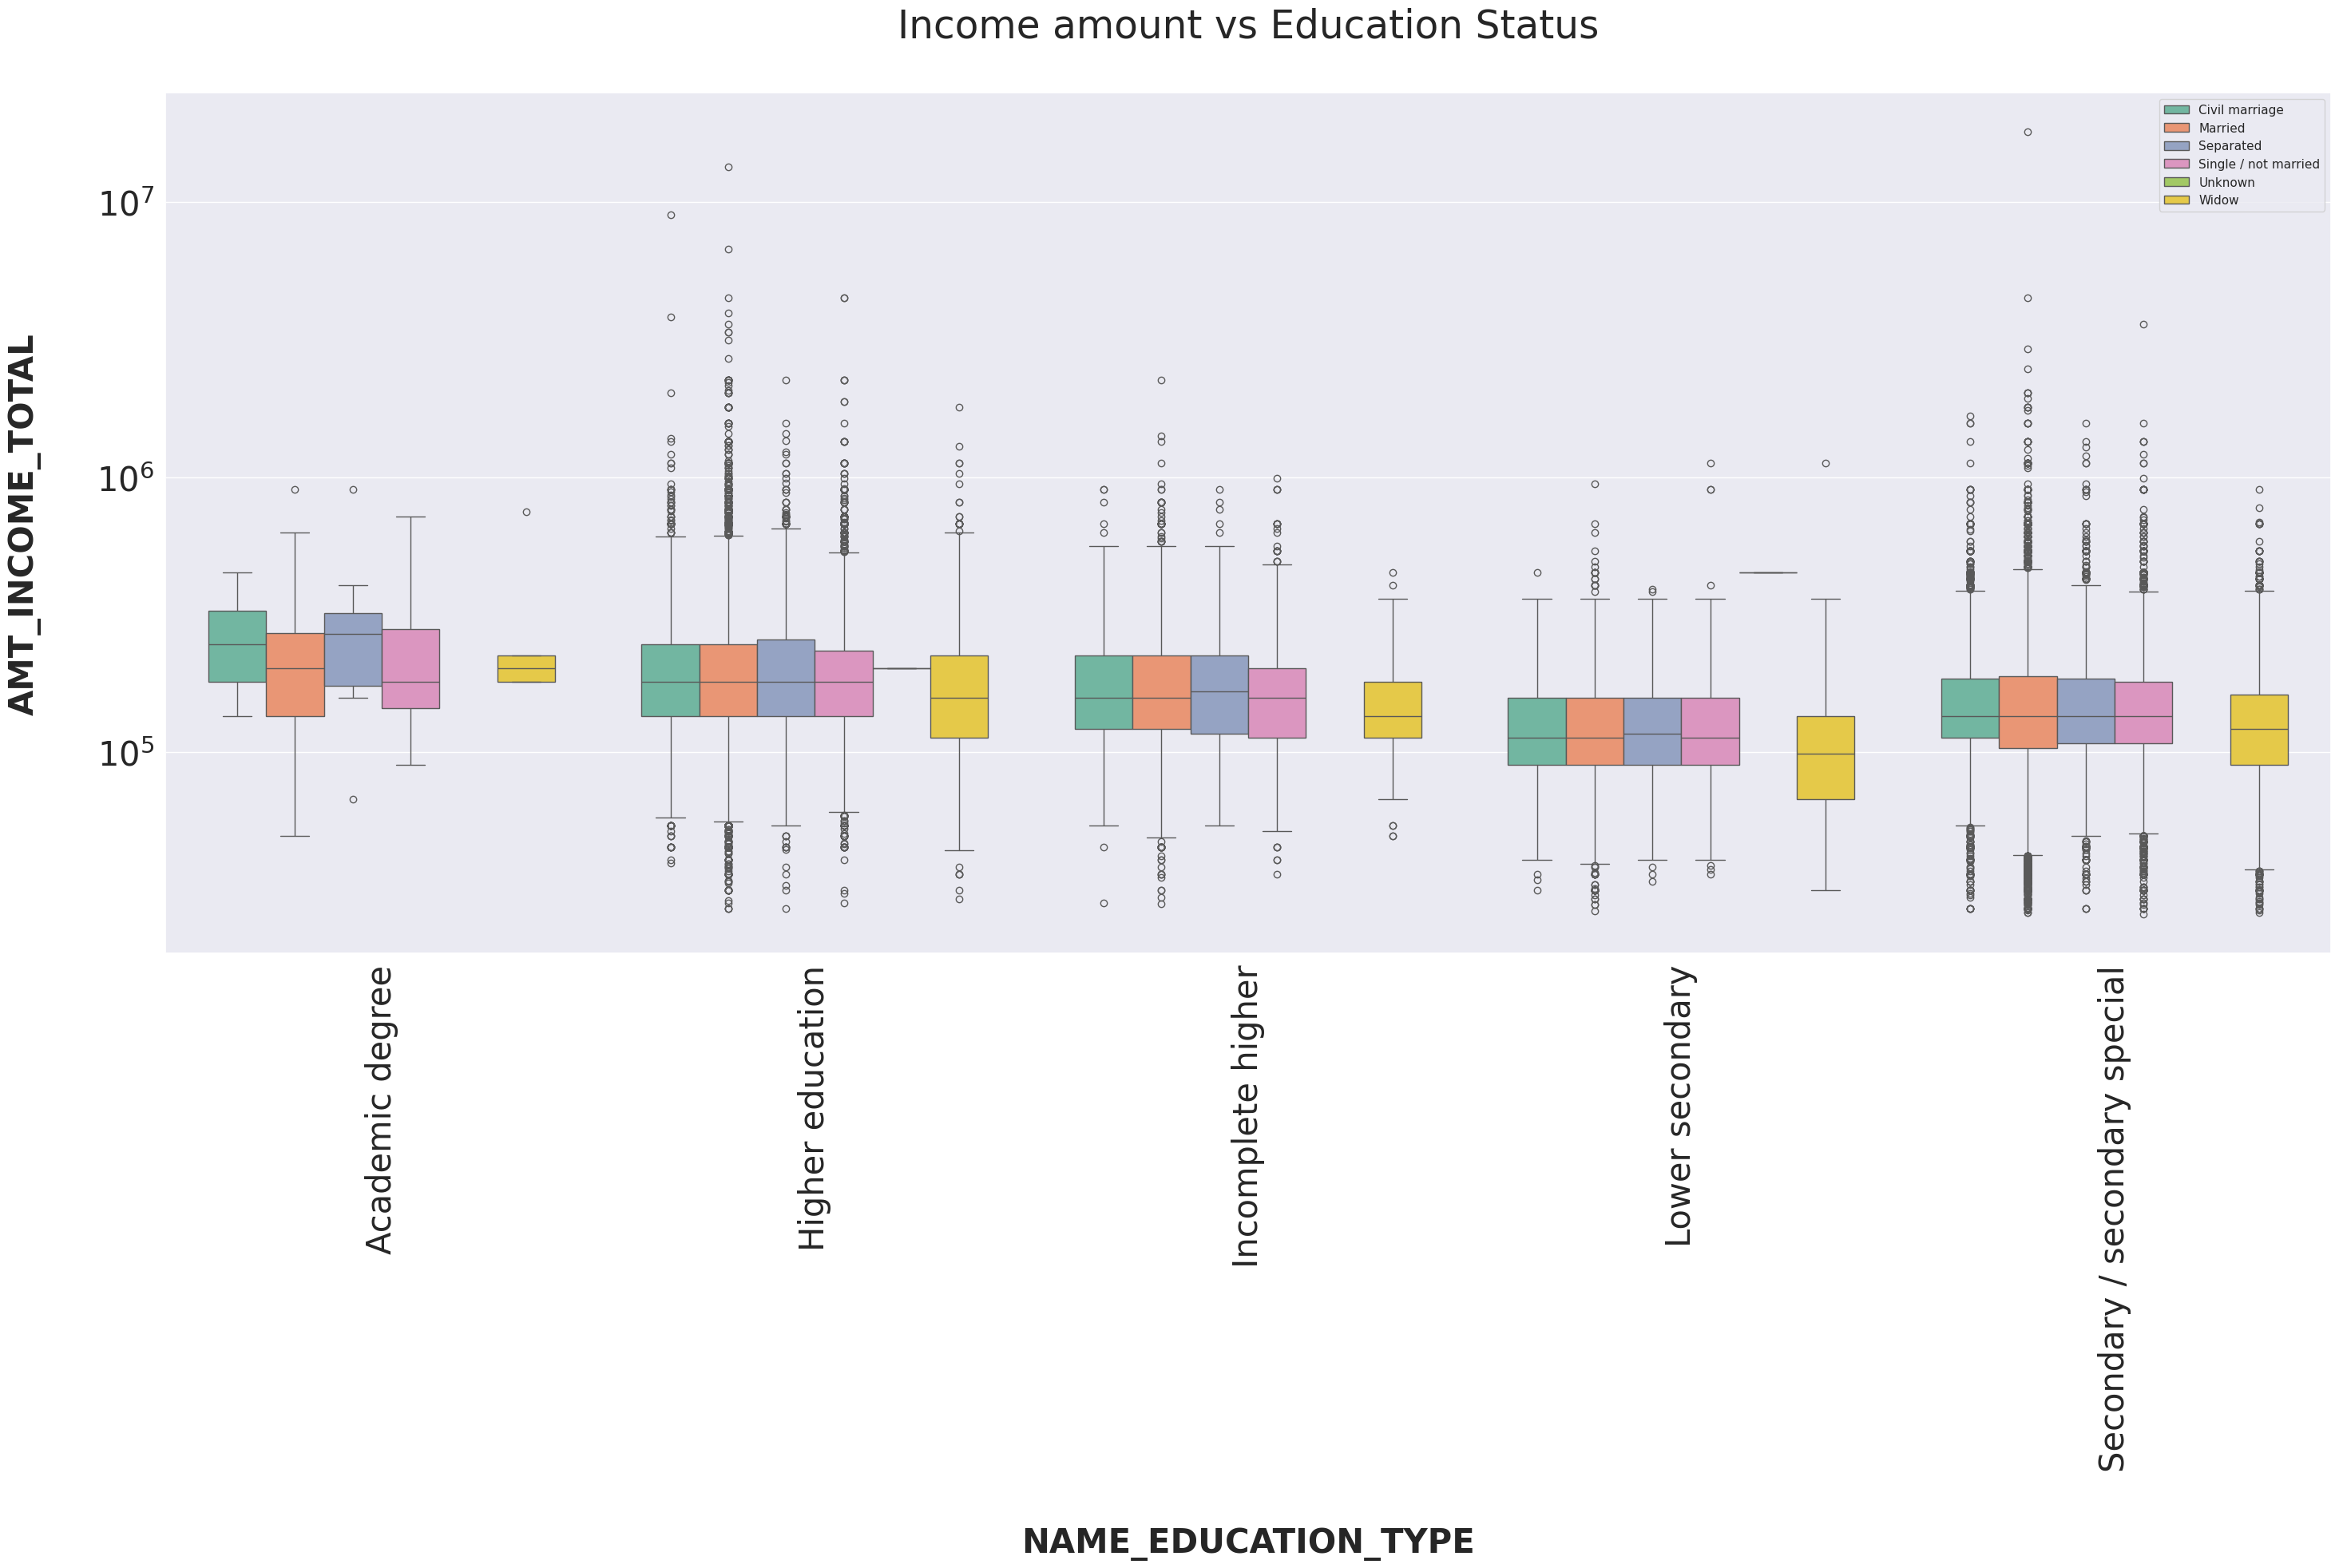

In [214]:
plt.figure(figsize=(35,14))
plt.yscale('log')                     #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data=target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend(loc = 'upper right')                                              #Adjusting legend position
plt.title('Income amount vs Education Status',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

Widow Client with Academic degree have very few outliers and doesn’t have First and Third quartile. Also, Clients with all types of family statuses having academic degrees have very less outliers as compared to other types of education.


Income of the clients with all types of family status having rest of the education type lie Below the First quartile i.e. 25%

Clients having Higher Education, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special have a higher number of outliers.
From the above figure, we can say that some of the clients having Higher Education tend to have the highest income compared to others.

Though some of the clients who haven’t completed their Higher Education tend to have higher incomes.

Some of the clients having Secondary/Secondary Special Education tend to have higher incomes.

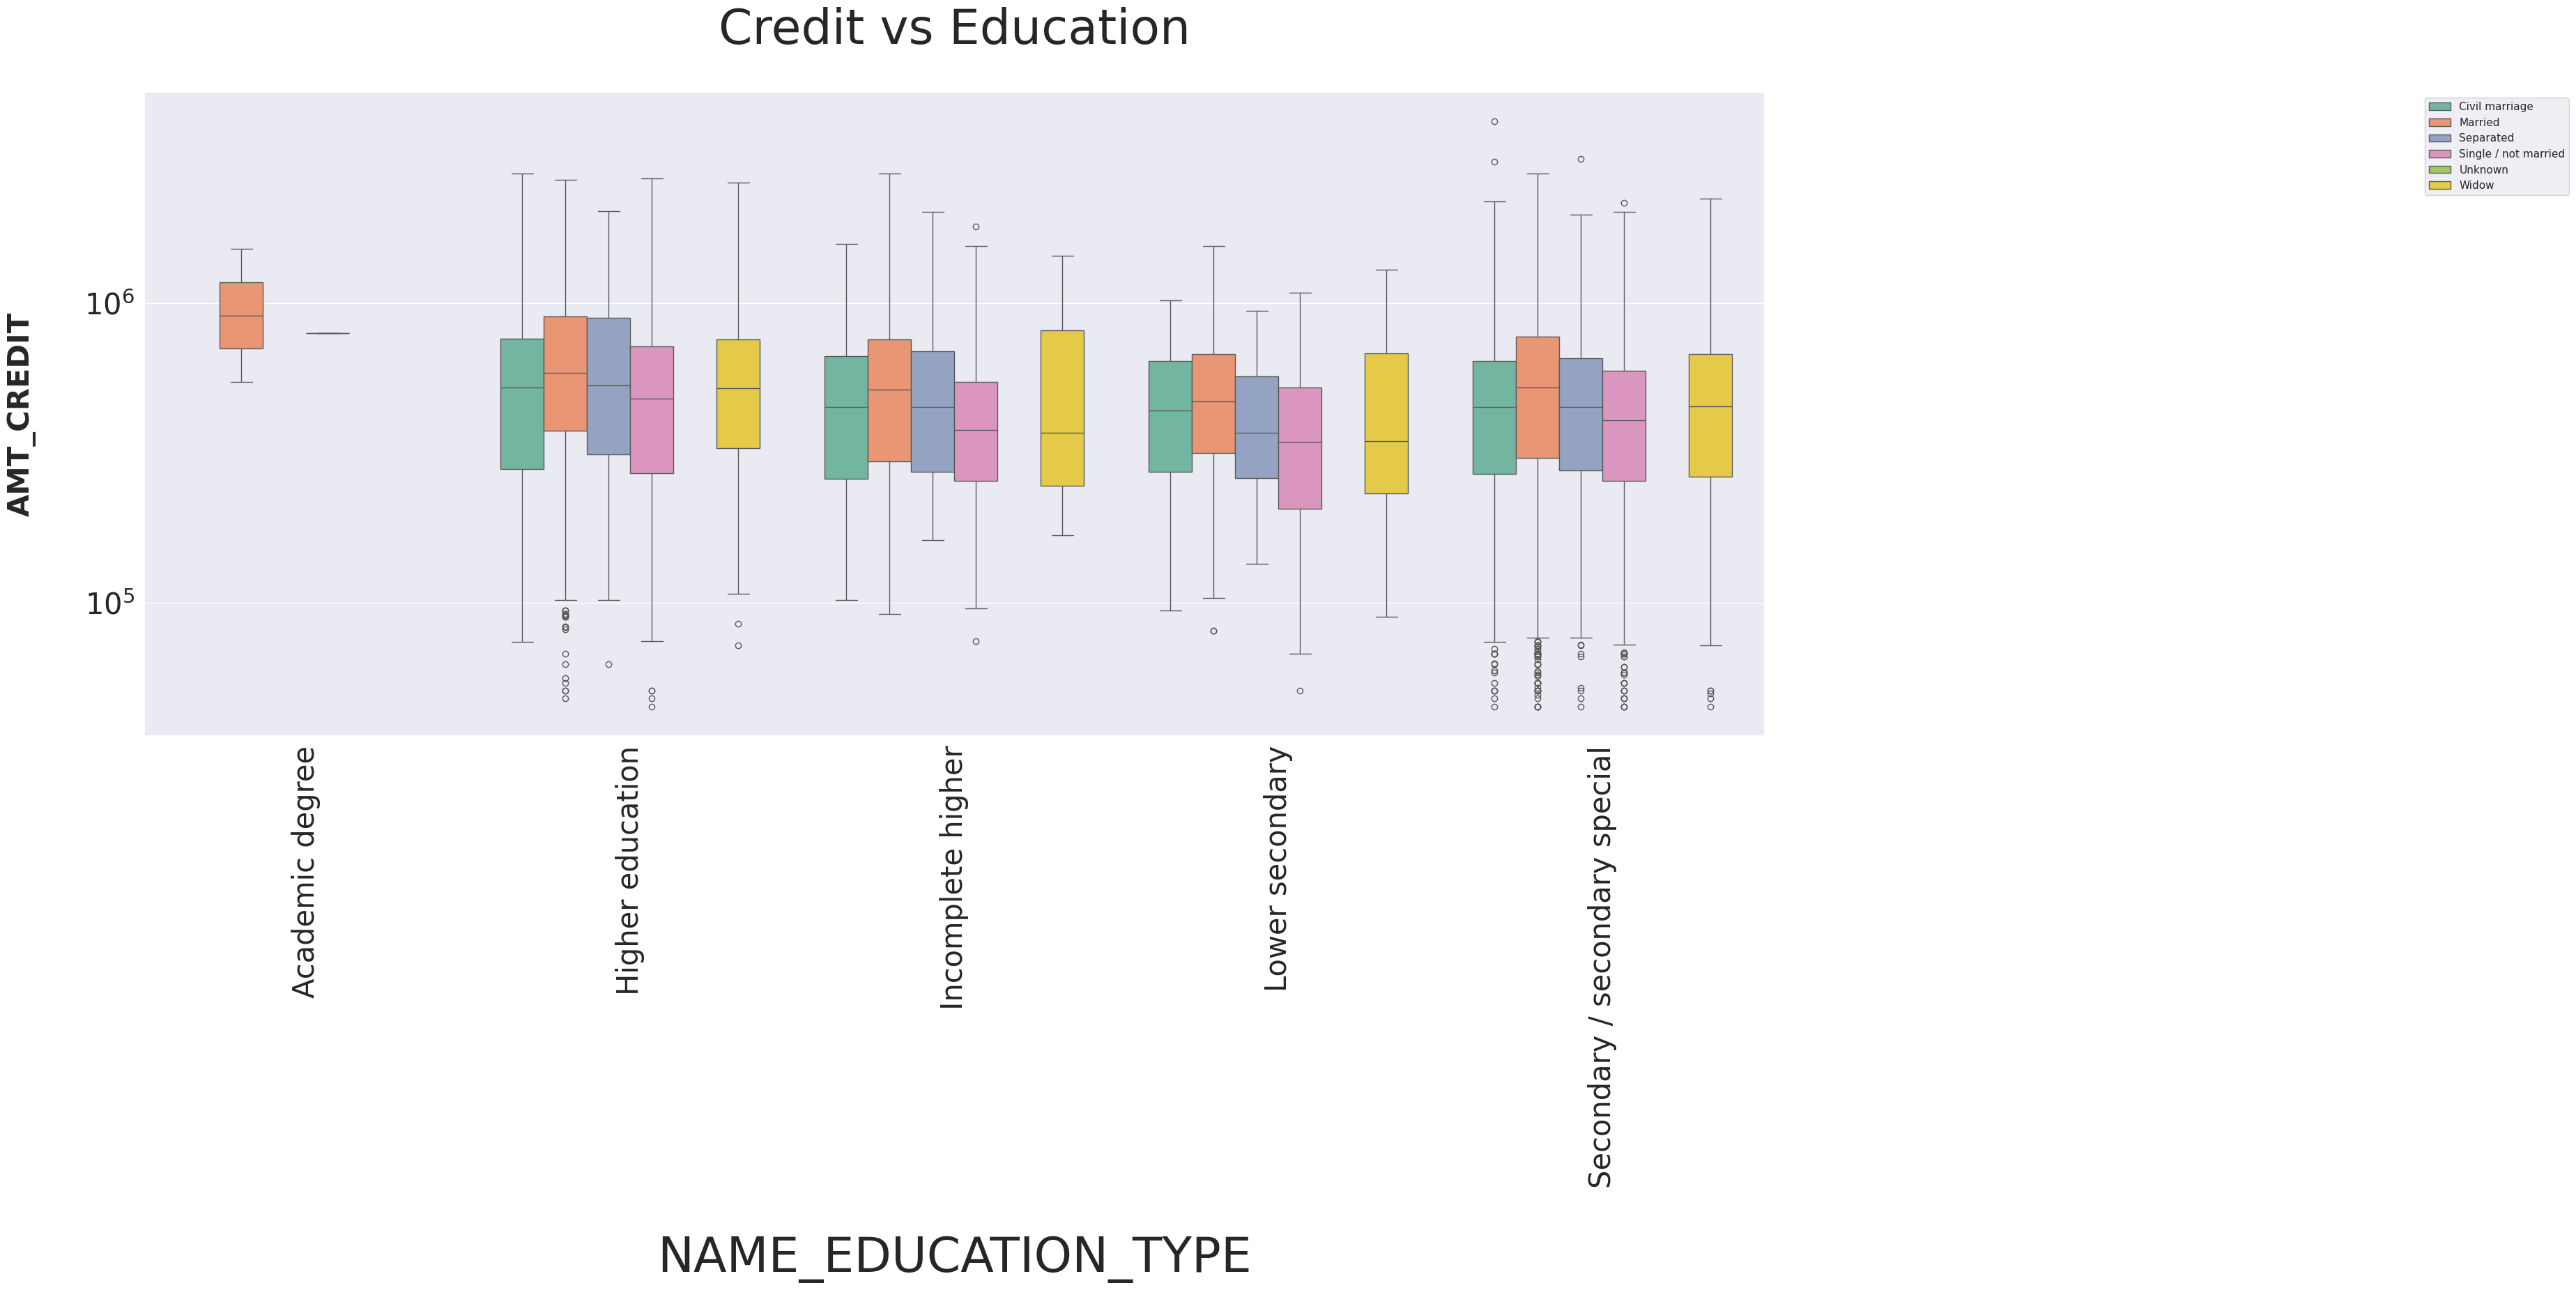

In [215]:
plt.figure(figsize=(30,12))
plt.yscale('log')
plt.xticks(rotation = 90)

sns.boxplot(data=target1,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='NAME_FAMILY_STATUS',orient='v',palette='Set2')
plt.legend(bbox_to_anchor=(1.5,1),loc='upper right')
plt.title('Credit vs Education',fontsize=50)
plt.xlabel('NAME_EDUCATION_TYPE',fontsize=50)
plt.ylabel('AMT_CREDIT',fontsize=30,fontweight="bold")
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=360,fontsize=30)
plt.show()



*   Married client's with academic degree applied for a higher credit loan and their is no outliers
*   Single clients with academic degreess have a very slim boxplot with no outliers


*   Some of the clients with higher education, incomplete education, lower secondary education and secondary/secondary special education are more likely to take a high amount of credit loans




In [216]:
application_data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0           100002       1         Cash loans           M             0   
1           100003       0         Cash loans           F             0   
2           100004       0    Revolving loans           M             1   
3           100006       0         Cash loans           F             0   
4           100007       0         Cash loans           M             0   
...            ...     ...                ...         ...           ...   
307505      456249       0         Cash loans           F             0   
307506      456251       0         Cash loans           M             0   
307507      456252       0         Cash loans           F             0   
307508      456253       0         Cash loans           F             0   
307509      456254       1         Cash loans           F             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                     1             0          202500.0    406597.5   
1                     0             0          270000.0   1293502.5   
2                     1             0           67500.0    135000.0   
3                     1             0          135000.0    312682.5   
4                     1             0          121500.0    513000.0   
...                 ...           ...               ...         ...   
307505                1             0          112500.0    225000.0   
307506                0             0          157500.0    254700.0   
307507                1             0           72000.0    269550.0   
307508                1             0          153000.0    677664.0   
307509                1             0          171000.0    370107.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307505      22050.0         225000.0   Unaccompanied             Pensioner   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307505  Secondary / secondary special  Single / not married   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801          25   
1       House / apartment                    0.003541          45   
2       House / apartment                    0.010032          52   
3       House / apartment                    0.008019          52   
4       House / apartment                    0.028663          54   
...                   ...                         ...         ...   
307505  House / apartment                    0.022800          66   
307506  

### Bivariate analysis of categorical columns to find the max % of clients with loan-payment difficulties

In [217]:
# Function for bivariate plots
def biplot(df,feature,title):
  temp = df[feature].value_counts()
  # Calculate the % of target 1 per category value
  perc = df[[feature,'TARGET']].groupby([feature],as_index=False).mean()
  perc.sort_values(by='TARGET', ascending=False, inplace=True)
  fig = make_subplots(rows=1, cols=2,
                        subplot_titles=("Count of "+ title,"% of Loan Payment difficulties within each category"))
  fig.add_trace(go.Bar(x=temp.index, y=temp.values),row=1, col=1)
  fig.add_trace(go.Bar(x=perc[feature].to_list(), y=perc['TARGET'].to_list()),row=1, col=2)
  fig['layout']['xaxis']['title']=feature
  fig['layout']['xaxis2']['title']=feature
  fig['layout']['yaxis']['title']='Count'
  fig['layout']['yaxis2']['title']='% of Loan Payment Difficulties'
  fig.update_layout(height=600, width=1000, title_text=title, showlegend=False)
  fig.show()

In [218]:
# Distribution of type of income and the category with max % of loan-payment difficulties
biplot(application_data,'NAME_INCOME_TYPE','Income Range')

In [219]:
# Distribution of contract type and the category with max % of loan-payment difficulties
biplot(application_data,'NAME_CONTRACT_TYPE','Contract Type')

In [220]:
# Distribution of Education Type and the category with max loan-payment difficulties
biplot(application_data,'NAME_EDUCATION_TYPE','Education Type')

In [221]:
# Distribution of Housing Type and the category with max % of loan-payment difficulties
biplot(application_data,'OCCUPATION_TYPE','Occupation Type')

In [222]:
# Distribution of Housing Type and the category of maximum % of loan-paying difficulties
biplot(application_data,'NAME_HOUSING_TYPE','Housing Type')

In [223]:
# Distribution of Amount Income Range and the category with max % of loan-payment difficulties
biplot(application_data,'AMT_INCOME_TYPE','Income Range')

In [224]:
# Distribution of CODE_GENDER with respect to income range to find max % of loan-payment difficulties
table= pd.pivot_table(application_data, values='TARGET', index=['CODE_GENDER','AMT_INCOME_TYPE'],
                      columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)

table

NAME_EDUCATION_TYPE          Academic degree  Higher education  \
CODE_GENDER AMT_INCOME_TYPE                                      
F           VERY_LOW                0.000000          0.056068   
            LOW                     0.000000          0.049022   
            MEDIUM                  0.000000          0.050257   
            HIGH                    0.105263          0.041516   
            VERY_HIGH               0.076923          0.037289   
M           VERY_LOW                0.000000          0.080411   
            LOW                     0.000000          0.073305   
            MEDIUM                  0.000000          0.070086   
            HIGH                    0.000000          0.055911   
            VERY_HIGH               0.000000          0.044080   

NAME_EDUCATION_TYPE          Incomplete higher  Lower secondary  \
CODE_GENDER AMT_INCOME_TYPE                                       
F           VERY_LOW                  0.086399         0.080193   
            LOW                       0.080075         0.113889   
            MEDIUM                    0.078431         0.096983   
            HIGH                      0.074313         0.038961   
            VERY_HIGH                 0.082251         0.066667   
M           VERY_LOW                  0.123967         0.125000   
            LOW                       0.097778         0.142857   
            MEDIUM                    0.095130         0.150515   
            HIGH                      0.074627         0.081633   
            VERY_HIGH                 0.077586         0.064516   

NAME_EDUCATION_TYPE          Secondary / secondary special  
CODE_GENDER AMT_INCOME_TYPE                                 
F           VERY_LOW                              0.076778  
            LOW                                   0.079523  
            MEDIUM                                0.075692  
            HIGH                                  0.070736  
            VERY_HIGH                             0.065930  
M           VERY_LOW                              0.118066  
            LOW                                   0.123693  
            MEDIUM                                0.113466  
            HIGH                                  0.093484  
            VERY_HIGH                             0.089939

*   Female clients with a academic degree and high-incomes have a especially high risk of defaulting
*   Male clients with a lower secondary degree with all types of salries have a high risk of defaulting




In [225]:
numerical_col = application_data.select_dtypes(include='number').columns
numerical_col

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [226]:
len(numerical_col)

35

In [ ]:
# Pairplots
pair = target0[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()

In [ ]:
pair = target1[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()

`AMT_CREDIT` and `AMT_GOODS_PRICE` are highly correlated variables for both defaulters and non – defaulters. So as the home price increases the loan amount also increases


`AMT_CREDIT` and `AMT_ANNUITY (EMI)` are highly correlated variables for both defaulters and non – defaulters. So as the home price increases the EMI amount also increases which is logical


All three variables `AMT_CREDIT`, `AMT_GOODS_PRICE` and `AMT_ANNUITY` are highly correlated for both defaulters and non-defaulters, which might not give a good indicator for defaulter detection

In [ ]:
# Correlation with heatmaps
corr0 = application_data.iloc[0:,2:]
corr1 = application_data.iloc[0:,2:]

t0=corr0.corr(method='spearman')
t1=corr1.corr(method='spearman')

In [ ]:
def targets_corr(data,title):
  plt.figure(figsize=(15,10))
  mask = np.zeros_like(data)
  mask[np.triu_indices_from(mask)]=True
  with sns.axes_style("white"):
    ax=sns.heatmap(data,mask=mask,cmap='RdYlGn')

In [ ]:
targets_corr(data=t0,title='Correlation for Target 0')

`AMT_CREDIT` is inversely proportional to the DAYS_BIRTH , peoples belong to the low-age group taking high Credit amount and vice-versa


`AMT_CREDIT` is inversely proportional to the CNT_CHILDREN, means the Credit amount is higher for fewer children count clients have and vice-versa.


`AMT_INCOME_TOTAL` is inversely proportional to the CNT_CHILDREN, means more income for fewer children clients have and vice-versa.


fewer children clients have in a densely populated area.


`AMT_CREDIT` is higher in a densely populated area.


`AMT_INCOME_TOTAL` is also higher in a densely populated area.

This heat map for Target 1 is also having quite the same observation just like Target 0. But for a few points are different. They are listed below.


The client’s permanent address does not match the contact address are having fewer children.


The client’s permanent address does not match the work address are having fewer children.